## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["Stem_bark_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Stem_bark_t_ha                                                    \
                    count       mean        std  min     25%    50%     75%   
Species_ID                                                                    
0                   371.0   7.894070   4.128113  0.3   4.900   7.70  10.350   
1                     7.0  34.728571  23.382095  8.3  13.950  35.70  52.750   
2                   120.0  11.320000   7.552123  0.8   6.375   9.45  15.250   
3                   115.0  15.307826   8.294197  2.1   7.950  15.30  21.450   
4                    66.0  11.296970   6.528234  1.6   6.500   9.25  16.575   
5                    68.0  29.010294  12.702287  2.5  18.400  29.70  39.675   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           23.2         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           65.7           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           38.8         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           41.1         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           28.7          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           48.8          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Stem_bark_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
10            5        0.0  18.2    19.6        18.3     159.0          101.8   
11            1        0.0   8.8     5.2        15.5     105.0           46.3   
12            1        0.0  10.2     6.7        16.2     122.0           54.1   
13            1        0.0  14.1    10.0        19.9     194.0           87.2   
14            1        0.0  19.4    15.9        26.8     299.0          133.9   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
10,5,0.0,18.2,19.6,18.3
11,1,0.0,8.8,5.2,15.5
12,1,0.0,10.2,6.7,16.2
13,1,0.0,14.1,10.0,19.9
14,1,0.0,19.4,15.9,26.8


In [11]:
# Columns in "y" data collections
y.head()

,LN_Stem_bark_t_ha
10,2.80
11,2.12
12,2.21
13,2.93
14,3.58


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.7841368357493024, 0.8139568151273118, 0.8498345495167378]
    Mean: 0.816
    Std: 0.027

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.3303125  0.28761518 0.34403108]
    Mean: 0.321
    Std: 0.024

 --------------------
Mean absolute error (MAE): 

    Scores: [0.2207547231922188, 0.19992001320942338, 0.21463406648023062]
    Mean: 0.212
    Std: 0.009

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.8942960625751492                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.27892087021094436                # gamma
print('Gamma: ' + str(p2))

p3 = 0.11832141467878397                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 197         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.7296434500976409                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8942960625751492
Gamma: 0.27892087021094436
Learning_rate: 0.11832141467878397
Max_depth: 3
N_estimators: 197
Subsample: 0.7296434500976409


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.68370	validation_1-rmse:1.63692
[1]	validation_0-rmse:1.49726	validation_1-rmse:1.45426
[2]	validation_0-rmse:1.33465	validation_1-rmse:1.29849
[3]	validation_0-rmse:1.19108	validation_1-rmse:1.15804
[4]	validation_0-rmse:1.06548	validation_1-rmse:1.03346
[5]	validation_0-rmse:0.96020	validation_1-rmse:0.93390
[6]	validation_0-rmse:0.86167	validation_1-rmse:0.84443
[7]	validation_0-rmse:0.77556	validation_1-rmse:0.76406


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.69940	validation_1-rmse:0.69365
[9]	validation_0-rmse:0.63637	validation_1-rmse:0.63654
[10]	validation_0-rmse:0.58198	validation_1-rmse:0.58652
[11]	validation_0-rmse:0.53481	validation_1-rmse:0.54325
[12]	validation_0-rmse:0.49116	validation_1-rmse:0.50715
[13]	validation_0-rmse:0.45307	validation_1-rmse:0.47625
[14]	validation_0-rmse:0.42373	validation_1-rmse:0.45011
[15]	validation_0-rmse:0.39842	validation_1-rmse:0.43042
[16]	validation_0-rmse:0.37637	validation_1-rmse:0.41347
[17]	validation_0-rmse:0.35846	validation_1-rmse:0.39966
[18]	validation_0-rmse:0.34250	validation_1-rmse:0.38753
[19]	validation_0-rmse:0.33021	validation_1-rmse:0.37843
[20]	validation_0-rmse:0.32011	validation_1-rmse:0.37016
[21]	validation_0-rmse:0.31055	validation_1-rmse:0.36534
[22]	validation_0-rmse:0.30284	validation_1-rmse:0.35967
[23]	validation_0-rmse:0.29524	validation_1-rmse:0.35203
[24]	validation_0-rmse:0.28964	validation_1-rmse:0.34849
[25]	validation_0-rmse:0.28566	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69073	validation_1-rmse:1.60289
[1]	validation_0-rmse:1.50597	validation_1-rmse:1.43266
[2]	validation_0-rmse:1.34514	validation_1-rmse:1.28198
[3]	validation_0-rmse:1.19942	validation_1-rmse:1.14386
[4]	validation_0-rmse:1.07370	validation_1-rmse:1.02878
[5]	validation_0-rmse:0.96288	validation_1-rmse:0.93064
[6]	validation_0-rmse:0.86297	validation_1-rmse:0.83914
[7]	validation_0-rmse:0.77932	validation_1-rmse:0.76357
[8]	validation_0-rmse:0.70760	validation_1-rmse:0.70221
[9]	validation_0-rmse:0.64511	validation_1-rmse:0.64610
[10]	validation_0-rmse:0.59088	validation_1-rmse:0.60210
[11]	validation_0-rmse:0.54164	validation_1-rmse:0.55966
[12]	validation_0-rmse:0.49777	validation_1-rmse:0.52228
[13]	validation_0-rmse:0.46014	validation_1-rmse:0.49189
[14]	validation_0-rmse:0.42908	validation_1-rmse:0.46631
[15]	validation_0-rmse:0.40163	validation_1-rmse:0.44774
[16]	validation_0-rmse:0.37778	validation_1-rmse:0.43090
[17]	validation_0-rmse:0.35925	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67197	validation_1-rmse:1.67579
[1]	validation_0-rmse:1.49095	validation_1-rmse:1.48934
[2]	validation_0-rmse:1.33308	validation_1-rmse:1.32732
[3]	validation_0-rmse:1.19095	validation_1-rmse:1.18551
[4]	validation_0-rmse:1.06689	validation_1-rmse:1.06043
[5]	validation_0-rmse:0.95863	validation_1-rmse:0.94855
[6]	validation_0-rmse:0.86344	validation_1-rmse:0.85184
[7]	validation_0-rmse:0.77651	validation_1-rmse:0.76514
[8]	validation_0-rmse:0.70384	validation_1-rmse:0.69220
[9]	validation_0-rmse:0.64255	validation_1-rmse:0.63154


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.58909	validation_1-rmse:0.57690
[11]	validation_0-rmse:0.54171	validation_1-rmse:0.52981
[12]	validation_0-rmse:0.49934	validation_1-rmse:0.49060
[13]	validation_0-rmse:0.46236	validation_1-rmse:0.45532
[14]	validation_0-rmse:0.43245	validation_1-rmse:0.42788
[15]	validation_0-rmse:0.40642	validation_1-rmse:0.40573
[16]	validation_0-rmse:0.38451	validation_1-rmse:0.38587
[17]	validation_0-rmse:0.36706	validation_1-rmse:0.37001
[18]	validation_0-rmse:0.35126	validation_1-rmse:0.35559
[19]	validation_0-rmse:0.33944	validation_1-rmse:0.34606
[20]	validation_0-rmse:0.32756	validation_1-rmse:0.33663
[21]	validation_0-rmse:0.31851	validation_1-rmse:0.33005
[22]	validation_0-rmse:0.31127	validation_1-rmse:0.32576
[23]	validation_0-rmse:0.30500	validation_1-rmse:0.32070
[24]	validation_0-rmse:0.29960	validation_1-rmse:0.31576
[25]	validation_0-rmse:0.29427	validation_1-rmse:0.31183
[26]	validation_0-rmse:0.28969	validation_1-rmse:0.31128
[27]	validation_0-rmse:0.28496	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68070	validation_1-rmse:1.64761
[1]	validation_0-rmse:1.49924	validation_1-rmse:1.46943
[2]	validation_0-rmse:1.33556	validation_1-rmse:1.31016
[3]	validation_0-rmse:1.19338	validation_1-rmse:1.17133
[4]	validation_0-rmse:1.06765	validation_1-rmse:1.04407
[5]	validation_0-rmse:0.96094	validation_1-rmse:0.93981
[6]	validation_0-rmse:0.86293	validation_1-rmse:0.84605
[7]	validation_0-rmse:0.78092	validation_1-rmse:0.76693


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70598	validation_1-rmse:0.69512
[9]	validation_0-rmse:0.64351	validation_1-rmse:0.63596
[10]	validation_0-rmse:0.58951	validation_1-rmse:0.58199
[11]	validation_0-rmse:0.54252	validation_1-rmse:0.53670
[12]	validation_0-rmse:0.49893	validation_1-rmse:0.49471
[13]	validation_0-rmse:0.46352	validation_1-rmse:0.46133
[14]	validation_0-rmse:0.43348	validation_1-rmse:0.43537
[15]	validation_0-rmse:0.40729	validation_1-rmse:0.41023
[16]	validation_0-rmse:0.38426	validation_1-rmse:0.38922
[17]	validation_0-rmse:0.36740	validation_1-rmse:0.37350
[18]	validation_0-rmse:0.35270	validation_1-rmse:0.36062
[19]	validation_0-rmse:0.33870	validation_1-rmse:0.35041
[20]	validation_0-rmse:0.32930	validation_1-rmse:0.34239
[21]	validation_0-rmse:0.32009	validation_1-rmse:0.33425
[22]	validation_0-rmse:0.31345	validation_1-rmse:0.32855
[23]	validation_0-rmse:0.30696	validation_1-rmse:0.32504
[24]	validation_0-rmse:0.30113	validation_1-rmse:0.32140
[25]	validation_0-rmse:0.29664	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67163	validation_1-rmse:1.67575
[1]	validation_0-rmse:1.49009	validation_1-rmse:1.49500
[2]	validation_0-rmse:1.33023	validation_1-rmse:1.33486
[3]	validation_0-rmse:1.18986	validation_1-rmse:1.19376
[4]	validation_0-rmse:1.06685	validation_1-rmse:1.07123
[5]	validation_0-rmse:0.95713	validation_1-rmse:0.96000


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.86109	validation_1-rmse:0.86283
[7]	validation_0-rmse:0.77560	validation_1-rmse:0.77799
[8]	validation_0-rmse:0.70422	validation_1-rmse:0.70769
[9]	validation_0-rmse:0.64178	validation_1-rmse:0.64581
[10]	validation_0-rmse:0.58813	validation_1-rmse:0.59359
[11]	validation_0-rmse:0.54259	validation_1-rmse:0.54731
[12]	validation_0-rmse:0.49976	validation_1-rmse:0.50857
[13]	validation_0-rmse:0.46278	validation_1-rmse:0.47227
[14]	validation_0-rmse:0.43434	validation_1-rmse:0.44591
[15]	validation_0-rmse:0.40916	validation_1-rmse:0.42218
[16]	validation_0-rmse:0.38678	validation_1-rmse:0.40304
[17]	validation_0-rmse:0.36967	validation_1-rmse:0.38717
[18]	validation_0-rmse:0.35394	validation_1-rmse:0.37225
[19]	validation_0-rmse:0.34156	validation_1-rmse:0.36162
[20]	validation_0-rmse:0.33137	validation_1-rmse:0.35034
[21]	validation_0-rmse:0.32163	validation_1-rmse:0.34023
[22]	validation_0-rmse:0.31331	validation_1-rmse:0.33406
[23]	validation_0-rmse:0.30714	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67330	validation_1-rmse:1.68330
[1]	validation_0-rmse:1.49287	validation_1-rmse:1.50541
[2]	validation_0-rmse:1.33285	validation_1-rmse:1.34790
[3]	validation_0-rmse:1.19032	validation_1-rmse:1.20563
[4]	validation_0-rmse:1.06674	validation_1-rmse:1.08079
[5]	validation_0-rmse:0.95989	validation_1-rmse:0.97451


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.86316	validation_1-rmse:0.88144
[7]	validation_0-rmse:0.77688	validation_1-rmse:0.79662
[8]	validation_0-rmse:0.70380	validation_1-rmse:0.72521
[9]	validation_0-rmse:0.64030	validation_1-rmse:0.66351
[10]	validation_0-rmse:0.58622	validation_1-rmse:0.61038
[11]	validation_0-rmse:0.53879	validation_1-rmse:0.56464
[12]	validation_0-rmse:0.49623	validation_1-rmse:0.52330
[13]	validation_0-rmse:0.46061	validation_1-rmse:0.48953
[14]	validation_0-rmse:0.43118	validation_1-rmse:0.46179
[15]	validation_0-rmse:0.40516	validation_1-rmse:0.43841
[16]	validation_0-rmse:0.38474	validation_1-rmse:0.41964
[17]	validation_0-rmse:0.36715	validation_1-rmse:0.40305
[18]	validation_0-rmse:0.35089	validation_1-rmse:0.38833
[19]	validation_0-rmse:0.33673	validation_1-rmse:0.37669
[20]	validation_0-rmse:0.32565	validation_1-rmse:0.36755
[21]	validation_0-rmse:0.31618	validation_1-rmse:0.35783
[22]	validation_0-rmse:0.30903	validation_1-rmse:0.35306
[23]	validation_0-rmse:0.30162	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66947	validation_1-rmse:1.69060
[1]	validation_0-rmse:1.48842	validation_1-rmse:1.51051
[2]	validation_0-rmse:1.32758	validation_1-rmse:1.35176
[3]	validation_0-rmse:1.18596	validation_1-rmse:1.20636
[4]	validation_0-rmse:1.06144	validation_1-rmse:1.08257
[5]	validation_0-rmse:0.95352	validation_1-rmse:0.97689


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.85473	validation_1-rmse:0.87695
[7]	validation_0-rmse:0.77192	validation_1-rmse:0.79647
[8]	validation_0-rmse:0.69831	validation_1-rmse:0.72434
[9]	validation_0-rmse:0.63474	validation_1-rmse:0.66083
[10]	validation_0-rmse:0.58177	validation_1-rmse:0.60887
[11]	validation_0-rmse:0.53582	validation_1-rmse:0.56452
[12]	validation_0-rmse:0.49350	validation_1-rmse:0.52483
[13]	validation_0-rmse:0.45826	validation_1-rmse:0.49192
[14]	validation_0-rmse:0.42951	validation_1-rmse:0.46495
[15]	validation_0-rmse:0.40243	validation_1-rmse:0.44121
[16]	validation_0-rmse:0.37814	validation_1-rmse:0.41869
[17]	validation_0-rmse:0.36204	validation_1-rmse:0.40427
[18]	validation_0-rmse:0.34653	validation_1-rmse:0.38947
[19]	validation_0-rmse:0.33303	validation_1-rmse:0.37742
[20]	validation_0-rmse:0.32427	validation_1-rmse:0.36967
[21]	validation_0-rmse:0.31530	validation_1-rmse:0.36155
[22]	validation_0-rmse:0.30866	validation_1-rmse:0.35620
[23]	validation_0-rmse:0.30277	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66514	validation_1-rmse:1.72180
[1]	validation_0-rmse:1.48131	validation_1-rmse:1.53564
[2]	validation_0-rmse:1.31947	validation_1-rmse:1.37182


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17958	validation_1-rmse:1.22836
[4]	validation_0-rmse:1.05917	validation_1-rmse:1.10567
[5]	validation_0-rmse:0.95142	validation_1-rmse:0.99593
[6]	validation_0-rmse:0.85695	validation_1-rmse:0.89777
[7]	validation_0-rmse:0.77468	validation_1-rmse:0.81299
[8]	validation_0-rmse:0.70167	validation_1-rmse:0.73507
[9]	validation_0-rmse:0.63983	validation_1-rmse:0.67098
[10]	validation_0-rmse:0.58422	validation_1-rmse:0.61333
[11]	validation_0-rmse:0.53852	validation_1-rmse:0.56527
[12]	validation_0-rmse:0.49720	validation_1-rmse:0.52160
[13]	validation_0-rmse:0.46274	validation_1-rmse:0.48327
[14]	validation_0-rmse:0.43430	validation_1-rmse:0.45444
[15]	validation_0-rmse:0.41017	validation_1-rmse:0.42880
[16]	validation_0-rmse:0.38779	validation_1-rmse:0.40484
[17]	validation_0-rmse:0.37000	validation_1-rmse:0.38671
[18]	validation_0-rmse:0.35363	validation_1-rmse:0.37019
[19]	validation_0-rmse:0.34026	validation_1-rmse:0.35559
[20]	validation_0-rmse:0.33011	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69648	validation_1-rmse:1.56915
[1]	validation_0-rmse:1.51242	validation_1-rmse:1.39314
[2]	validation_0-rmse:1.35172	validation_1-rmse:1.23670
[3]	validation_0-rmse:1.20579	validation_1-rmse:1.09944
[4]	validation_0-rmse:1.07806	validation_1-rmse:0.97868
[5]	validation_0-rmse:0.96678	validation_1-rmse:0.87662


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.87195	validation_1-rmse:0.79186
[7]	validation_0-rmse:0.78447	validation_1-rmse:0.71630
[8]	validation_0-rmse:0.70908	validation_1-rmse:0.64831
[9]	validation_0-rmse:0.64498	validation_1-rmse:0.59194
[10]	validation_0-rmse:0.59034	validation_1-rmse:0.54380
[11]	validation_0-rmse:0.54100	validation_1-rmse:0.50217
[12]	validation_0-rmse:0.49891	validation_1-rmse:0.46558
[13]	validation_0-rmse:0.46402	validation_1-rmse:0.43681
[14]	validation_0-rmse:0.43452	validation_1-rmse:0.41500
[15]	validation_0-rmse:0.40874	validation_1-rmse:0.39543
[16]	validation_0-rmse:0.38704	validation_1-rmse:0.37965
[17]	validation_0-rmse:0.36786	validation_1-rmse:0.36715
[18]	validation_0-rmse:0.35092	validation_1-rmse:0.35654
[19]	validation_0-rmse:0.33632	validation_1-rmse:0.34494
[20]	validation_0-rmse:0.32566	validation_1-rmse:0.33975
[21]	validation_0-rmse:0.31555	validation_1-rmse:0.33505
[22]	validation_0-rmse:0.30778	validation_1-rmse:0.32934
[23]	validation_0-rmse:0.30114	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67838	validation_1-rmse:1.65555
[1]	validation_0-rmse:1.49555	validation_1-rmse:1.47900
[2]	validation_0-rmse:1.33406	validation_1-rmse:1.32392
[3]	validation_0-rmse:1.19324	validation_1-rmse:1.18444


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.07044	validation_1-rmse:1.06133
[5]	validation_0-rmse:0.96338	validation_1-rmse:0.95228
[6]	validation_0-rmse:0.86323	validation_1-rmse:0.85460
[7]	validation_0-rmse:0.77706	validation_1-rmse:0.77137
[8]	validation_0-rmse:0.70553	validation_1-rmse:0.69806
[9]	validation_0-rmse:0.64366	validation_1-rmse:0.63508
[10]	validation_0-rmse:0.58811	validation_1-rmse:0.58029
[11]	validation_0-rmse:0.54070	validation_1-rmse:0.53300
[12]	validation_0-rmse:0.49758	validation_1-rmse:0.49151
[13]	validation_0-rmse:0.46124	validation_1-rmse:0.45730
[14]	validation_0-rmse:0.43232	validation_1-rmse:0.42981
[15]	validation_0-rmse:0.40464	validation_1-rmse:0.40302
[16]	validation_0-rmse:0.38152	validation_1-rmse:0.38098
[17]	validation_0-rmse:0.36427	validation_1-rmse:0.36315
[18]	validation_0-rmse:0.34858	validation_1-rmse:0.34722
[19]	validation_0-rmse:0.33677	validation_1-rmse:0.33467
[20]	validation_0-rmse:0.32718	validation_1-rmse:0.32437
[21]	validation_0-rmse:0.31675	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67904	validation_1-rmse:1.65267
[1]	validation_0-rmse:1.49546	validation_1-rmse:1.46805
[2]	validation_0-rmse:1.33564	validation_1-rmse:1.31820
[3]	validation_0-rmse:1.19246	validation_1-rmse:1.17796
[4]	validation_0-rmse:1.06773	validation_1-rmse:1.05653
[5]	validation_0-rmse:0.95798	validation_1-rmse:0.94969
[6]	validation_0-rmse:0.85871	validation_1-rmse:0.85658


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.77592	validation_1-rmse:0.77564
[8]	validation_0-rmse:0.70045	validation_1-rmse:0.70283
[9]	validation_0-rmse:0.63869	validation_1-rmse:0.64364
[10]	validation_0-rmse:0.58346	validation_1-rmse:0.59355
[11]	validation_0-rmse:0.53751	validation_1-rmse:0.55082
[12]	validation_0-rmse:0.49278	validation_1-rmse:0.51197
[13]	validation_0-rmse:0.45481	validation_1-rmse:0.48023
[14]	validation_0-rmse:0.42551	validation_1-rmse:0.45470
[15]	validation_0-rmse:0.39773	validation_1-rmse:0.43269
[16]	validation_0-rmse:0.37540	validation_1-rmse:0.41657
[17]	validation_0-rmse:0.35742	validation_1-rmse:0.40360
[18]	validation_0-rmse:0.34110	validation_1-rmse:0.39161
[19]	validation_0-rmse:0.32647	validation_1-rmse:0.38353
[20]	validation_0-rmse:0.31734	validation_1-rmse:0.37675
[21]	validation_0-rmse:0.30842	validation_1-rmse:0.36932
[22]	validation_0-rmse:0.30078	validation_1-rmse:0.36466
[23]	validation_0-rmse:0.29397	validation_1-rmse:0.36044
[24]	validation_0-rmse:0.28695	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67170	validation_1-rmse:1.70408
[1]	validation_0-rmse:1.48824	validation_1-rmse:1.52488
[2]	validation_0-rmse:1.33057	validation_1-rmse:1.36738
[3]	validation_0-rmse:1.18745	validation_1-rmse:1.22289
[4]	validation_0-rmse:1.06150	validation_1-rmse:1.09561
[5]	validation_0-rmse:0.95125	validation_1-rmse:0.98570
[6]	validation_0-rmse:0.85622	validation_1-rmse:0.89147
[7]	validation_0-rmse:0.77472	validation_1-rmse:0.81409
[8]	validation_0-rmse:0.70120	validation_1-rmse:0.74382
[9]	validation_0-rmse:0.63882	validation_1-rmse:0.68158
[10]	validation_0-rmse:0.58588	validation_1-rmse:0.62845
[11]	validation_0-rmse:0.54029	validation_1-rmse:0.58666
[12]	validation_0-rmse:0.49888	validation_1-rmse:0.54587
[13]	validation_0-rmse:0.46259	validation_1-rmse:0.51025
[14]	validation_0-rmse:0.43347	validation_1-rmse:0.48272
[15]	validation_0-rmse:0.40621	validation_1-rmse:0.45656
[16]	validation_0-rmse:0.38526	validation_1-rmse:0.43677
[17]	validation_0-rmse:0.36839	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68127	validation_1-rmse:1.64090
[1]	validation_0-rmse:1.49868	validation_1-rmse:1.45777


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33752	validation_1-rmse:1.29852
[3]	validation_0-rmse:1.19322	validation_1-rmse:1.16103
[4]	validation_0-rmse:1.07014	validation_1-rmse:1.03874
[5]	validation_0-rmse:0.96074	validation_1-rmse:0.93261
[6]	validation_0-rmse:0.86196	validation_1-rmse:0.83889
[7]	validation_0-rmse:0.77914	validation_1-rmse:0.75963
[8]	validation_0-rmse:0.70365	validation_1-rmse:0.69096
[9]	validation_0-rmse:0.64068	validation_1-rmse:0.63309
[10]	validation_0-rmse:0.58502	validation_1-rmse:0.58146
[11]	validation_0-rmse:0.53816	validation_1-rmse:0.54060
[12]	validation_0-rmse:0.49395	validation_1-rmse:0.50109
[13]	validation_0-rmse:0.45773	validation_1-rmse:0.47105
[14]	validation_0-rmse:0.42819	validation_1-rmse:0.44839
[15]	validation_0-rmse:0.40110	validation_1-rmse:0.42631
[16]	validation_0-rmse:0.37818	validation_1-rmse:0.41004
[17]	validation_0-rmse:0.36135	validation_1-rmse:0.39683
[18]	validation_0-rmse:0.34497	validation_1-rmse:0.38505
[19]	validation_0-rmse:0.33137	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67442	validation_1-rmse:1.66561


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48874	validation_1-rmse:1.48304
[2]	validation_0-rmse:1.32811	validation_1-rmse:1.32564
[3]	validation_0-rmse:1.18491	validation_1-rmse:1.18600
[4]	validation_0-rmse:1.05889	validation_1-rmse:1.06227
[5]	validation_0-rmse:0.95035	validation_1-rmse:0.95155
[6]	validation_0-rmse:0.85551	validation_1-rmse:0.85620
[7]	validation_0-rmse:0.77383	validation_1-rmse:0.77406
[8]	validation_0-rmse:0.69948	validation_1-rmse:0.70203
[9]	validation_0-rmse:0.63755	validation_1-rmse:0.64404
[10]	validation_0-rmse:0.58437	validation_1-rmse:0.59133
[11]	validation_0-rmse:0.53736	validation_1-rmse:0.55021
[12]	validation_0-rmse:0.49342	validation_1-rmse:0.50831
[13]	validation_0-rmse:0.45566	validation_1-rmse:0.47225
[14]	validation_0-rmse:0.42495	validation_1-rmse:0.44445
[15]	validation_0-rmse:0.39929	validation_1-rmse:0.41964
[16]	validation_0-rmse:0.37712	validation_1-rmse:0.39990
[17]	validation_0-rmse:0.36060	validation_1-rmse:0.38211
[18]	validation_0-rmse:0.34521	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66469	validation_1-rmse:1.70448
[1]	validation_0-rmse:1.48551	validation_1-rmse:1.52706
[2]	validation_0-rmse:1.32681	validation_1-rmse:1.37552
[3]	validation_0-rmse:1.18289	validation_1-rmse:1.23191
[4]	validation_0-rmse:1.06123	validation_1-rmse:1.11293
[5]	validation_0-rmse:0.95378	validation_1-rmse:1.00963
[6]	validation_0-rmse:0.85873	validation_1-rmse:0.91391
[7]	validation_0-rmse:0.77634	validation_1-rmse:0.83646
[8]	validation_0-rmse:0.70187	validation_1-rmse:0.76239
[9]	validation_0-rmse:0.64043	validation_1-rmse:0.70346
[10]	validation_0-rmse:0.58556	validation_1-rmse:0.65052
[11]	validation_0-rmse:0.53891	validation_1-rmse:0.60417
[12]	validation_0-rmse:0.49727	validation_1-rmse:0.56011
[13]	validation_0-rmse:0.46181	validation_1-rmse:0.52274
[14]	validation_0-rmse:0.43289	validation_1-rmse:0.49353
[15]	validation_0-rmse:0.40645	validation_1-rmse:0.46510
[16]	validation_0-rmse:0.38537	validation_1-rmse:0.44389
[17]	validation_0-rmse:0.36860	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66991	validation_1-rmse:1.69735
[1]	validation_0-rmse:1.48795	validation_1-rmse:1.51520
[2]	validation_0-rmse:1.32534	validation_1-rmse:1.35372
[3]	validation_0-rmse:1.18558	validation_1-rmse:1.21071
[4]	validation_0-rmse:1.06084	validation_1-rmse:1.08625
[5]	validation_0-rmse:0.95139	validation_1-rmse:0.97730
[6]	validation_0-rmse:0.85806	validation_1-rmse:0.88668
[7]	validation_0-rmse:0.77369	validation_1-rmse:0.80729
[8]	validation_0-rmse:0.70194	validation_1-rmse:0.73789
[9]	validation_0-rmse:0.63962	validation_1-rmse:0.68159
[10]	validation_0-rmse:0.58503	validation_1-rmse:0.63069
[11]	validation_0-rmse:0.53870	validation_1-rmse:0.58784
[12]	validation_0-rmse:0.49420	validation_1-rmse:0.54579
[13]	validation_0-rmse:0.45667	validation_1-rmse:0.51168
[14]	validation_0-rmse:0.42741	validation_1-rmse:0.48634
[15]	validation_0-rmse:0.39831	validation_1-rmse:0.46167
[16]	validation_0-rmse:0.37487	validation_1-rmse:0.44307
[17]	validation_0-rmse:0.35574	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68233	validation_1-rmse:1.65279
[1]	validation_0-rmse:1.49888	validation_1-rmse:1.48239
[2]	validation_0-rmse:1.33800	validation_1-rmse:1.32717
[3]	validation_0-rmse:1.19382	validation_1-rmse:1.19443
[4]	validation_0-rmse:1.06532	validation_1-rmse:1.07466
[5]	validation_0-rmse:0.95667	validation_1-rmse:0.97403
[6]	validation_0-rmse:0.86045	validation_1-rmse:0.88414
[7]	validation_0-rmse:0.77349	validation_1-rmse:0.80153
[8]	validation_0-rmse:0.69820	validation_1-rmse:0.73103
[9]	validation_0-rmse:0.63505	validation_1-rmse:0.67363
[10]	validation_0-rmse:0.58073	validation_1-rmse:0.62359
[11]	validation_0-rmse:0.53390	validation_1-rmse:0.58454
[12]	validation_0-rmse:0.49379	validation_1-rmse:0.54512
[13]	validation_0-rmse:0.45654	validation_1-rmse:0.51187
[14]	validation_0-rmse:0.42714	validation_1-rmse:0.48599
[15]	validation_0-rmse:0.39869	validation_1-rmse:0.45961
[16]	validation_0-rmse:0.37539	validation_1-rmse:0.43527
[17]	validation_0-rmse:0.35759	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66687	validation_1-rmse:1.70587
[1]	validation_0-rmse:1.48608	validation_1-rmse:1.52266
[2]	validation_0-rmse:1.32374	validation_1-rmse:1.36472
[3]	validation_0-rmse:1.18107	validation_1-rmse:1.22882
[4]	validation_0-rmse:1.05679	validation_1-rmse:1.10810
[5]	validation_0-rmse:0.94906	validation_1-rmse:1.00169
[6]	validation_0-rmse:0.85313	validation_1-rmse:0.90335
[7]	validation_0-rmse:0.77116	validation_1-rmse:0.81894
[8]	validation_0-rmse:0.69866	validation_1-rmse:0.74631
[9]	validation_0-rmse:0.63688	validation_1-rmse:0.68625
[10]	validation_0-rmse:0.58234	validation_1-rmse:0.63077
[11]	validation_0-rmse:0.53750	validation_1-rmse:0.58645
[12]	validation_0-rmse:0.49572	validation_1-rmse:0.54277
[13]	validation_0-rmse:0.45996	validation_1-rmse:0.50616
[14]	validation_0-rmse:0.43200	validation_1-rmse:0.47803
[15]	validation_0-rmse:0.40617	validation_1-rmse:0.45016
[16]	validation_0-rmse:0.38319	validation_1-rmse:0.42338
[17]	validation_0-rmse:0.36504	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68248	validation_1-rmse:1.63654
[1]	validation_0-rmse:1.49850	validation_1-rmse:1.45793
[2]	validation_0-rmse:1.33587	validation_1-rmse:1.29996
[3]	validation_0-rmse:1.19039	validation_1-rmse:1.16463


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06481	validation_1-rmse:1.04630
[5]	validation_0-rmse:0.95842	validation_1-rmse:0.93868
[6]	validation_0-rmse:0.86318	validation_1-rmse:0.84308
[7]	validation_0-rmse:0.77931	validation_1-rmse:0.75844
[8]	validation_0-rmse:0.70473	validation_1-rmse:0.68989
[9]	validation_0-rmse:0.64339	validation_1-rmse:0.63090
[10]	validation_0-rmse:0.59042	validation_1-rmse:0.57843
[11]	validation_0-rmse:0.54382	validation_1-rmse:0.53204
[12]	validation_0-rmse:0.50129	validation_1-rmse:0.49542
[13]	validation_0-rmse:0.46307	validation_1-rmse:0.46275
[14]	validation_0-rmse:0.43338	validation_1-rmse:0.43434
[15]	validation_0-rmse:0.40512	validation_1-rmse:0.41149
[16]	validation_0-rmse:0.38173	validation_1-rmse:0.39347
[17]	validation_0-rmse:0.36339	validation_1-rmse:0.37851
[18]	validation_0-rmse:0.34828	validation_1-rmse:0.36500
[19]	validation_0-rmse:0.33442	validation_1-rmse:0.35550
[20]	validation_0-rmse:0.32506	validation_1-rmse:0.34830
[21]	validation_0-rmse:0.31480	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68571	validation_1-rmse:1.64424
[1]	validation_0-rmse:1.50267	validation_1-rmse:1.47107


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34139	validation_1-rmse:1.31825
[3]	validation_0-rmse:1.19720	validation_1-rmse:1.17521
[4]	validation_0-rmse:1.07151	validation_1-rmse:1.04857
[5]	validation_0-rmse:0.96436	validation_1-rmse:0.94688
[6]	validation_0-rmse:0.86585	validation_1-rmse:0.85199
[7]	validation_0-rmse:0.77830	validation_1-rmse:0.76642
[8]	validation_0-rmse:0.70802	validation_1-rmse:0.69870
[9]	validation_0-rmse:0.64484	validation_1-rmse:0.63617
[10]	validation_0-rmse:0.59133	validation_1-rmse:0.58321
[11]	validation_0-rmse:0.54359	validation_1-rmse:0.53692
[12]	validation_0-rmse:0.50041	validation_1-rmse:0.49608
[13]	validation_0-rmse:0.46378	validation_1-rmse:0.46126
[14]	validation_0-rmse:0.43491	validation_1-rmse:0.43268
[15]	validation_0-rmse:0.41021	validation_1-rmse:0.41144
[16]	validation_0-rmse:0.38618	validation_1-rmse:0.38864
[17]	validation_0-rmse:0.36761	validation_1-rmse:0.37210
[18]	validation_0-rmse:0.35225	validation_1-rmse:0.35865
[19]	validation_0-rmse:0.33923	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65140	validation_1-rmse:1.75857
[1]	validation_0-rmse:1.46880	validation_1-rmse:1.57209
[2]	validation_0-rmse:1.31072	validation_1-rmse:1.40908
[3]	validation_0-rmse:1.17124	validation_1-rmse:1.26275
[4]	validation_0-rmse:1.04809	validation_1-rmse:1.13718
[5]	validation_0-rmse:0.93946	validation_1-rmse:1.02645
[6]	validation_0-rmse:0.84609	validation_1-rmse:0.92972
[7]	validation_0-rmse:0.76730	validation_1-rmse:0.84930
[8]	validation_0-rmse:0.69380	validation_1-rmse:0.77394
[9]	validation_0-rmse:0.63170	validation_1-rmse:0.71063
[10]	validation_0-rmse:0.57603	validation_1-rmse:0.65384
[11]	validation_0-rmse:0.53051	validation_1-rmse:0.60687
[12]	validation_0-rmse:0.48829	validation_1-rmse:0.56214
[13]	validation_0-rmse:0.45048	validation_1-rmse:0.52421
[14]	validation_0-rmse:0.42175	validation_1-rmse:0.49635
[15]	validation_0-rmse:0.39461	validation_1-rmse:0.46759
[16]	validation_0-rmse:0.37217	validation_1-rmse:0.44503
[17]	validation_0-rmse:0.35565	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66706	validation_1-rmse:1.69913


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48528	validation_1-rmse:1.52118
[2]	validation_0-rmse:1.32815	validation_1-rmse:1.36394
[3]	validation_0-rmse:1.18533	validation_1-rmse:1.22311
[4]	validation_0-rmse:1.06164	validation_1-rmse:1.09807
[5]	validation_0-rmse:0.95518	validation_1-rmse:0.99307
[6]	validation_0-rmse:0.85897	validation_1-rmse:0.89771
[7]	validation_0-rmse:0.77424	validation_1-rmse:0.81517
[8]	validation_0-rmse:0.70215	validation_1-rmse:0.73920
[9]	validation_0-rmse:0.63875	validation_1-rmse:0.68045
[10]	validation_0-rmse:0.58528	validation_1-rmse:0.62489
[11]	validation_0-rmse:0.53868	validation_1-rmse:0.58046
[12]	validation_0-rmse:0.49558	validation_1-rmse:0.53960
[13]	validation_0-rmse:0.45921	validation_1-rmse:0.50346
[14]	validation_0-rmse:0.42991	validation_1-rmse:0.47607
[15]	validation_0-rmse:0.40448	validation_1-rmse:0.44718
[16]	validation_0-rmse:0.38234	validation_1-rmse:0.42296
[17]	validation_0-rmse:0.36446	validation_1-rmse:0.40341
[18]	validation_0-rmse:0.34994	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68094	validation_1-rmse:1.63827


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49965	validation_1-rmse:1.46178
[2]	validation_0-rmse:1.33636	validation_1-rmse:1.30373
[3]	validation_0-rmse:1.19400	validation_1-rmse:1.16278
[4]	validation_0-rmse:1.07080	validation_1-rmse:1.04387
[5]	validation_0-rmse:0.96171	validation_1-rmse:0.94092
[6]	validation_0-rmse:0.86545	validation_1-rmse:0.84800
[7]	validation_0-rmse:0.78041	validation_1-rmse:0.76561
[8]	validation_0-rmse:0.70364	validation_1-rmse:0.69246
[9]	validation_0-rmse:0.64046	validation_1-rmse:0.63629
[10]	validation_0-rmse:0.58716	validation_1-rmse:0.58810
[11]	validation_0-rmse:0.53824	validation_1-rmse:0.54664
[12]	validation_0-rmse:0.49391	validation_1-rmse:0.50805
[13]	validation_0-rmse:0.45647	validation_1-rmse:0.47630
[14]	validation_0-rmse:0.42657	validation_1-rmse:0.45399
[15]	validation_0-rmse:0.39971	validation_1-rmse:0.43219
[16]	validation_0-rmse:0.37521	validation_1-rmse:0.41407
[17]	validation_0-rmse:0.35810	validation_1-rmse:0.40002
[18]	validation_0-rmse:0.34191	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67677	validation_1-rmse:1.66212
[1]	validation_0-rmse:1.49349	validation_1-rmse:1.47467
[2]	validation_0-rmse:1.33289	validation_1-rmse:1.31627
[3]	validation_0-rmse:1.19438	validation_1-rmse:1.17678
[4]	validation_0-rmse:1.07361	validation_1-rmse:1.05798
[5]	validation_0-rmse:0.96430	validation_1-rmse:0.94551
[6]	validation_0-rmse:0.86784	validation_1-rmse:0.84948
[7]	validation_0-rmse:0.78573	validation_1-rmse:0.76641
[8]	validation_0-rmse:0.70968	validation_1-rmse:0.68937
[9]	validation_0-rmse:0.64820	validation_1-rmse:0.63205
[10]	validation_0-rmse:0.59372	validation_1-rmse:0.58216
[11]	validation_0-rmse:0.54655	validation_1-rmse:0.53862
[12]	validation_0-rmse:0.50313	validation_1-rmse:0.49905
[13]	validation_0-rmse:0.46668	validation_1-rmse:0.46353
[14]	validation_0-rmse:0.43776	validation_1-rmse:0.43961
[15]	validation_0-rmse:0.41109	validation_1-rmse:0.41381
[16]	validation_0-rmse:0.38765	validation_1-rmse:0.38955
[17]	validation_0-rmse:0.36932	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68106	validation_1-rmse:1.66874


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49753	validation_1-rmse:1.48666
[2]	validation_0-rmse:1.33493	validation_1-rmse:1.32637
[3]	validation_0-rmse:1.19042	validation_1-rmse:1.18544
[4]	validation_0-rmse:1.06662	validation_1-rmse:1.06318
[5]	validation_0-rmse:0.95670	validation_1-rmse:0.95701
[6]	validation_0-rmse:0.86061	validation_1-rmse:0.86536
[7]	validation_0-rmse:0.77550	validation_1-rmse:0.78310
[8]	validation_0-rmse:0.70422	validation_1-rmse:0.71453
[9]	validation_0-rmse:0.64186	validation_1-rmse:0.65376
[10]	validation_0-rmse:0.58812	validation_1-rmse:0.60422
[11]	validation_0-rmse:0.54239	validation_1-rmse:0.55924
[12]	validation_0-rmse:0.50020	validation_1-rmse:0.51797
[13]	validation_0-rmse:0.46367	validation_1-rmse:0.48300
[14]	validation_0-rmse:0.43366	validation_1-rmse:0.45428
[15]	validation_0-rmse:0.40532	validation_1-rmse:0.42800
[16]	validation_0-rmse:0.38337	validation_1-rmse:0.40866
[17]	validation_0-rmse:0.36502	validation_1-rmse:0.39112
[18]	validation_0-rmse:0.34998	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68493	validation_1-rmse:1.64037


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50080	validation_1-rmse:1.46196
[2]	validation_0-rmse:1.33991	validation_1-rmse:1.30548
[3]	validation_0-rmse:1.19628	validation_1-rmse:1.17363
[4]	validation_0-rmse:1.07268	validation_1-rmse:1.05972
[5]	validation_0-rmse:0.96300	validation_1-rmse:0.95540
[6]	validation_0-rmse:0.86543	validation_1-rmse:0.86429
[7]	validation_0-rmse:0.77787	validation_1-rmse:0.78227
[8]	validation_0-rmse:0.70262	validation_1-rmse:0.71526
[9]	validation_0-rmse:0.64038	validation_1-rmse:0.65831
[10]	validation_0-rmse:0.58639	validation_1-rmse:0.60950
[11]	validation_0-rmse:0.53744	validation_1-rmse:0.56711
[12]	validation_0-rmse:0.49306	validation_1-rmse:0.52933
[13]	validation_0-rmse:0.45496	validation_1-rmse:0.49680
[14]	validation_0-rmse:0.42402	validation_1-rmse:0.46996
[15]	validation_0-rmse:0.39699	validation_1-rmse:0.44871
[16]	validation_0-rmse:0.37458	validation_1-rmse:0.43100
[17]	validation_0-rmse:0.35844	validation_1-rmse:0.41814
[18]	validation_0-rmse:0.34235	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67998	validation_1-rmse:1.65157
[1]	validation_0-rmse:1.49569	validation_1-rmse:1.47010
[2]	validation_0-rmse:1.33515	validation_1-rmse:1.30846
[3]	validation_0-rmse:1.19381	validation_1-rmse:1.17036
[4]	validation_0-rmse:1.06879	validation_1-rmse:1.04744
[5]	validation_0-rmse:0.96255	validation_1-rmse:0.94093
[6]	validation_0-rmse:0.86738	validation_1-rmse:0.84686
[7]	validation_0-rmse:0.77986	validation_1-rmse:0.76153
[8]	validation_0-rmse:0.70614	validation_1-rmse:0.68757
[9]	validation_0-rmse:0.64149	validation_1-rmse:0.62711
[10]	validation_0-rmse:0.58717	validation_1-rmse:0.57710
[11]	validation_0-rmse:0.54049	validation_1-rmse:0.53457
[12]	validation_0-rmse:0.49876	validation_1-rmse:0.49447
[13]	validation_0-rmse:0.46257	validation_1-rmse:0.46143
[14]	validation_0-rmse:0.43317	validation_1-rmse:0.43431
[15]	validation_0-rmse:0.40638	validation_1-rmse:0.41124
[16]	validation_0-rmse:0.38315	validation_1-rmse:0.39095
[17]	validation_0-rmse:0.36582	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67408	validation_1-rmse:1.67333
[1]	validation_0-rmse:1.48898	validation_1-rmse:1.48883


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32803	validation_1-rmse:1.33363
[3]	validation_0-rmse:1.18402	validation_1-rmse:1.18960
[4]	validation_0-rmse:1.05988	validation_1-rmse:1.06976
[5]	validation_0-rmse:0.95404	validation_1-rmse:0.96547
[6]	validation_0-rmse:0.85790	validation_1-rmse:0.87430
[7]	validation_0-rmse:0.77620	validation_1-rmse:0.79247
[8]	validation_0-rmse:0.70160	validation_1-rmse:0.72065
[9]	validation_0-rmse:0.63922	validation_1-rmse:0.65943
[10]	validation_0-rmse:0.58486	validation_1-rmse:0.60700
[11]	validation_0-rmse:0.53754	validation_1-rmse:0.56343
[12]	validation_0-rmse:0.49450	validation_1-rmse:0.52124
[13]	validation_0-rmse:0.45749	validation_1-rmse:0.48387
[14]	validation_0-rmse:0.42922	validation_1-rmse:0.45667
[15]	validation_0-rmse:0.40428	validation_1-rmse:0.43140
[16]	validation_0-rmse:0.38146	validation_1-rmse:0.40975
[17]	validation_0-rmse:0.36419	validation_1-rmse:0.39330
[18]	validation_0-rmse:0.34807	validation_1-rmse:0.37692
[19]	validation_0-rmse:0.33468	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67727	validation_1-rmse:1.66732
[1]	validation_0-rmse:1.49273	validation_1-rmse:1.48075
[2]	validation_0-rmse:1.33132	validation_1-rmse:1.32635
[3]	validation_0-rmse:1.18827	validation_1-rmse:1.18267
[4]	validation_0-rmse:1.06219	validation_1-rmse:1.05748
[5]	validation_0-rmse:0.95442	validation_1-rmse:0.95746
[6]	validation_0-rmse:0.85805	validation_1-rmse:0.86414
[7]	validation_0-rmse:0.77511	validation_1-rmse:0.78352
[8]	validation_0-rmse:0.69908	validation_1-rmse:0.71247
[9]	validation_0-rmse:0.63687	validation_1-rmse:0.65313
[10]	validation_0-rmse:0.58192	validation_1-rmse:0.60373
[11]	validation_0-rmse:0.53503	validation_1-rmse:0.55943
[12]	validation_0-rmse:0.49143	validation_1-rmse:0.52038
[13]	validation_0-rmse:0.45276	validation_1-rmse:0.48637
[14]	validation_0-rmse:0.42541	validation_1-rmse:0.46228
[15]	validation_0-rmse:0.39804	validation_1-rmse:0.43981
[16]	validation_0-rmse:0.37485	validation_1-rmse:0.42091
[17]	validation_0-rmse:0.35805	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66843	validation_1-rmse:1.70027
[1]	validation_0-rmse:1.48671	validation_1-rmse:1.51951


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33029	validation_1-rmse:1.36275
[3]	validation_0-rmse:1.18436	validation_1-rmse:1.21522
[4]	validation_0-rmse:1.06096	validation_1-rmse:1.08910
[5]	validation_0-rmse:0.95277	validation_1-rmse:0.98389
[6]	validation_0-rmse:0.85502	validation_1-rmse:0.88647
[7]	validation_0-rmse:0.77087	validation_1-rmse:0.80287
[8]	validation_0-rmse:0.69683	validation_1-rmse:0.73142
[9]	validation_0-rmse:0.63510	validation_1-rmse:0.67100
[10]	validation_0-rmse:0.58139	validation_1-rmse:0.61979
[11]	validation_0-rmse:0.53409	validation_1-rmse:0.57505
[12]	validation_0-rmse:0.49085	validation_1-rmse:0.53375
[13]	validation_0-rmse:0.45400	validation_1-rmse:0.50009
[14]	validation_0-rmse:0.42459	validation_1-rmse:0.47347
[15]	validation_0-rmse:0.39764	validation_1-rmse:0.44766
[16]	validation_0-rmse:0.37664	validation_1-rmse:0.42757
[17]	validation_0-rmse:0.35985	validation_1-rmse:0.41084
[18]	validation_0-rmse:0.34428	validation_1-rmse:0.39667
[19]	validation_0-rmse:0.33284	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67207	validation_1-rmse:1.68424
[1]	validation_0-rmse:1.48917	validation_1-rmse:1.50463
[2]	validation_0-rmse:1.32823	validation_1-rmse:1.34645
[3]	validation_0-rmse:1.18583	validation_1-rmse:1.20771
[4]	validation_0-rmse:1.06587	validation_1-rmse:1.09135
[5]	validation_0-rmse:0.95462	validation_1-rmse:0.97977
[6]	validation_0-rmse:0.85923	validation_1-rmse:0.88589
[7]	validation_0-rmse:0.77346	validation_1-rmse:0.80425
[8]	validation_0-rmse:0.70143	validation_1-rmse:0.73420
[9]	validation_0-rmse:0.63969	validation_1-rmse:0.67275
[10]	validation_0-rmse:0.58462	validation_1-rmse:0.62112
[11]	validation_0-rmse:0.53825	validation_1-rmse:0.57803
[12]	validation_0-rmse:0.49510	validation_1-rmse:0.53901
[13]	validation_0-rmse:0.45858	validation_1-rmse:0.50712
[14]	validation_0-rmse:0.42885	validation_1-rmse:0.47939
[15]	validation_0-rmse:0.40352	validation_1-rmse:0.45633
[16]	validation_0-rmse:0.38061	validation_1-rmse:0.43645
[17]	validation_0-rmse:0.36355	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67191	validation_1-rmse:1.67912
[1]	validation_0-rmse:1.48869	validation_1-rmse:1.49653
[2]	validation_0-rmse:1.32849	validation_1-rmse:1.33932
[3]	validation_0-rmse:1.18524	validation_1-rmse:1.19597
[4]	validation_0-rmse:1.06283	validation_1-rmse:1.07144
[5]	validation_0-rmse:0.95495	validation_1-rmse:0.96328
[6]	validation_0-rmse:0.85700	validation_1-rmse:0.86799
[7]	validation_0-rmse:0.77585	validation_1-rmse:0.78633
[8]	validation_0-rmse:0.70096	validation_1-rmse:0.71309
[9]	validation_0-rmse:0.63746	validation_1-rmse:0.65006
[10]	validation_0-rmse:0.58223	validation_1-rmse:0.59503
[11]	validation_0-rmse:0.53507	validation_1-rmse:0.54826
[12]	validation_0-rmse:0.49179	validation_1-rmse:0.50649
[13]	validation_0-rmse:0.45499	validation_1-rmse:0.47371
[14]	validation_0-rmse:0.42724	validation_1-rmse:0.44618
[15]	validation_0-rmse:0.40145	validation_1-rmse:0.42261
[16]	validation_0-rmse:0.38030	validation_1-rmse:0.40420
[17]	validation_0-rmse:0.36275	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65769	validation_1-rmse:1.73949
[1]	validation_0-rmse:1.47701	validation_1-rmse:1.55588
[2]	validation_0-rmse:1.31832	validation_1-rmse:1.39661
[3]	validation_0-rmse:1.17599	validation_1-rmse:1.25312
[4]	validation_0-rmse:1.05248	validation_1-rmse:1.12758
[5]	validation_0-rmse:0.94915	validation_1-rmse:1.02229
[6]	validation_0-rmse:0.85076	validation_1-rmse:0.92364
[7]	validation_0-rmse:0.76569	validation_1-rmse:0.83826
[8]	validation_0-rmse:0.69069	validation_1-rmse:0.76409
[9]	validation_0-rmse:0.62911	validation_1-rmse:0.70414
[10]	validation_0-rmse:0.57531	validation_1-rmse:0.65137
[11]	validation_0-rmse:0.52876	validation_1-rmse:0.60751
[12]	validation_0-rmse:0.48626	validation_1-rmse:0.56658
[13]	validation_0-rmse:0.44920	validation_1-rmse:0.53121
[14]	validation_0-rmse:0.41963	validation_1-rmse:0.50369
[15]	validation_0-rmse:0.39291	validation_1-rmse:0.47759
[16]	validation_0-rmse:0.36977	validation_1-rmse:0.45667
[17]	validation_0-rmse:0.35163	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67308	validation_1-rmse:1.68851
[1]	validation_0-rmse:1.48909	validation_1-rmse:1.50309


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32712	validation_1-rmse:1.33543
[3]	validation_0-rmse:1.18751	validation_1-rmse:1.19489
[4]	validation_0-rmse:1.06340	validation_1-rmse:1.07343
[5]	validation_0-rmse:0.95473	validation_1-rmse:0.96171
[6]	validation_0-rmse:0.85929	validation_1-rmse:0.86308
[7]	validation_0-rmse:0.77561	validation_1-rmse:0.78082
[8]	validation_0-rmse:0.70191	validation_1-rmse:0.70468
[9]	validation_0-rmse:0.63806	validation_1-rmse:0.64109
[10]	validation_0-rmse:0.58378	validation_1-rmse:0.58587
[11]	validation_0-rmse:0.53743	validation_1-rmse:0.54186
[12]	validation_0-rmse:0.49420	validation_1-rmse:0.49873
[13]	validation_0-rmse:0.45710	validation_1-rmse:0.46214
[14]	validation_0-rmse:0.42811	validation_1-rmse:0.43404
[15]	validation_0-rmse:0.40184	validation_1-rmse:0.40681
[16]	validation_0-rmse:0.38071	validation_1-rmse:0.38387
[17]	validation_0-rmse:0.36241	validation_1-rmse:0.36450
[18]	validation_0-rmse:0.34780	validation_1-rmse:0.35003
[19]	validation_0-rmse:0.33378	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66466	validation_1-rmse:1.71191
[1]	validation_0-rmse:1.48412	validation_1-rmse:1.52393
[2]	validation_0-rmse:1.32380	validation_1-rmse:1.36267
[3]	validation_0-rmse:1.18227	validation_1-rmse:1.22035
[4]	validation_0-rmse:1.05879	validation_1-rmse:1.09257
[5]	validation_0-rmse:0.95276	validation_1-rmse:0.98085
[6]	validation_0-rmse:0.85547	validation_1-rmse:0.88210
[7]	validation_0-rmse:0.77378	validation_1-rmse:0.79680
[8]	validation_0-rmse:0.69971	validation_1-rmse:0.72134
[9]	validation_0-rmse:0.63729	validation_1-rmse:0.65605
[10]	validation_0-rmse:0.58374	validation_1-rmse:0.59726
[11]	validation_0-rmse:0.53777	validation_1-rmse:0.54785
[12]	validation_0-rmse:0.49524	validation_1-rmse:0.50424
[13]	validation_0-rmse:0.46153	validation_1-rmse:0.46831
[14]	validation_0-rmse:0.43291	validation_1-rmse:0.43847
[15]	validation_0-rmse:0.40824	validation_1-rmse:0.41139
[16]	validation_0-rmse:0.38594	validation_1-rmse:0.39211
[17]	validation_0-rmse:0.36874	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66880	validation_1-rmse:1.68615
[1]	validation_0-rmse:1.48659	validation_1-rmse:1.50213
[2]	validation_0-rmse:1.32555	validation_1-rmse:1.34109
[3]	validation_0-rmse:1.18462	validation_1-rmse:1.20168
[4]	validation_0-rmse:1.06071	validation_1-rmse:1.07820
[5]	validation_0-rmse:0.95355	validation_1-rmse:0.97072
[6]	validation_0-rmse:0.85757	validation_1-rmse:0.87373
[7]	validation_0-rmse:0.77496	validation_1-rmse:0.79009
[8]	validation_0-rmse:0.70207	validation_1-rmse:0.71623
[9]	validation_0-rmse:0.64022	validation_1-rmse:0.65513
[10]	validation_0-rmse:0.58690	validation_1-rmse:0.60158
[11]	validation_0-rmse:0.53965	validation_1-rmse:0.55537
[12]	validation_0-rmse:0.49804	validation_1-rmse:0.51192
[13]	validation_0-rmse:0.46181	validation_1-rmse:0.47486
[14]	validation_0-rmse:0.43282	validation_1-rmse:0.44770
[15]	validation_0-rmse:0.40591	validation_1-rmse:0.41867
[16]	validation_0-rmse:0.38430	validation_1-rmse:0.39612
[17]	validation_0-rmse:0.36780	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67849	validation_1-rmse:1.65244


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49597	validation_1-rmse:1.47461
[2]	validation_0-rmse:1.33589	validation_1-rmse:1.31822
[3]	validation_0-rmse:1.19207	validation_1-rmse:1.17947
[4]	validation_0-rmse:1.06939	validation_1-rmse:1.06337
[5]	validation_0-rmse:0.96281	validation_1-rmse:0.96254
[6]	validation_0-rmse:0.86471	validation_1-rmse:0.86695
[7]	validation_0-rmse:0.78012	validation_1-rmse:0.78359
[8]	validation_0-rmse:0.70734	validation_1-rmse:0.71320
[9]	validation_0-rmse:0.64407	validation_1-rmse:0.65546
[10]	validation_0-rmse:0.58903	validation_1-rmse:0.60502
[11]	validation_0-rmse:0.54352	validation_1-rmse:0.56377
[12]	validation_0-rmse:0.50196	validation_1-rmse:0.52395
[13]	validation_0-rmse:0.46492	validation_1-rmse:0.48670
[14]	validation_0-rmse:0.43613	validation_1-rmse:0.45962
[15]	validation_0-rmse:0.40839	validation_1-rmse:0.43310
[16]	validation_0-rmse:0.38610	validation_1-rmse:0.41459
[17]	validation_0-rmse:0.36908	validation_1-rmse:0.39936
[18]	validation_0-rmse:0.35168	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.64983	validation_1-rmse:1.76409
[1]	validation_0-rmse:1.47058	validation_1-rmse:1.57324
[2]	validation_0-rmse:1.31471	validation_1-rmse:1.40661
[3]	validation_0-rmse:1.17585	validation_1-rmse:1.25874
[4]	validation_0-rmse:1.05337	validation_1-rmse:1.12915
[5]	validation_0-rmse:0.94799	validation_1-rmse:1.02010
[6]	validation_0-rmse:0.85208	validation_1-rmse:0.91520
[7]	validation_0-rmse:0.76995	validation_1-rmse:0.82863
[8]	validation_0-rmse:0.69652	validation_1-rmse:0.74739
[9]	validation_0-rmse:0.63345	validation_1-rmse:0.68119
[10]	validation_0-rmse:0.58178	validation_1-rmse:0.62338
[11]	validation_0-rmse:0.53532	validation_1-rmse:0.57472
[12]	validation_0-rmse:0.49623	validation_1-rmse:0.53110
[13]	validation_0-rmse:0.46190	validation_1-rmse:0.49400
[14]	validation_0-rmse:0.43299	validation_1-rmse:0.46253
[15]	validation_0-rmse:0.40785	validation_1-rmse:0.43383
[16]	validation_0-rmse:0.38412	validation_1-rmse:0.40886
[17]	validation_0-rmse:0.36810	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66862	validation_1-rmse:1.71045


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48727	validation_1-rmse:1.53575
[2]	validation_0-rmse:1.32568	validation_1-rmse:1.37666
[3]	validation_0-rmse:1.18333	validation_1-rmse:1.24109
[4]	validation_0-rmse:1.06048	validation_1-rmse:1.12065
[5]	validation_0-rmse:0.95457	validation_1-rmse:1.01614
[6]	validation_0-rmse:0.85880	validation_1-rmse:0.91699
[7]	validation_0-rmse:0.77667	validation_1-rmse:0.83691
[8]	validation_0-rmse:0.70401	validation_1-rmse:0.76099
[9]	validation_0-rmse:0.64350	validation_1-rmse:0.70160
[10]	validation_0-rmse:0.58966	validation_1-rmse:0.64972
[11]	validation_0-rmse:0.54488	validation_1-rmse:0.60738
[12]	validation_0-rmse:0.50248	validation_1-rmse:0.56499
[13]	validation_0-rmse:0.46508	validation_1-rmse:0.52842
[14]	validation_0-rmse:0.43595	validation_1-rmse:0.50240
[15]	validation_0-rmse:0.41134	validation_1-rmse:0.47489
[16]	validation_0-rmse:0.38795	validation_1-rmse:0.45033
[17]	validation_0-rmse:0.36859	validation_1-rmse:0.42713
[18]	validation_0-rmse:0.35396	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66823	validation_1-rmse:1.69357
[1]	validation_0-rmse:1.48702	validation_1-rmse:1.50507


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32515	validation_1-rmse:1.33657
[3]	validation_0-rmse:1.18074	validation_1-rmse:1.18841
[4]	validation_0-rmse:1.05698	validation_1-rmse:1.06154
[5]	validation_0-rmse:0.94968	validation_1-rmse:0.95101
[6]	validation_0-rmse:0.85357	validation_1-rmse:0.85269
[7]	validation_0-rmse:0.76794	validation_1-rmse:0.76735
[8]	validation_0-rmse:0.69321	validation_1-rmse:0.69336
[9]	validation_0-rmse:0.63017	validation_1-rmse:0.63189
[10]	validation_0-rmse:0.57712	validation_1-rmse:0.58197
[11]	validation_0-rmse:0.53192	validation_1-rmse:0.53960
[12]	validation_0-rmse:0.48964	validation_1-rmse:0.50008
[13]	validation_0-rmse:0.45340	validation_1-rmse:0.46847
[14]	validation_0-rmse:0.42406	validation_1-rmse:0.44259
[15]	validation_0-rmse:0.39675	validation_1-rmse:0.42014
[16]	validation_0-rmse:0.37537	validation_1-rmse:0.40296
[17]	validation_0-rmse:0.35938	validation_1-rmse:0.39092
[18]	validation_0-rmse:0.34240	validation_1-rmse:0.37846
[19]	validation_0-rmse:0.32951	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67164	validation_1-rmse:1.67409
[1]	validation_0-rmse:1.48887	validation_1-rmse:1.48731
[2]	validation_0-rmse:1.32983	validation_1-rmse:1.32761
[3]	validation_0-rmse:1.18935	validation_1-rmse:1.18708
[4]	validation_0-rmse:1.06499	validation_1-rmse:1.06423
[5]	validation_0-rmse:0.95925	validation_1-rmse:0.95988
[6]	validation_0-rmse:0.86301	validation_1-rmse:0.86489
[7]	validation_0-rmse:0.77752	validation_1-rmse:0.77821
[8]	validation_0-rmse:0.70568	validation_1-rmse:0.70721
[9]	validation_0-rmse:0.64287	validation_1-rmse:0.64437
[10]	validation_0-rmse:0.59029	validation_1-rmse:0.59279
[11]	validation_0-rmse:0.54445	validation_1-rmse:0.54689
[12]	validation_0-rmse:0.50204	validation_1-rmse:0.50350
[13]	validation_0-rmse:0.46746	validation_1-rmse:0.46950
[14]	validation_0-rmse:0.43728	validation_1-rmse:0.44233
[15]	validation_0-rmse:0.41019	validation_1-rmse:0.41392
[16]	validation_0-rmse:0.38730	validation_1-rmse:0.39057
[17]	validation_0-rmse:0.37065	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67152	validation_1-rmse:1.66953
[1]	validation_0-rmse:1.48954	validation_1-rmse:1.48825


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32752	validation_1-rmse:1.32478
[3]	validation_0-rmse:1.18607	validation_1-rmse:1.18635
[4]	validation_0-rmse:1.06120	validation_1-rmse:1.06381
[5]	validation_0-rmse:0.95438	validation_1-rmse:0.95716
[6]	validation_0-rmse:0.85828	validation_1-rmse:0.86515
[7]	validation_0-rmse:0.77434	validation_1-rmse:0.78478
[8]	validation_0-rmse:0.70139	validation_1-rmse:0.71109
[9]	validation_0-rmse:0.63696	validation_1-rmse:0.65179
[10]	validation_0-rmse:0.58303	validation_1-rmse:0.60132
[11]	validation_0-rmse:0.53717	validation_1-rmse:0.56054
[12]	validation_0-rmse:0.49264	validation_1-rmse:0.51953
[13]	validation_0-rmse:0.45570	validation_1-rmse:0.48671
[14]	validation_0-rmse:0.42632	validation_1-rmse:0.46257
[15]	validation_0-rmse:0.39816	validation_1-rmse:0.43932
[16]	validation_0-rmse:0.37520	validation_1-rmse:0.42090
[17]	validation_0-rmse:0.35756	validation_1-rmse:0.40619
[18]	validation_0-rmse:0.34024	validation_1-rmse:0.39371
[19]	validation_0-rmse:0.32632	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68643	validation_1-rmse:1.61962
[1]	validation_0-rmse:1.50205	validation_1-rmse:1.44416


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34105	validation_1-rmse:1.28820
[3]	validation_0-rmse:1.19623	validation_1-rmse:1.14872
[4]	validation_0-rmse:1.07340	validation_1-rmse:1.02642
[5]	validation_0-rmse:0.96398	validation_1-rmse:0.92625
[6]	validation_0-rmse:0.86618	validation_1-rmse:0.83607
[7]	validation_0-rmse:0.78260	validation_1-rmse:0.75769
[8]	validation_0-rmse:0.70775	validation_1-rmse:0.68744
[9]	validation_0-rmse:0.64665	validation_1-rmse:0.63045
[10]	validation_0-rmse:0.59140	validation_1-rmse:0.57793
[11]	validation_0-rmse:0.54402	validation_1-rmse:0.53535
[12]	validation_0-rmse:0.50125	validation_1-rmse:0.49786
[13]	validation_0-rmse:0.46421	validation_1-rmse:0.46431
[14]	validation_0-rmse:0.43547	validation_1-rmse:0.44073
[15]	validation_0-rmse:0.40830	validation_1-rmse:0.42031
[16]	validation_0-rmse:0.38643	validation_1-rmse:0.40181
[17]	validation_0-rmse:0.36811	validation_1-rmse:0.38698
[18]	validation_0-rmse:0.35231	validation_1-rmse:0.37405
[19]	validation_0-rmse:0.33979	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67113	validation_1-rmse:1.69013
[1]	validation_0-rmse:1.48921	validation_1-rmse:1.50929
[2]	validation_0-rmse:1.33158	validation_1-rmse:1.35058
[3]	validation_0-rmse:1.18975	validation_1-rmse:1.20509
[4]	validation_0-rmse:1.06609	validation_1-rmse:1.07993


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95736	validation_1-rmse:0.97112
[6]	validation_0-rmse:0.86192	validation_1-rmse:0.87333
[7]	validation_0-rmse:0.77789	validation_1-rmse:0.79000
[8]	validation_0-rmse:0.70495	validation_1-rmse:0.71661
[9]	validation_0-rmse:0.64220	validation_1-rmse:0.65004
[10]	validation_0-rmse:0.58747	validation_1-rmse:0.59392
[11]	validation_0-rmse:0.54108	validation_1-rmse:0.54469
[12]	validation_0-rmse:0.49754	validation_1-rmse:0.50037
[13]	validation_0-rmse:0.46218	validation_1-rmse:0.46733
[14]	validation_0-rmse:0.43326	validation_1-rmse:0.43826
[15]	validation_0-rmse:0.40545	validation_1-rmse:0.41010
[16]	validation_0-rmse:0.38386	validation_1-rmse:0.38746
[17]	validation_0-rmse:0.36557	validation_1-rmse:0.36996
[18]	validation_0-rmse:0.35110	validation_1-rmse:0.35617
[19]	validation_0-rmse:0.33720	validation_1-rmse:0.34267
[20]	validation_0-rmse:0.32817	validation_1-rmse:0.33467
[21]	validation_0-rmse:0.32024	validation_1-rmse:0.32710
[22]	validation_0-rmse:0.31139	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69239	validation_1-rmse:1.61403
[1]	validation_0-rmse:1.50744	validation_1-rmse:1.44201
[2]	validation_0-rmse:1.34311	validation_1-rmse:1.28896
[3]	validation_0-rmse:1.19844	validation_1-rmse:1.15191
[4]	validation_0-rmse:1.07382	validation_1-rmse:1.03309


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.96684	validation_1-rmse:0.93462
[6]	validation_0-rmse:0.86781	validation_1-rmse:0.84318
[7]	validation_0-rmse:0.78193	validation_1-rmse:0.76341
[8]	validation_0-rmse:0.70917	validation_1-rmse:0.69660
[9]	validation_0-rmse:0.64837	validation_1-rmse:0.63934
[10]	validation_0-rmse:0.59428	validation_1-rmse:0.59237
[11]	validation_0-rmse:0.54855	validation_1-rmse:0.55034
[12]	validation_0-rmse:0.50512	validation_1-rmse:0.51394
[13]	validation_0-rmse:0.46862	validation_1-rmse:0.48254
[14]	validation_0-rmse:0.43968	validation_1-rmse:0.45794
[15]	validation_0-rmse:0.41230	validation_1-rmse:0.43447
[16]	validation_0-rmse:0.39000	validation_1-rmse:0.41470
[17]	validation_0-rmse:0.37119	validation_1-rmse:0.39633
[18]	validation_0-rmse:0.35472	validation_1-rmse:0.38221
[19]	validation_0-rmse:0.34207	validation_1-rmse:0.37267
[20]	validation_0-rmse:0.33258	validation_1-rmse:0.36490
[21]	validation_0-rmse:0.32162	validation_1-rmse:0.35464
[22]	validation_0-rmse:0.31384	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65373	validation_1-rmse:1.75630
[1]	validation_0-rmse:1.47036	validation_1-rmse:1.56780
[2]	validation_0-rmse:1.31205	validation_1-rmse:1.41044
[3]	validation_0-rmse:1.17134	validation_1-rmse:1.26618
[4]	validation_0-rmse:1.04916	validation_1-rmse:1.14378
[5]	validation_0-rmse:0.94498	validation_1-rmse:1.03867
[6]	validation_0-rmse:0.84812	validation_1-rmse:0.93816
[7]	validation_0-rmse:0.76517	validation_1-rmse:0.85423
[8]	validation_0-rmse:0.69342	validation_1-rmse:0.77957
[9]	validation_0-rmse:0.63213	validation_1-rmse:0.71456
[10]	validation_0-rmse:0.57974	validation_1-rmse:0.66134
[11]	validation_0-rmse:0.53515	validation_1-rmse:0.60998
[12]	validation_0-rmse:0.49328	validation_1-rmse:0.56727
[13]	validation_0-rmse:0.45628	validation_1-rmse:0.52809
[14]	validation_0-rmse:0.42861	validation_1-rmse:0.49656
[15]	validation_0-rmse:0.40181	validation_1-rmse:0.46627
[16]	validation_0-rmse:0.38068	validation_1-rmse:0.44419
[17]	validation_0-rmse:0.36332	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68337	validation_1-rmse:1.63627


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49897	validation_1-rmse:1.45751
[2]	validation_0-rmse:1.33887	validation_1-rmse:1.29834
[3]	validation_0-rmse:1.19433	validation_1-rmse:1.15958
[4]	validation_0-rmse:1.07195	validation_1-rmse:1.04009
[5]	validation_0-rmse:0.96217	validation_1-rmse:0.93282
[6]	validation_0-rmse:0.86496	validation_1-rmse:0.84084
[7]	validation_0-rmse:0.77864	validation_1-rmse:0.75635
[8]	validation_0-rmse:0.70236	validation_1-rmse:0.68151
[9]	validation_0-rmse:0.63770	validation_1-rmse:0.61972
[10]	validation_0-rmse:0.58284	validation_1-rmse:0.56832
[11]	validation_0-rmse:0.53583	validation_1-rmse:0.52838
[12]	validation_0-rmse:0.49226	validation_1-rmse:0.49333
[13]	validation_0-rmse:0.45550	validation_1-rmse:0.46122
[14]	validation_0-rmse:0.42551	validation_1-rmse:0.43587
[15]	validation_0-rmse:0.39795	validation_1-rmse:0.41479
[16]	validation_0-rmse:0.37598	validation_1-rmse:0.39711
[17]	validation_0-rmse:0.35880	validation_1-rmse:0.38243
[18]	validation_0-rmse:0.34323	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67157	validation_1-rmse:1.69226
[1]	validation_0-rmse:1.48745	validation_1-rmse:1.51473


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32315	validation_1-rmse:1.35493
[3]	validation_0-rmse:1.18385	validation_1-rmse:1.22217
[4]	validation_0-rmse:1.05865	validation_1-rmse:1.10062
[5]	validation_0-rmse:0.95235	validation_1-rmse:0.99967
[6]	validation_0-rmse:0.85853	validation_1-rmse:0.90744
[7]	validation_0-rmse:0.77443	validation_1-rmse:0.82712
[8]	validation_0-rmse:0.69917	validation_1-rmse:0.75112
[9]	validation_0-rmse:0.63658	validation_1-rmse:0.69185
[10]	validation_0-rmse:0.58288	validation_1-rmse:0.64166
[11]	validation_0-rmse:0.53780	validation_1-rmse:0.59646
[12]	validation_0-rmse:0.49563	validation_1-rmse:0.55295
[13]	validation_0-rmse:0.46036	validation_1-rmse:0.51829
[14]	validation_0-rmse:0.43156	validation_1-rmse:0.48913
[15]	validation_0-rmse:0.40343	validation_1-rmse:0.46038
[16]	validation_0-rmse:0.38150	validation_1-rmse:0.43824
[17]	validation_0-rmse:0.36342	validation_1-rmse:0.42003
[18]	validation_0-rmse:0.34835	validation_1-rmse:0.40353
[19]	validation_0-rmse:0.33551	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67902	validation_1-rmse:1.65177
[1]	validation_0-rmse:1.49694	validation_1-rmse:1.47651


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33422	validation_1-rmse:1.31915
[3]	validation_0-rmse:1.19235	validation_1-rmse:1.18501
[4]	validation_0-rmse:1.06782	validation_1-rmse:1.06694
[5]	validation_0-rmse:0.96033	validation_1-rmse:0.96462
[6]	validation_0-rmse:0.86171	validation_1-rmse:0.86979
[7]	validation_0-rmse:0.77757	validation_1-rmse:0.79079
[8]	validation_0-rmse:0.70319	validation_1-rmse:0.72055
[9]	validation_0-rmse:0.63933	validation_1-rmse:0.66131
[10]	validation_0-rmse:0.58518	validation_1-rmse:0.61145
[11]	validation_0-rmse:0.53812	validation_1-rmse:0.56665
[12]	validation_0-rmse:0.49516	validation_1-rmse:0.52790
[13]	validation_0-rmse:0.45799	validation_1-rmse:0.49385
[14]	validation_0-rmse:0.42930	validation_1-rmse:0.46701
[15]	validation_0-rmse:0.40236	validation_1-rmse:0.44236
[16]	validation_0-rmse:0.38244	validation_1-rmse:0.42343
[17]	validation_0-rmse:0.36561	validation_1-rmse:0.40792
[18]	validation_0-rmse:0.34917	validation_1-rmse:0.39262
[19]	validation_0-rmse:0.33672	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66167	validation_1-rmse:1.71643
[1]	validation_0-rmse:1.48146	validation_1-rmse:1.52939
[2]	validation_0-rmse:1.32280	validation_1-rmse:1.36746
[3]	validation_0-rmse:1.18072	validation_1-rmse:1.22069
[4]	validation_0-rmse:1.05930	validation_1-rmse:1.09560
[5]	validation_0-rmse:0.95507	validation_1-rmse:0.98664
[6]	validation_0-rmse:0.85865	validation_1-rmse:0.88730


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.77552	validation_1-rmse:0.80402
[8]	validation_0-rmse:0.70372	validation_1-rmse:0.72874
[9]	validation_0-rmse:0.64365	validation_1-rmse:0.66601
[10]	validation_0-rmse:0.58953	validation_1-rmse:0.60960
[11]	validation_0-rmse:0.54426	validation_1-rmse:0.56155
[12]	validation_0-rmse:0.50003	validation_1-rmse:0.51934
[13]	validation_0-rmse:0.46184	validation_1-rmse:0.48083
[14]	validation_0-rmse:0.43324	validation_1-rmse:0.44998
[15]	validation_0-rmse:0.40567	validation_1-rmse:0.42201
[16]	validation_0-rmse:0.38372	validation_1-rmse:0.40158
[17]	validation_0-rmse:0.36733	validation_1-rmse:0.38440
[18]	validation_0-rmse:0.35076	validation_1-rmse:0.36985
[19]	validation_0-rmse:0.33811	validation_1-rmse:0.35618
[20]	validation_0-rmse:0.32921	validation_1-rmse:0.34686
[21]	validation_0-rmse:0.32128	validation_1-rmse:0.33826
[22]	validation_0-rmse:0.31190	validation_1-rmse:0.33237
[23]	validation_0-rmse:0.30554	validation_1-rmse:0.32597
[24]	validation_0-rmse:0.29866	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68118	validation_1-rmse:1.64684
[1]	validation_0-rmse:1.49704	validation_1-rmse:1.46917
[2]	validation_0-rmse:1.33817	validation_1-rmse:1.31391
[3]	validation_0-rmse:1.19337	validation_1-rmse:1.17483
[4]	validation_0-rmse:1.06788	validation_1-rmse:1.05162
[5]	validation_0-rmse:0.96059	validation_1-rmse:0.95044
[6]	validation_0-rmse:0.86128	validation_1-rmse:0.85929
[7]	validation_0-rmse:0.77393	validation_1-rmse:0.77812
[8]	validation_0-rmse:0.69919	validation_1-rmse:0.70998


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.63725	validation_1-rmse:0.65365
[10]	validation_0-rmse:0.58306	validation_1-rmse:0.60235
[11]	validation_0-rmse:0.53508	validation_1-rmse:0.56120
[12]	validation_0-rmse:0.49160	validation_1-rmse:0.52294
[13]	validation_0-rmse:0.45396	validation_1-rmse:0.49333
[14]	validation_0-rmse:0.42427	validation_1-rmse:0.46887
[15]	validation_0-rmse:0.39719	validation_1-rmse:0.44620
[16]	validation_0-rmse:0.37478	validation_1-rmse:0.43184
[17]	validation_0-rmse:0.35597	validation_1-rmse:0.41706
[18]	validation_0-rmse:0.33931	validation_1-rmse:0.40381
[19]	validation_0-rmse:0.32575	validation_1-rmse:0.39229
[20]	validation_0-rmse:0.31440	validation_1-rmse:0.38358
[21]	validation_0-rmse:0.30446	validation_1-rmse:0.37713
[22]	validation_0-rmse:0.29613	validation_1-rmse:0.37203
[23]	validation_0-rmse:0.29022	validation_1-rmse:0.36841
[24]	validation_0-rmse:0.28480	validation_1-rmse:0.36552
[25]	validation_0-rmse:0.27934	validation_1-rmse:0.36148
[26]	validation_0-rmse:0.27546	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67373	validation_1-rmse:1.68056
[1]	validation_0-rmse:1.49229	validation_1-rmse:1.49405
[2]	validation_0-rmse:1.33058	validation_1-rmse:1.33594
[3]	validation_0-rmse:1.18793	validation_1-rmse:1.19525
[4]	validation_0-rmse:1.06330	validation_1-rmse:1.07168
[5]	validation_0-rmse:0.95369	validation_1-rmse:0.96588
[6]	validation_0-rmse:0.85609	validation_1-rmse:0.87125
[7]	validation_0-rmse:0.77309	validation_1-rmse:0.78867
[8]	validation_0-rmse:0.70061	validation_1-rmse:0.72138
[9]	validation_0-rmse:0.63798	validation_1-rmse:0.66044
[10]	validation_0-rmse:0.58254	validation_1-rmse:0.60772
[11]	validation_0-rmse:0.53715	validation_1-rmse:0.56363
[12]	validation_0-rmse:0.49462	validation_1-rmse:0.52605
[13]	validation_0-rmse:0.45609	validation_1-rmse:0.49248
[14]	validation_0-rmse:0.42780	validation_1-rmse:0.46507
[15]	validation_0-rmse:0.40114	validation_1-rmse:0.44009
[16]	validation_0-rmse:0.37899	validation_1-rmse:0.42030
[17]	validation_0-rmse:0.36240	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66466	validation_1-rmse:1.72500
[1]	validation_0-rmse:1.48508	validation_1-rmse:1.54803
[2]	validation_0-rmse:1.32582	validation_1-rmse:1.39603
[3]	validation_0-rmse:1.18504	validation_1-rmse:1.25192
[4]	validation_0-rmse:1.05831	validation_1-rmse:1.12316
[5]	validation_0-rmse:0.95149	validation_1-rmse:1.02077
[6]	validation_0-rmse:0.85616	validation_1-rmse:0.92425
[7]	validation_0-rmse:0.77384	validation_1-rmse:0.84600
[8]	validation_0-rmse:0.69822	validation_1-rmse:0.77164
[9]	validation_0-rmse:0.63554	validation_1-rmse:0.71167
[10]	validation_0-rmse:0.58243	validation_1-rmse:0.65771
[11]	validation_0-rmse:0.53515	validation_1-rmse:0.61318
[12]	validation_0-rmse:0.49204	validation_1-rmse:0.57057
[13]	validation_0-rmse:0.45491	validation_1-rmse:0.53474
[14]	validation_0-rmse:0.42640	validation_1-rmse:0.50673
[15]	validation_0-rmse:0.40039	validation_1-rmse:0.48077
[16]	validation_0-rmse:0.37790	validation_1-rmse:0.45997
[17]	validation_0-rmse:0.35892	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67185	validation_1-rmse:1.71175


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48825	validation_1-rmse:1.53290
[2]	validation_0-rmse:1.32864	validation_1-rmse:1.37968
[3]	validation_0-rmse:1.18753	validation_1-rmse:1.24106
[4]	validation_0-rmse:1.06196	validation_1-rmse:1.12267
[5]	validation_0-rmse:0.95237	validation_1-rmse:1.01382
[6]	validation_0-rmse:0.85912	validation_1-rmse:0.91844
[7]	validation_0-rmse:0.77507	validation_1-rmse:0.83387
[8]	validation_0-rmse:0.70198	validation_1-rmse:0.76058
[9]	validation_0-rmse:0.63723	validation_1-rmse:0.69808
[10]	validation_0-rmse:0.58337	validation_1-rmse:0.64094
[11]	validation_0-rmse:0.53901	validation_1-rmse:0.59926
[12]	validation_0-rmse:0.49597	validation_1-rmse:0.55395
[13]	validation_0-rmse:0.46016	validation_1-rmse:0.51518
[14]	validation_0-rmse:0.43150	validation_1-rmse:0.48560
[15]	validation_0-rmse:0.40772	validation_1-rmse:0.45878
[16]	validation_0-rmse:0.38582	validation_1-rmse:0.43748
[17]	validation_0-rmse:0.36738	validation_1-rmse:0.41736
[18]	validation_0-rmse:0.35065	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68184	validation_1-rmse:1.65077
[1]	validation_0-rmse:1.49858	validation_1-rmse:1.47130
[2]	validation_0-rmse:1.33653	validation_1-rmse:1.31135
[3]	validation_0-rmse:1.19387	validation_1-rmse:1.17046
[4]	validation_0-rmse:1.06496	validation_1-rmse:1.04294
[5]	validation_0-rmse:0.95702	validation_1-rmse:0.93689
[6]	validation_0-rmse:0.86128	validation_1-rmse:0.84148
[7]	validation_0-rmse:0.77596	validation_1-rmse:0.76388
[8]	validation_0-rmse:0.70317	validation_1-rmse:0.69404
[9]	validation_0-rmse:0.63977	validation_1-rmse:0.63590
[10]	validation_0-rmse:0.58468	validation_1-rmse:0.58598
[11]	validation_0-rmse:0.53780	validation_1-rmse:0.54544
[12]	validation_0-rmse:0.49414	validation_1-rmse:0.50550
[13]	validation_0-rmse:0.45730	validation_1-rmse:0.47240
[14]	validation_0-rmse:0.42858	validation_1-rmse:0.44722
[15]	validation_0-rmse:0.40264	validation_1-rmse:0.42451
[16]	validation_0-rmse:0.37882	validation_1-rmse:0.40436
[17]	validation_0-rmse:0.36182	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67652	validation_1-rmse:1.67416
[1]	validation_0-rmse:1.49297	validation_1-rmse:1.50082
[2]	validation_0-rmse:1.33287	validation_1-rmse:1.34682
[3]	validation_0-rmse:1.18955	validation_1-rmse:1.21218
[4]	validation_0-rmse:1.06567	validation_1-rmse:1.09134
[5]	validation_0-rmse:0.95677	validation_1-rmse:0.98618
[6]	validation_0-rmse:0.85980	validation_1-rmse:0.89523
[7]	validation_0-rmse:0.77312	validation_1-rmse:0.81370
[8]	validation_0-rmse:0.69872	validation_1-rmse:0.74125
[9]	validation_0-rmse:0.63560	validation_1-rmse:0.68130
[10]	validation_0-rmse:0.58151	validation_1-rmse:0.62856
[11]	validation_0-rmse:0.53530	validation_1-rmse:0.58437
[12]	validation_0-rmse:0.49248	validation_1-rmse:0.54483
[13]	validation_0-rmse:0.45628	validation_1-rmse:0.50912
[14]	validation_0-rmse:0.42664	validation_1-rmse:0.48085
[15]	validation_0-rmse:0.39992	validation_1-rmse:0.45635
[16]	validation_0-rmse:0.37952	validation_1-rmse:0.43618
[17]	validation_0-rmse:0.36189	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70005	validation_1-rmse:1.55329
[1]	validation_0-rmse:1.51388	validation_1-rmse:1.37939
[2]	validation_0-rmse:1.35212	validation_1-rmse:1.22689
[3]	validation_0-rmse:1.20767	validation_1-rmse:1.08990
[4]	validation_0-rmse:1.07917	validation_1-rmse:0.96910
[5]	validation_0-rmse:0.97170	validation_1-rmse:0.87098
[6]	validation_0-rmse:0.87208	validation_1-rmse:0.77826
[7]	validation_0-rmse:0.78890	validation_1-rmse:0.70193
[8]	validation_0-rmse:0.71297	validation_1-rmse:0.63577
[9]	validation_0-rmse:0.65048	validation_1-rmse:0.57957
[10]	validation_0-rmse:0.59545	validation_1-rmse:0.53641
[11]	validation_0-rmse:0.54789	validation_1-rmse:0.49479
[12]	validation_0-rmse:0.50239	validation_1-rmse:0.45768
[13]	validation_0-rmse:0.46411	validation_1-rmse:0.42728
[14]	validation_0-rmse:0.43379	validation_1-rmse:0.40426
[15]	validation_0-rmse:0.40623	validation_1-rmse:0.38603
[16]	validation_0-rmse:0.38454	validation_1-rmse:0.37095
[17]	validation_0-rmse:0.36570	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68283	validation_1-rmse:1.64963
[1]	validation_0-rmse:1.50012	validation_1-rmse:1.46883
[2]	validation_0-rmse:1.34051	validation_1-rmse:1.30623
[3]	validation_0-rmse:1.19881	validation_1-rmse:1.16677
[4]	validation_0-rmse:1.07568	validation_1-rmse:1.04794
[5]	validation_0-rmse:0.96561	validation_1-rmse:0.93811
[6]	validation_0-rmse:0.86724	validation_1-rmse:0.83847
[7]	validation_0-rmse:0.78515	validation_1-rmse:0.75834
[8]	validation_0-rmse:0.71250	validation_1-rmse:0.68268
[9]	validation_0-rmse:0.65032	validation_1-rmse:0.62148
[10]	validation_0-rmse:0.59595	validation_1-rmse:0.56859
[11]	validation_0-rmse:0.54952	validation_1-rmse:0.52265
[12]	validation_0-rmse:0.50671	validation_1-rmse:0.47821
[13]	validation_0-rmse:0.47050	validation_1-rmse:0.44169
[14]	validation_0-rmse:0.44084	validation_1-rmse:0.41330
[15]	validation_0-rmse:0.41330	validation_1-rmse:0.38481
[16]	validation_0-rmse:0.39258	validation_1-rmse:0.36511
[17]	validation_0-rmse:0.37495	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67407	validation_1-rmse:1.68150
[1]	validation_0-rmse:1.49133	validation_1-rmse:1.50435
[2]	validation_0-rmse:1.33260	validation_1-rmse:1.35293
[3]	validation_0-rmse:1.18974	validation_1-rmse:1.21235
[4]	validation_0-rmse:1.06547	validation_1-rmse:1.09114
[5]	validation_0-rmse:0.95728	validation_1-rmse:0.98549
[6]	validation_0-rmse:0.86190	validation_1-rmse:0.89549
[7]	validation_0-rmse:0.77910	validation_1-rmse:0.81127
[8]	validation_0-rmse:0.70415	validation_1-rmse:0.74230
[9]	validation_0-rmse:0.64452	validation_1-rmse:0.68457
[10]	validation_0-rmse:0.58885	validation_1-rmse:0.63260
[11]	validation_0-rmse:0.54386	validation_1-rmse:0.58932
[12]	validation_0-rmse:0.50130	validation_1-rmse:0.54639
[13]	validation_0-rmse:0.46535	validation_1-rmse:0.51077
[14]	validation_0-rmse:0.43645	validation_1-rmse:0.48429
[15]	validation_0-rmse:0.40888	validation_1-rmse:0.45655
[16]	validation_0-rmse:0.38563	validation_1-rmse:0.43408
[17]	validation_0-rmse:0.36734	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66593	validation_1-rmse:1.70485
[1]	validation_0-rmse:1.48380	validation_1-rmse:1.52060
[2]	validation_0-rmse:1.32482	validation_1-rmse:1.36089
[3]	validation_0-rmse:1.18043	validation_1-rmse:1.21579
[4]	validation_0-rmse:1.06144	validation_1-rmse:1.09146
[5]	validation_0-rmse:0.95390	validation_1-rmse:0.97723
[6]	validation_0-rmse:0.86006	validation_1-rmse:0.88028
[7]	validation_0-rmse:0.77815	validation_1-rmse:0.79660
[8]	validation_0-rmse:0.70377	validation_1-rmse:0.72001
[9]	validation_0-rmse:0.64192	validation_1-rmse:0.65615
[10]	validation_0-rmse:0.58731	validation_1-rmse:0.59880
[11]	validation_0-rmse:0.53985	validation_1-rmse:0.55042
[12]	validation_0-rmse:0.49743	validation_1-rmse:0.50581
[13]	validation_0-rmse:0.46184	validation_1-rmse:0.46732
[14]	validation_0-rmse:0.43441	validation_1-rmse:0.43829
[15]	validation_0-rmse:0.40744	validation_1-rmse:0.41098
[16]	validation_0-rmse:0.38558	validation_1-rmse:0.38971
[17]	validation_0-rmse:0.36913	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66323	validation_1-rmse:1.72123
[1]	validation_0-rmse:1.48277	validation_1-rmse:1.53860
[2]	validation_0-rmse:1.32254	validation_1-rmse:1.37839
[3]	validation_0-rmse:1.18198	validation_1-rmse:1.23136
[4]	validation_0-rmse:1.06016	validation_1-rmse:1.10616
[5]	validation_0-rmse:0.95692	validation_1-rmse:0.99672
[6]	validation_0-rmse:0.86129	validation_1-rmse:0.89248
[7]	validation_0-rmse:0.77568	validation_1-rmse:0.80350
[8]	validation_0-rmse:0.70349	validation_1-rmse:0.73159
[9]	validation_0-rmse:0.64118	validation_1-rmse:0.66610
[10]	validation_0-rmse:0.58947	validation_1-rmse:0.61117
[11]	validation_0-rmse:0.54415	validation_1-rmse:0.56474
[12]	validation_0-rmse:0.50063	validation_1-rmse:0.51761
[13]	validation_0-rmse:0.46259	validation_1-rmse:0.47870
[14]	validation_0-rmse:0.43273	validation_1-rmse:0.44817
[15]	validation_0-rmse:0.40627	validation_1-rmse:0.42264
[16]	validation_0-rmse:0.38525	validation_1-rmse:0.40308
[17]	validation_0-rmse:0.36823	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66738	validation_1-rmse:1.70348
[1]	validation_0-rmse:1.48328	validation_1-rmse:1.51117
[2]	validation_0-rmse:1.32296	validation_1-rmse:1.34904
[3]	validation_0-rmse:1.18105	validation_1-rmse:1.19989
[4]	validation_0-rmse:1.05823	validation_1-rmse:1.07449
[5]	validation_0-rmse:0.95223	validation_1-rmse:0.96578
[6]	validation_0-rmse:0.85888	validation_1-rmse:0.87094
[7]	validation_0-rmse:0.77296	validation_1-rmse:0.78414
[8]	validation_0-rmse:0.69748	validation_1-rmse:0.70802
[9]	validation_0-rmse:0.63424	validation_1-rmse:0.64292
[10]	validation_0-rmse:0.58077	validation_1-rmse:0.59126
[11]	validation_0-rmse:0.53456	validation_1-rmse:0.54267
[12]	validation_0-rmse:0.49141	validation_1-rmse:0.50233
[13]	validation_0-rmse:0.45629	validation_1-rmse:0.46928
[14]	validation_0-rmse:0.42651	validation_1-rmse:0.44043
[15]	validation_0-rmse:0.40201	validation_1-rmse:0.41717
[16]	validation_0-rmse:0.37976	validation_1-rmse:0.39620
[17]	validation_0-rmse:0.36150	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67500	validation_1-rmse:1.66706
[1]	validation_0-rmse:1.49293	validation_1-rmse:1.48474
[2]	validation_0-rmse:1.33009	validation_1-rmse:1.32618
[3]	validation_0-rmse:1.18765	validation_1-rmse:1.18835
[4]	validation_0-rmse:1.06399	validation_1-rmse:1.06856
[5]	validation_0-rmse:0.95597	validation_1-rmse:0.96282
[6]	validation_0-rmse:0.85944	validation_1-rmse:0.87035
[7]	validation_0-rmse:0.77569	validation_1-rmse:0.78899
[8]	validation_0-rmse:0.70342	validation_1-rmse:0.71803
[9]	validation_0-rmse:0.64398	validation_1-rmse:0.66057
[10]	validation_0-rmse:0.59094	validation_1-rmse:0.60655
[11]	validation_0-rmse:0.54415	validation_1-rmse:0.55972
[12]	validation_0-rmse:0.50176	validation_1-rmse:0.51840
[13]	validation_0-rmse:0.46378	validation_1-rmse:0.48201
[14]	validation_0-rmse:0.43557	validation_1-rmse:0.45390
[15]	validation_0-rmse:0.41117	validation_1-rmse:0.42882
[16]	validation_0-rmse:0.38894	validation_1-rmse:0.40721
[17]	validation_0-rmse:0.37095	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68502	validation_1-rmse:1.64778
[1]	validation_0-rmse:1.50156	validation_1-rmse:1.47533
[2]	validation_0-rmse:1.33765	validation_1-rmse:1.31957
[3]	validation_0-rmse:1.19609	validation_1-rmse:1.18345
[4]	validation_0-rmse:1.06896	validation_1-rmse:1.06433
[5]	validation_0-rmse:0.95887	validation_1-rmse:0.96199
[6]	validation_0-rmse:0.86249	validation_1-rmse:0.87316
[7]	validation_0-rmse:0.77825	validation_1-rmse:0.79026
[8]	validation_0-rmse:0.70127	validation_1-rmse:0.71692
[9]	validation_0-rmse:0.63593	validation_1-rmse:0.65474
[10]	validation_0-rmse:0.58130	validation_1-rmse:0.60646
[11]	validation_0-rmse:0.53493	validation_1-rmse:0.56324
[12]	validation_0-rmse:0.49149	validation_1-rmse:0.52435
[13]	validation_0-rmse:0.45395	validation_1-rmse:0.49475
[14]	validation_0-rmse:0.42423	validation_1-rmse:0.47125
[15]	validation_0-rmse:0.39778	validation_1-rmse:0.45212
[16]	validation_0-rmse:0.37560	validation_1-rmse:0.43504
[17]	validation_0-rmse:0.35530	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66389	validation_1-rmse:1.73228
[1]	validation_0-rmse:1.48213	validation_1-rmse:1.54241
[2]	validation_0-rmse:1.32330	validation_1-rmse:1.37671
[3]	validation_0-rmse:1.18050	validation_1-rmse:1.22585
[4]	validation_0-rmse:1.05773	validation_1-rmse:1.09822
[5]	validation_0-rmse:0.95112	validation_1-rmse:0.98555
[6]	validation_0-rmse:0.85518	validation_1-rmse:0.88498
[7]	validation_0-rmse:0.77353	validation_1-rmse:0.79888
[8]	validation_0-rmse:0.70038	validation_1-rmse:0.72082
[9]	validation_0-rmse:0.63809	validation_1-rmse:0.65693
[10]	validation_0-rmse:0.58456	validation_1-rmse:0.59963
[11]	validation_0-rmse:0.53942	validation_1-rmse:0.55349
[12]	validation_0-rmse:0.49713	validation_1-rmse:0.50660
[13]	validation_0-rmse:0.46180	validation_1-rmse:0.46812
[14]	validation_0-rmse:0.43365	validation_1-rmse:0.43719
[15]	validation_0-rmse:0.40890	validation_1-rmse:0.40955
[16]	validation_0-rmse:0.38803	validation_1-rmse:0.38423
[17]	validation_0-rmse:0.37163	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66467	validation_1-rmse:1.71410
[1]	validation_0-rmse:1.48215	validation_1-rmse:1.52494
[2]	validation_0-rmse:1.32374	validation_1-rmse:1.36307
[3]	validation_0-rmse:1.18323	validation_1-rmse:1.21649
[4]	validation_0-rmse:1.06149	validation_1-rmse:1.09166
[5]	validation_0-rmse:0.95324	validation_1-rmse:0.98247
[6]	validation_0-rmse:0.86072	validation_1-rmse:0.88785
[7]	validation_0-rmse:0.77510	validation_1-rmse:0.79877
[8]	validation_0-rmse:0.70112	validation_1-rmse:0.72195
[9]	validation_0-rmse:0.64077	validation_1-rmse:0.66234
[10]	validation_0-rmse:0.58923	validation_1-rmse:0.60909
[11]	validation_0-rmse:0.54265	validation_1-rmse:0.56435
[12]	validation_0-rmse:0.49885	validation_1-rmse:0.52063
[13]	validation_0-rmse:0.46566	validation_1-rmse:0.48857
[14]	validation_0-rmse:0.43621	validation_1-rmse:0.46237
[15]	validation_0-rmse:0.40836	validation_1-rmse:0.43604
[16]	validation_0-rmse:0.38461	validation_1-rmse:0.41418
[17]	validation_0-rmse:0.36584	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67502	validation_1-rmse:1.67720
[1]	validation_0-rmse:1.49475	validation_1-rmse:1.49803
[2]	validation_0-rmse:1.33746	validation_1-rmse:1.33893
[3]	validation_0-rmse:1.19430	validation_1-rmse:1.19659
[4]	validation_0-rmse:1.06806	validation_1-rmse:1.07269
[5]	validation_0-rmse:0.96299	validation_1-rmse:0.96757
[6]	validation_0-rmse:0.86517	validation_1-rmse:0.87295
[7]	validation_0-rmse:0.78210	validation_1-rmse:0.79305
[8]	validation_0-rmse:0.70775	validation_1-rmse:0.72012
[9]	validation_0-rmse:0.64477	validation_1-rmse:0.66299
[10]	validation_0-rmse:0.58926	validation_1-rmse:0.60676
[11]	validation_0-rmse:0.54162	validation_1-rmse:0.56190
[12]	validation_0-rmse:0.49981	validation_1-rmse:0.52158
[13]	validation_0-rmse:0.46289	validation_1-rmse:0.48636
[14]	validation_0-rmse:0.43295	validation_1-rmse:0.46027
[15]	validation_0-rmse:0.40738	validation_1-rmse:0.43596
[16]	validation_0-rmse:0.38357	validation_1-rmse:0.41388
[17]	validation_0-rmse:0.36509	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67800	validation_1-rmse:1.66136


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49342	validation_1-rmse:1.48286
[2]	validation_0-rmse:1.33032	validation_1-rmse:1.32551
[3]	validation_0-rmse:1.18795	validation_1-rmse:1.18839
[4]	validation_0-rmse:1.06269	validation_1-rmse:1.06762
[5]	validation_0-rmse:0.95565	validation_1-rmse:0.96463
[6]	validation_0-rmse:0.85863	validation_1-rmse:0.87162
[7]	validation_0-rmse:0.77341	validation_1-rmse:0.79178
[8]	validation_0-rmse:0.70095	validation_1-rmse:0.72237
[9]	validation_0-rmse:0.63573	validation_1-rmse:0.66407
[10]	validation_0-rmse:0.58173	validation_1-rmse:0.61605
[11]	validation_0-rmse:0.53555	validation_1-rmse:0.57683
[12]	validation_0-rmse:0.49272	validation_1-rmse:0.53578
[13]	validation_0-rmse:0.45601	validation_1-rmse:0.50120
[14]	validation_0-rmse:0.42814	validation_1-rmse:0.47939
[15]	validation_0-rmse:0.40279	validation_1-rmse:0.45691
[16]	validation_0-rmse:0.37941	validation_1-rmse:0.43578
[17]	validation_0-rmse:0.36152	validation_1-rmse:0.41783
[18]	validation_0-rmse:0.34659	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66231	validation_1-rmse:1.73421
[1]	validation_0-rmse:1.48214	validation_1-rmse:1.55366
[2]	validation_0-rmse:1.32176	validation_1-rmse:1.39079
[3]	validation_0-rmse:1.18186	validation_1-rmse:1.24940
[4]	validation_0-rmse:1.05640	validation_1-rmse:1.11876
[5]	validation_0-rmse:0.94930	validation_1-rmse:1.01480
[6]	validation_0-rmse:0.85603	validation_1-rmse:0.92231
[7]	validation_0-rmse:0.77144	validation_1-rmse:0.83347
[8]	validation_0-rmse:0.69934	validation_1-rmse:0.76095
[9]	validation_0-rmse:0.63718	validation_1-rmse:0.69787
[10]	validation_0-rmse:0.58228	validation_1-rmse:0.64300
[11]	validation_0-rmse:0.53738	validation_1-rmse:0.60153
[12]	validation_0-rmse:0.49492	validation_1-rmse:0.55714
[13]	validation_0-rmse:0.45842	validation_1-rmse:0.52091
[14]	validation_0-rmse:0.42981	validation_1-rmse:0.48989
[15]	validation_0-rmse:0.40300	validation_1-rmse:0.46417
[16]	validation_0-rmse:0.38168	validation_1-rmse:0.44353
[17]	validation_0-rmse:0.36351	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67771	validation_1-rmse:1.67531
[1]	validation_0-rmse:1.49623	validation_1-rmse:1.49906
[2]	validation_0-rmse:1.33197	validation_1-rmse:1.33252
[3]	validation_0-rmse:1.18988	validation_1-rmse:1.18897
[4]	validation_0-rmse:1.06788	validation_1-rmse:1.06504
[5]	validation_0-rmse:0.96182	validation_1-rmse:0.96101
[6]	validation_0-rmse:0.86719	validation_1-rmse:0.86572
[7]	validation_0-rmse:0.77969	validation_1-rmse:0.77660
[8]	validation_0-rmse:0.70666	validation_1-rmse:0.70069
[9]	validation_0-rmse:0.64509	validation_1-rmse:0.63916
[10]	validation_0-rmse:0.59194	validation_1-rmse:0.58646
[11]	validation_0-rmse:0.54466	validation_1-rmse:0.54092
[12]	validation_0-rmse:0.50217	validation_1-rmse:0.49661
[13]	validation_0-rmse:0.46471	validation_1-rmse:0.45780
[14]	validation_0-rmse:0.43640	validation_1-rmse:0.42907
[15]	validation_0-rmse:0.40923	validation_1-rmse:0.40151
[16]	validation_0-rmse:0.38579	validation_1-rmse:0.37548
[17]	validation_0-rmse:0.36878	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66508	validation_1-rmse:1.69906
[1]	validation_0-rmse:1.48466	validation_1-rmse:1.51181
[2]	validation_0-rmse:1.32499	validation_1-rmse:1.35160
[3]	validation_0-rmse:1.18172	validation_1-rmse:1.20254
[4]	validation_0-rmse:1.05887	validation_1-rmse:1.07764
[5]	validation_0-rmse:0.95080	validation_1-rmse:0.96603
[6]	validation_0-rmse:0.85364	validation_1-rmse:0.86617
[7]	validation_0-rmse:0.77173	validation_1-rmse:0.78431
[8]	validation_0-rmse:0.69718	validation_1-rmse:0.70928
[9]	validation_0-rmse:0.63484	validation_1-rmse:0.64651
[10]	validation_0-rmse:0.57997	validation_1-rmse:0.59390
[11]	validation_0-rmse:0.53432	validation_1-rmse:0.55019
[12]	validation_0-rmse:0.48968	validation_1-rmse:0.50848
[13]	validation_0-rmse:0.45118	validation_1-rmse:0.47259
[14]	validation_0-rmse:0.42270	validation_1-rmse:0.44736
[15]	validation_0-rmse:0.39460	validation_1-rmse:0.42646
[16]	validation_0-rmse:0.37184	validation_1-rmse:0.40780
[17]	validation_0-rmse:0.35408	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68334	validation_1-rmse:1.63246
[1]	validation_0-rmse:1.50100	validation_1-rmse:1.45634
[2]	validation_0-rmse:1.34212	validation_1-rmse:1.30452
[3]	validation_0-rmse:1.19892	validation_1-rmse:1.17190
[4]	validation_0-rmse:1.07409	validation_1-rmse:1.05248
[5]	validation_0-rmse:0.96462	validation_1-rmse:0.94987
[6]	validation_0-rmse:0.86517	validation_1-rmse:0.85997
[7]	validation_0-rmse:0.77826	validation_1-rmse:0.78130
[8]	validation_0-rmse:0.70302	validation_1-rmse:0.71188
[9]	validation_0-rmse:0.63935	validation_1-rmse:0.65385
[10]	validation_0-rmse:0.58547	validation_1-rmse:0.60317
[11]	validation_0-rmse:0.53728	validation_1-rmse:0.56052
[12]	validation_0-rmse:0.49586	validation_1-rmse:0.52414
[13]	validation_0-rmse:0.45842	validation_1-rmse:0.49334
[14]	validation_0-rmse:0.42894	validation_1-rmse:0.46807
[15]	validation_0-rmse:0.40179	validation_1-rmse:0.44820
[16]	validation_0-rmse:0.37946	validation_1-rmse:0.42892
[17]	validation_0-rmse:0.36157	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69000	validation_1-rmse:1.60530
[1]	validation_0-rmse:1.50679	validation_1-rmse:1.43255
[2]	validation_0-rmse:1.34467	validation_1-rmse:1.28248
[3]	validation_0-rmse:1.19961	validation_1-rmse:1.14746
[4]	validation_0-rmse:1.07364	validation_1-rmse:1.02889
[5]	validation_0-rmse:0.96506	validation_1-rmse:0.92557
[6]	validation_0-rmse:0.86575	validation_1-rmse:0.83659
[7]	validation_0-rmse:0.78128	validation_1-rmse:0.75890
[8]	validation_0-rmse:0.70571	validation_1-rmse:0.68915
[9]	validation_0-rmse:0.64346	validation_1-rmse:0.63342
[10]	validation_0-rmse:0.58989	validation_1-rmse:0.58629
[11]	validation_0-rmse:0.54192	validation_1-rmse:0.54627
[12]	validation_0-rmse:0.49970	validation_1-rmse:0.51311
[13]	validation_0-rmse:0.46156	validation_1-rmse:0.48219
[14]	validation_0-rmse:0.43157	validation_1-rmse:0.45603
[15]	validation_0-rmse:0.40596	validation_1-rmse:0.43388
[16]	validation_0-rmse:0.38344	validation_1-rmse:0.41670
[17]	validation_0-rmse:0.36587	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68763	validation_1-rmse:1.63614
[1]	validation_0-rmse:1.50316	validation_1-rmse:1.46205
[2]	validation_0-rmse:1.34383	validation_1-rmse:1.31885
[3]	validation_0-rmse:1.20082	validation_1-rmse:1.18357
[4]	validation_0-rmse:1.07705	validation_1-rmse:1.06749
[5]	validation_0-rmse:0.96873	validation_1-rmse:0.96470
[6]	validation_0-rmse:0.86895	validation_1-rmse:0.87052
[7]	validation_0-rmse:0.78532	validation_1-rmse:0.79409
[8]	validation_0-rmse:0.71001	validation_1-rmse:0.72582
[9]	validation_0-rmse:0.64610	validation_1-rmse:0.66590
[10]	validation_0-rmse:0.59079	validation_1-rmse:0.61616
[11]	validation_0-rmse:0.54260	validation_1-rmse:0.57085
[12]	validation_0-rmse:0.49881	validation_1-rmse:0.53178
[13]	validation_0-rmse:0.46296	validation_1-rmse:0.50006
[14]	validation_0-rmse:0.43448	validation_1-rmse:0.47463
[15]	validation_0-rmse:0.40835	validation_1-rmse:0.45158
[16]	validation_0-rmse:0.38680	validation_1-rmse:0.43160
[17]	validation_0-rmse:0.36857	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66354	validation_1-rmse:1.72179
[1]	validation_0-rmse:1.48247	validation_1-rmse:1.53159
[2]	validation_0-rmse:1.32182	validation_1-rmse:1.36556
[3]	validation_0-rmse:1.18215	validation_1-rmse:1.22015
[4]	validation_0-rmse:1.05694	validation_1-rmse:1.09077
[5]	validation_0-rmse:0.95077	validation_1-rmse:0.98413
[6]	validation_0-rmse:0.85405	validation_1-rmse:0.88402
[7]	validation_0-rmse:0.77218	validation_1-rmse:0.80072
[8]	validation_0-rmse:0.69753	validation_1-rmse:0.72240
[9]	validation_0-rmse:0.63789	validation_1-rmse:0.66253
[10]	validation_0-rmse:0.58663	validation_1-rmse:0.61183
[11]	validation_0-rmse:0.53929	validation_1-rmse:0.56621
[12]	validation_0-rmse:0.49655	validation_1-rmse:0.52291
[13]	validation_0-rmse:0.46007	validation_1-rmse:0.48505
[14]	validation_0-rmse:0.42973	validation_1-rmse:0.45349
[15]	validation_0-rmse:0.40415	validation_1-rmse:0.42699
[16]	validation_0-rmse:0.38390	validation_1-rmse:0.40495
[17]	validation_0-rmse:0.36806	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68178	validation_1-rmse:1.64263
[1]	validation_0-rmse:1.49869	validation_1-rmse:1.46081
[2]	validation_0-rmse:1.33643	validation_1-rmse:1.30040
[3]	validation_0-rmse:1.19468	validation_1-rmse:1.16215
[4]	validation_0-rmse:1.06967	validation_1-rmse:1.04297
[5]	validation_0-rmse:0.96213	validation_1-rmse:0.93788
[6]	validation_0-rmse:0.86363	validation_1-rmse:0.84129
[7]	validation_0-rmse:0.77881	validation_1-rmse:0.75914
[8]	validation_0-rmse:0.70404	validation_1-rmse:0.68890
[9]	validation_0-rmse:0.64084	validation_1-rmse:0.62906
[10]	validation_0-rmse:0.58777	validation_1-rmse:0.58108
[11]	validation_0-rmse:0.53994	validation_1-rmse:0.53578
[12]	validation_0-rmse:0.49588	validation_1-rmse:0.49607
[13]	validation_0-rmse:0.45980	validation_1-rmse:0.46366
[14]	validation_0-rmse:0.43014	validation_1-rmse:0.43896
[15]	validation_0-rmse:0.40652	validation_1-rmse:0.41740
[16]	validation_0-rmse:0.38368	validation_1-rmse:0.39838
[17]	validation_0-rmse:0.36666	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68645	validation_1-rmse:1.62569
[1]	validation_0-rmse:1.50237	validation_1-rmse:1.44478
[2]	validation_0-rmse:1.33876	validation_1-rmse:1.28337
[3]	validation_0-rmse:1.19637	validation_1-rmse:1.14575
[4]	validation_0-rmse:1.07250	validation_1-rmse:1.02569
[5]	validation_0-rmse:0.96386	validation_1-rmse:0.92302
[6]	validation_0-rmse:0.86657	validation_1-rmse:0.83211
[7]	validation_0-rmse:0.78342	validation_1-rmse:0.75579
[8]	validation_0-rmse:0.70741	validation_1-rmse:0.68875
[9]	validation_0-rmse:0.64485	validation_1-rmse:0.63320
[10]	validation_0-rmse:0.58886	validation_1-rmse:0.58111
[11]	validation_0-rmse:0.54211	validation_1-rmse:0.54275
[12]	validation_0-rmse:0.49641	validation_1-rmse:0.50329
[13]	validation_0-rmse:0.46073	validation_1-rmse:0.47303
[14]	validation_0-rmse:0.43084	validation_1-rmse:0.44985
[15]	validation_0-rmse:0.40316	validation_1-rmse:0.42700
[16]	validation_0-rmse:0.37992	validation_1-rmse:0.40674
[17]	validation_0-rmse:0.36053	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67999	validation_1-rmse:1.64028
[1]	validation_0-rmse:1.49669	validation_1-rmse:1.46001
[2]	validation_0-rmse:1.33454	validation_1-rmse:1.30263
[3]	validation_0-rmse:1.19285	validation_1-rmse:1.16736
[4]	validation_0-rmse:1.06701	validation_1-rmse:1.04955
[5]	validation_0-rmse:0.95814	validation_1-rmse:0.94907
[6]	validation_0-rmse:0.86191	validation_1-rmse:0.85781
[7]	validation_0-rmse:0.77617	validation_1-rmse:0.77587
[8]	validation_0-rmse:0.70178	validation_1-rmse:0.70207
[9]	validation_0-rmse:0.63890	validation_1-rmse:0.64379
[10]	validation_0-rmse:0.58538	validation_1-rmse:0.59599
[11]	validation_0-rmse:0.53829	validation_1-rmse:0.55363
[12]	validation_0-rmse:0.49653	validation_1-rmse:0.51378
[13]	validation_0-rmse:0.45945	validation_1-rmse:0.47860
[14]	validation_0-rmse:0.42926	validation_1-rmse:0.45251
[15]	validation_0-rmse:0.40240	validation_1-rmse:0.42762
[16]	validation_0-rmse:0.37949	validation_1-rmse:0.40591
[17]	validation_0-rmse:0.36276	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68158	validation_1-rmse:1.63889
[1]	validation_0-rmse:1.49731	validation_1-rmse:1.46013
[2]	validation_0-rmse:1.33344	validation_1-rmse:1.30056
[3]	validation_0-rmse:1.19174	validation_1-rmse:1.16244
[4]	validation_0-rmse:1.06705	validation_1-rmse:1.03852
[5]	validation_0-rmse:0.96010	validation_1-rmse:0.93540
[6]	validation_0-rmse:0.86206	validation_1-rmse:0.83910
[7]	validation_0-rmse:0.77922	validation_1-rmse:0.75851
[8]	validation_0-rmse:0.70412	validation_1-rmse:0.68507
[9]	validation_0-rmse:0.63982	validation_1-rmse:0.62246
[10]	validation_0-rmse:0.58759	validation_1-rmse:0.57398
[11]	validation_0-rmse:0.54082	validation_1-rmse:0.52856
[12]	validation_0-rmse:0.49848	validation_1-rmse:0.48875
[13]	validation_0-rmse:0.46215	validation_1-rmse:0.45358
[14]	validation_0-rmse:0.43422	validation_1-rmse:0.42698
[15]	validation_0-rmse:0.40805	validation_1-rmse:0.40170
[16]	validation_0-rmse:0.38720	validation_1-rmse:0.38370
[17]	validation_0-rmse:0.37016	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66649	validation_1-rmse:1.70398
[1]	validation_0-rmse:1.48533	validation_1-rmse:1.51974
[2]	validation_0-rmse:1.32360	validation_1-rmse:1.35808
[3]	validation_0-rmse:1.18107	validation_1-rmse:1.21984
[4]	validation_0-rmse:1.05646	validation_1-rmse:1.09493
[5]	validation_0-rmse:0.94994	validation_1-rmse:0.98839
[6]	validation_0-rmse:0.85295	validation_1-rmse:0.89177
[7]	validation_0-rmse:0.76921	validation_1-rmse:0.81022
[8]	validation_0-rmse:0.69686	validation_1-rmse:0.73678
[9]	validation_0-rmse:0.63540	validation_1-rmse:0.67359
[10]	validation_0-rmse:0.58317	validation_1-rmse:0.62123
[11]	validation_0-rmse:0.53816	validation_1-rmse:0.57614
[12]	validation_0-rmse:0.49592	validation_1-rmse:0.53392
[13]	validation_0-rmse:0.45959	validation_1-rmse:0.49808
[14]	validation_0-rmse:0.43069	validation_1-rmse:0.46997
[15]	validation_0-rmse:0.40419	validation_1-rmse:0.44290
[16]	validation_0-rmse:0.38184	validation_1-rmse:0.42091
[17]	validation_0-rmse:0.36340	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66616	validation_1-rmse:1.70924
[1]	validation_0-rmse:1.48753	validation_1-rmse:1.53355
[2]	validation_0-rmse:1.32822	validation_1-rmse:1.38010
[3]	validation_0-rmse:1.18690	validation_1-rmse:1.24513
[4]	validation_0-rmse:1.06315	validation_1-rmse:1.12586
[5]	validation_0-rmse:0.95419	validation_1-rmse:1.01303
[6]	validation_0-rmse:0.85620	validation_1-rmse:0.91630
[7]	validation_0-rmse:0.77150	validation_1-rmse:0.82500
[8]	validation_0-rmse:0.69953	validation_1-rmse:0.75087
[9]	validation_0-rmse:0.63906	validation_1-rmse:0.69265
[10]	validation_0-rmse:0.58466	validation_1-rmse:0.64008
[11]	validation_0-rmse:0.53832	validation_1-rmse:0.59517
[12]	validation_0-rmse:0.49589	validation_1-rmse:0.55716
[13]	validation_0-rmse:0.45834	validation_1-rmse:0.51896
[14]	validation_0-rmse:0.42838	validation_1-rmse:0.49208
[15]	validation_0-rmse:0.40005	validation_1-rmse:0.46598
[16]	validation_0-rmse:0.37629	validation_1-rmse:0.44451
[17]	validation_0-rmse:0.35917	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66645	validation_1-rmse:1.71432
[1]	validation_0-rmse:1.48151	validation_1-rmse:1.53079
[2]	validation_0-rmse:1.32077	validation_1-rmse:1.37008
[3]	validation_0-rmse:1.17783	validation_1-rmse:1.22753
[4]	validation_0-rmse:1.05585	validation_1-rmse:1.09998
[5]	validation_0-rmse:0.95064	validation_1-rmse:0.98934
[6]	validation_0-rmse:0.85621	validation_1-rmse:0.89163
[7]	validation_0-rmse:0.77314	validation_1-rmse:0.80767
[8]	validation_0-rmse:0.70078	validation_1-rmse:0.73395
[9]	validation_0-rmse:0.63990	validation_1-rmse:0.67591
[10]	validation_0-rmse:0.58486	validation_1-rmse:0.61952


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.53816	validation_1-rmse:0.57658
[12]	validation_0-rmse:0.49462	validation_1-rmse:0.53564
[13]	validation_0-rmse:0.45650	validation_1-rmse:0.50061
[14]	validation_0-rmse:0.42722	validation_1-rmse:0.47390
[15]	validation_0-rmse:0.39964	validation_1-rmse:0.44913
[16]	validation_0-rmse:0.37578	validation_1-rmse:0.42640
[17]	validation_0-rmse:0.35928	validation_1-rmse:0.41049
[18]	validation_0-rmse:0.34284	validation_1-rmse:0.39520
[19]	validation_0-rmse:0.32913	validation_1-rmse:0.38410
[20]	validation_0-rmse:0.31806	validation_1-rmse:0.37341
[21]	validation_0-rmse:0.30845	validation_1-rmse:0.36618
[22]	validation_0-rmse:0.30048	validation_1-rmse:0.35995
[23]	validation_0-rmse:0.29410	validation_1-rmse:0.35484
[24]	validation_0-rmse:0.28818	validation_1-rmse:0.34997
[25]	validation_0-rmse:0.28382	validation_1-rmse:0.34596
[26]	validation_0-rmse:0.27992	validation_1-rmse:0.34332
[27]	validation_0-rmse:0.27695	validation_1-rmse:0.34113
[28]	validation_0-rmse:0.27369	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48200	validation_1-rmse:1.51913
[2]	validation_0-rmse:1.32203	validation_1-rmse:1.35601
[3]	validation_0-rmse:1.18119	validation_1-rmse:1.21327
[4]	validation_0-rmse:1.05917	validation_1-rmse:1.09187
[5]	validation_0-rmse:0.95115	validation_1-rmse:0.98300
[6]	validation_0-rmse:0.85431	validation_1-rmse:0.88737
[7]	validation_0-rmse:0.77135	validation_1-rmse:0.80515
[8]	validation_0-rmse:0.69882	validation_1-rmse:0.73122
[9]	validation_0-rmse:0.63805	validation_1-rmse:0.67142
[10]	validation_0-rmse:0.58616	validation_1-rmse:0.61906
[11]	validation_0-rmse:0.54034	validation_1-rmse:0.57056
[12]	validation_0-rmse:0.49719	validation_1-rmse:0.52717
[13]	validation_0-rmse:0.46086	validation_1-rmse:0.49177
[14]	validation_0-rmse:0.43179	validation_1-rmse:0.45881
[15]	validation_0-rmse:0.40507	validation_1-rmse:0.43206
[16]	validation_0-rmse:0.38173	validation_1-rmse:0.40899
[17]	validation_0-rmse:0.36400	validation_1-rmse:0.39063
[18]	validation_0-rmse:0.34943	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68372	validation_1-rmse:1.62815
[1]	validation_0-rmse:1.49795	validation_1-rmse:1.44879
[2]	validation_0-rmse:1.33538	validation_1-rmse:1.28607
[3]	validation_0-rmse:1.19392	validation_1-rmse:1.15018
[4]	validation_0-rmse:1.06814	validation_1-rmse:1.02572
[5]	validation_0-rmse:0.96233	validation_1-rmse:0.92133
[6]	validation_0-rmse:0.86674	validation_1-rmse:0.82779
[7]	validation_0-rmse:0.78000	validation_1-rmse:0.74531


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70370	validation_1-rmse:0.67346
[9]	validation_0-rmse:0.64073	validation_1-rmse:0.61498
[10]	validation_0-rmse:0.58651	validation_1-rmse:0.56276
[11]	validation_0-rmse:0.53961	validation_1-rmse:0.52016
[12]	validation_0-rmse:0.49678	validation_1-rmse:0.48073
[13]	validation_0-rmse:0.46031	validation_1-rmse:0.44792
[14]	validation_0-rmse:0.43071	validation_1-rmse:0.42274
[15]	validation_0-rmse:0.40468	validation_1-rmse:0.40059
[16]	validation_0-rmse:0.38225	validation_1-rmse:0.38136
[17]	validation_0-rmse:0.36549	validation_1-rmse:0.36654
[18]	validation_0-rmse:0.35039	validation_1-rmse:0.35505
[19]	validation_0-rmse:0.33645	validation_1-rmse:0.34632
[20]	validation_0-rmse:0.32582	validation_1-rmse:0.33903
[21]	validation_0-rmse:0.31606	validation_1-rmse:0.33164
[22]	validation_0-rmse:0.30858	validation_1-rmse:0.32666
[23]	validation_0-rmse:0.30222	validation_1-rmse:0.32208
[24]	validation_0-rmse:0.29711	validation_1-rmse:0.31851
[25]	validation_0-rmse:0.29216	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67996	validation_1-rmse:1.66080
[1]	validation_0-rmse:1.49485	validation_1-rmse:1.47544
[2]	validation_0-rmse:1.33325	validation_1-rmse:1.31108
[3]	validation_0-rmse:1.19135	validation_1-rmse:1.17243
[4]	validation_0-rmse:1.06786	validation_1-rmse:1.05637
[5]	validation_0-rmse:0.96085	validation_1-rmse:0.95352
[6]	validation_0-rmse:0.86184	validation_1-rmse:0.85956
[7]	validation_0-rmse:0.77581	validation_1-rmse:0.77469
[8]	validation_0-rmse:0.70407	validation_1-rmse:0.71008
[9]	validation_0-rmse:0.64021	validation_1-rmse:0.64970


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.58347	validation_1-rmse:0.59375
[11]	validation_0-rmse:0.53654	validation_1-rmse:0.55000
[12]	validation_0-rmse:0.49380	validation_1-rmse:0.51139
[13]	validation_0-rmse:0.45640	validation_1-rmse:0.47824
[14]	validation_0-rmse:0.42742	validation_1-rmse:0.45344
[15]	validation_0-rmse:0.40026	validation_1-rmse:0.43062
[16]	validation_0-rmse:0.37618	validation_1-rmse:0.41014
[17]	validation_0-rmse:0.35688	validation_1-rmse:0.39291
[18]	validation_0-rmse:0.34139	validation_1-rmse:0.38126
[19]	validation_0-rmse:0.32920	validation_1-rmse:0.37306
[20]	validation_0-rmse:0.31820	validation_1-rmse:0.36409
[21]	validation_0-rmse:0.30881	validation_1-rmse:0.35788
[22]	validation_0-rmse:0.30052	validation_1-rmse:0.35208
[23]	validation_0-rmse:0.29450	validation_1-rmse:0.34946
[24]	validation_0-rmse:0.28941	validation_1-rmse:0.34622
[25]	validation_0-rmse:0.28545	validation_1-rmse:0.34412
[26]	validation_0-rmse:0.28188	validation_1-rmse:0.34252
[27]	validation_0-rmse:0.27793	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48552	validation_1-rmse:1.53114
[2]	validation_0-rmse:1.32834	validation_1-rmse:1.37763
[3]	validation_0-rmse:1.18896	validation_1-rmse:1.23661
[4]	validation_0-rmse:1.06584	validation_1-rmse:1.11371
[5]	validation_0-rmse:0.95697	validation_1-rmse:1.00784
[6]	validation_0-rmse:0.86000	validation_1-rmse:0.90672
[7]	validation_0-rmse:0.77596	validation_1-rmse:0.82156
[8]	validation_0-rmse:0.70061	validation_1-rmse:0.74502
[9]	validation_0-rmse:0.64071	validation_1-rmse:0.68637
[10]	validation_0-rmse:0.58695	validation_1-rmse:0.63349
[11]	validation_0-rmse:0.54008	validation_1-rmse:0.59003
[12]	validation_0-rmse:0.49641	validation_1-rmse:0.54788
[13]	validation_0-rmse:0.45912	validation_1-rmse:0.51142
[14]	validation_0-rmse:0.43095	validation_1-rmse:0.48318
[15]	validation_0-rmse:0.40569	validation_1-rmse:0.45860
[16]	validation_0-rmse:0.38269	validation_1-rmse:0.43398
[17]	validation_0-rmse:0.36614	validation_1-rmse:0.41968
[18]	validation_0-rmse:0.35183	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66876	validation_1-rmse:1.70178
[1]	validation_0-rmse:1.48709	validation_1-rmse:1.51858
[2]	validation_0-rmse:1.32925	validation_1-rmse:1.36008
[3]	validation_0-rmse:1.18717	validation_1-rmse:1.21832
[4]	validation_0-rmse:1.06547	validation_1-rmse:1.09675
[5]	validation_0-rmse:0.95658	validation_1-rmse:0.99256
[6]	validation_0-rmse:0.85897	validation_1-rmse:0.89461
[7]	validation_0-rmse:0.77398	validation_1-rmse:0.81116


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70209	validation_1-rmse:0.73820
[9]	validation_0-rmse:0.64013	validation_1-rmse:0.67898
[10]	validation_0-rmse:0.58770	validation_1-rmse:0.62620
[11]	validation_0-rmse:0.54168	validation_1-rmse:0.58228
[12]	validation_0-rmse:0.49876	validation_1-rmse:0.54076
[13]	validation_0-rmse:0.46127	validation_1-rmse:0.50264
[14]	validation_0-rmse:0.43309	validation_1-rmse:0.47645
[15]	validation_0-rmse:0.40523	validation_1-rmse:0.44805
[16]	validation_0-rmse:0.38278	validation_1-rmse:0.42522
[17]	validation_0-rmse:0.36424	validation_1-rmse:0.40644
[18]	validation_0-rmse:0.34969	validation_1-rmse:0.39323
[19]	validation_0-rmse:0.33692	validation_1-rmse:0.37942
[20]	validation_0-rmse:0.32677	validation_1-rmse:0.36991
[21]	validation_0-rmse:0.31800	validation_1-rmse:0.36293
[22]	validation_0-rmse:0.31079	validation_1-rmse:0.35644
[23]	validation_0-rmse:0.30403	validation_1-rmse:0.35202
[24]	validation_0-rmse:0.29761	validation_1-rmse:0.34701
[25]	validation_0-rmse:0.29355	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66043	validation_1-rmse:1.73132
[1]	validation_0-rmse:1.47856	validation_1-rmse:1.54972
[2]	validation_0-rmse:1.31700	validation_1-rmse:1.38575
[3]	validation_0-rmse:1.17311	validation_1-rmse:1.23543
[4]	validation_0-rmse:1.05301	validation_1-rmse:1.11570
[5]	validation_0-rmse:0.94483	validation_1-rmse:1.00437
[6]	validation_0-rmse:0.85043	validation_1-rmse:0.91209
[7]	validation_0-rmse:0.76678	validation_1-rmse:0.83520
[8]	validation_0-rmse:0.69333	validation_1-rmse:0.76417
[9]	validation_0-rmse:0.63325	validation_1-rmse:0.70194
[10]	validation_0-rmse:0.57874	validation_1-rmse:0.64447
[11]	validation_0-rmse:0.53385	validation_1-rmse:0.60366
[12]	validation_0-rmse:0.49122	validation_1-rmse:0.56115
[13]	validation_0-rmse:0.45489	validation_1-rmse:0.52858
[14]	validation_0-rmse:0.42643	validation_1-rmse:0.49977
[15]	validation_0-rmse:0.39977	validation_1-rmse:0.47590
[16]	validation_0-rmse:0.37911	validation_1-rmse:0.45643
[17]	validation_0-rmse:0.36102	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67707	validation_1-rmse:1.66035
[1]	validation_0-rmse:1.49446	validation_1-rmse:1.47748
[2]	validation_0-rmse:1.33536	validation_1-rmse:1.32349
[3]	validation_0-rmse:1.19273	validation_1-rmse:1.18272
[4]	validation_0-rmse:1.06966	validation_1-rmse:1.05816
[5]	validation_0-rmse:0.96216	validation_1-rmse:0.95109
[6]	validation_0-rmse:0.86395	validation_1-rmse:0.85442
[7]	validation_0-rmse:0.77838	validation_1-rmse:0.76877


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70359	validation_1-rmse:0.69494
[9]	validation_0-rmse:0.64136	validation_1-rmse:0.63389
[10]	validation_0-rmse:0.58681	validation_1-rmse:0.58303
[11]	validation_0-rmse:0.54070	validation_1-rmse:0.53950
[12]	validation_0-rmse:0.49710	validation_1-rmse:0.49935
[13]	validation_0-rmse:0.46330	validation_1-rmse:0.46722
[14]	validation_0-rmse:0.43445	validation_1-rmse:0.44103
[15]	validation_0-rmse:0.40798	validation_1-rmse:0.41623
[16]	validation_0-rmse:0.38448	validation_1-rmse:0.39714
[17]	validation_0-rmse:0.36546	validation_1-rmse:0.38259
[18]	validation_0-rmse:0.34987	validation_1-rmse:0.37039
[19]	validation_0-rmse:0.33615	validation_1-rmse:0.36014
[20]	validation_0-rmse:0.32536	validation_1-rmse:0.35258
[21]	validation_0-rmse:0.31671	validation_1-rmse:0.34516
[22]	validation_0-rmse:0.30774	validation_1-rmse:0.34037
[23]	validation_0-rmse:0.30051	validation_1-rmse:0.33592
[24]	validation_0-rmse:0.29577	validation_1-rmse:0.33284
[25]	validation_0-rmse:0.29084	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67566	validation_1-rmse:1.65071
[1]	validation_0-rmse:1.49252	validation_1-rmse:1.46726
[2]	validation_0-rmse:1.33191	validation_1-rmse:1.30992
[3]	validation_0-rmse:1.19000	validation_1-rmse:1.17031
[4]	validation_0-rmse:1.06457	validation_1-rmse:1.05072
[5]	validation_0-rmse:0.95817	validation_1-rmse:0.94200
[6]	validation_0-rmse:0.86169	validation_1-rmse:0.84302
[7]	validation_0-rmse:0.77633	validation_1-rmse:0.76334
[8]	validation_0-rmse:0.70084	validation_1-rmse:0.69014
[9]	validation_0-rmse:0.64079	validation_1-rmse:0.63306
[10]	validation_0-rmse:0.58673	validation_1-rmse:0.57591


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.54097	validation_1-rmse:0.53545
[12]	validation_0-rmse:0.49864	validation_1-rmse:0.49375
[13]	validation_0-rmse:0.46283	validation_1-rmse:0.45673
[14]	validation_0-rmse:0.43473	validation_1-rmse:0.43274
[15]	validation_0-rmse:0.40891	validation_1-rmse:0.40833
[16]	validation_0-rmse:0.38798	validation_1-rmse:0.38569
[17]	validation_0-rmse:0.37059	validation_1-rmse:0.36656
[18]	validation_0-rmse:0.35494	validation_1-rmse:0.35166
[19]	validation_0-rmse:0.34162	validation_1-rmse:0.34067
[20]	validation_0-rmse:0.33117	validation_1-rmse:0.33106
[21]	validation_0-rmse:0.32060	validation_1-rmse:0.32346
[22]	validation_0-rmse:0.31245	validation_1-rmse:0.31883
[23]	validation_0-rmse:0.30542	validation_1-rmse:0.31494
[24]	validation_0-rmse:0.30023	validation_1-rmse:0.30976
[25]	validation_0-rmse:0.29509	validation_1-rmse:0.30664
[26]	validation_0-rmse:0.29121	validation_1-rmse:0.30587
[27]	validation_0-rmse:0.28768	validation_1-rmse:0.30613
[28]	validation_0-rmse:0.28387	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48877	validation_1-rmse:1.50915
[2]	validation_0-rmse:1.32805	validation_1-rmse:1.35101
[3]	validation_0-rmse:1.18590	validation_1-rmse:1.20720
[4]	validation_0-rmse:1.06341	validation_1-rmse:1.09170
[5]	validation_0-rmse:0.95587	validation_1-rmse:0.98785
[6]	validation_0-rmse:0.86174	validation_1-rmse:0.89372
[7]	validation_0-rmse:0.77640	validation_1-rmse:0.80797
[8]	validation_0-rmse:0.70393	validation_1-rmse:0.73734
[9]	validation_0-rmse:0.64121	validation_1-rmse:0.67705
[10]	validation_0-rmse:0.58861	validation_1-rmse:0.62618
[11]	validation_0-rmse:0.54218	validation_1-rmse:0.58011
[12]	validation_0-rmse:0.49859	validation_1-rmse:0.53670
[13]	validation_0-rmse:0.46213	validation_1-rmse:0.49937
[14]	validation_0-rmse:0.43243	validation_1-rmse:0.47029
[15]	validation_0-rmse:0.40793	validation_1-rmse:0.44405
[16]	validation_0-rmse:0.38882	validation_1-rmse:0.42431
[17]	validation_0-rmse:0.37237	validation_1-rmse:0.40675
[18]	validation_0-rmse:0.35717	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66441	validation_1-rmse:1.73482
[1]	validation_0-rmse:1.48444	validation_1-rmse:1.55486
[2]	validation_0-rmse:1.32427	validation_1-rmse:1.40083
[3]	validation_0-rmse:1.18190	validation_1-rmse:1.26389
[4]	validation_0-rmse:1.05783	validation_1-rmse:1.14234
[5]	validation_0-rmse:0.95063	validation_1-rmse:1.03338
[6]	validation_0-rmse:0.85719	validation_1-rmse:0.94206
[7]	validation_0-rmse:0.77511	validation_1-rmse:0.86412
[8]	validation_0-rmse:0.70280	validation_1-rmse:0.79038
[9]	validation_0-rmse:0.64251	validation_1-rmse:0.72936


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.58914	validation_1-rmse:0.67256
[11]	validation_0-rmse:0.54240	validation_1-rmse:0.62412
[12]	validation_0-rmse:0.49911	validation_1-rmse:0.57912
[13]	validation_0-rmse:0.46179	validation_1-rmse:0.54094
[14]	validation_0-rmse:0.43312	validation_1-rmse:0.51186
[15]	validation_0-rmse:0.40505	validation_1-rmse:0.48255
[16]	validation_0-rmse:0.38451	validation_1-rmse:0.46115
[17]	validation_0-rmse:0.36547	validation_1-rmse:0.43872
[18]	validation_0-rmse:0.34900	validation_1-rmse:0.42050
[19]	validation_0-rmse:0.33685	validation_1-rmse:0.40665
[20]	validation_0-rmse:0.32697	validation_1-rmse:0.39446
[21]	validation_0-rmse:0.31669	validation_1-rmse:0.38251
[22]	validation_0-rmse:0.30775	validation_1-rmse:0.37167
[23]	validation_0-rmse:0.30128	validation_1-rmse:0.36355
[24]	validation_0-rmse:0.29471	validation_1-rmse:0.35527
[25]	validation_0-rmse:0.28977	validation_1-rmse:0.34744
[26]	validation_0-rmse:0.28604	validation_1-rmse:0.34447
[27]	validation_0-rmse:0.28303	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67709	validation_1-rmse:1.65925
[1]	validation_0-rmse:1.49490	validation_1-rmse:1.47809
[2]	validation_0-rmse:1.33345	validation_1-rmse:1.31812
[3]	validation_0-rmse:1.18765	validation_1-rmse:1.17693
[4]	validation_0-rmse:1.06372	validation_1-rmse:1.05432
[5]	validation_0-rmse:0.95515	validation_1-rmse:0.95054
[6]	validation_0-rmse:0.85549	validation_1-rmse:0.85979
[7]	validation_0-rmse:0.77014	validation_1-rmse:0.77949
[8]	validation_0-rmse:0.69678	validation_1-rmse:0.70792
[9]	validation_0-rmse:0.63501	validation_1-rmse:0.65185
[10]	validation_0-rmse:0.58137	validation_1-rmse:0.60374


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.53425	validation_1-rmse:0.56378
[12]	validation_0-rmse:0.49093	validation_1-rmse:0.52653
[13]	validation_0-rmse:0.45330	validation_1-rmse:0.49604
[14]	validation_0-rmse:0.42515	validation_1-rmse:0.47300
[15]	validation_0-rmse:0.39762	validation_1-rmse:0.45218
[16]	validation_0-rmse:0.37620	validation_1-rmse:0.43634
[17]	validation_0-rmse:0.35855	validation_1-rmse:0.42199
[18]	validation_0-rmse:0.34105	validation_1-rmse:0.40970
[19]	validation_0-rmse:0.32816	validation_1-rmse:0.40093
[20]	validation_0-rmse:0.31813	validation_1-rmse:0.39324
[21]	validation_0-rmse:0.30759	validation_1-rmse:0.38683
[22]	validation_0-rmse:0.29964	validation_1-rmse:0.38158
[23]	validation_0-rmse:0.29403	validation_1-rmse:0.37794
[24]	validation_0-rmse:0.28871	validation_1-rmse:0.37488
[25]	validation_0-rmse:0.28277	validation_1-rmse:0.37273
[26]	validation_0-rmse:0.27886	validation_1-rmse:0.36885
[27]	validation_0-rmse:0.27420	validation_1-rmse:0.36786
[28]	validation_0-rmse:0.27030	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67178	validation_1-rmse:1.69008
[1]	validation_0-rmse:1.48908	validation_1-rmse:1.50158
[2]	validation_0-rmse:1.33157	validation_1-rmse:1.34061
[3]	validation_0-rmse:1.18733	validation_1-rmse:1.19566
[4]	validation_0-rmse:1.06461	validation_1-rmse:1.07115
[5]	validation_0-rmse:0.95821	validation_1-rmse:0.96237
[6]	validation_0-rmse:0.86214	validation_1-rmse:0.86348
[7]	validation_0-rmse:0.77739	validation_1-rmse:0.77920
[8]	validation_0-rmse:0.70272	validation_1-rmse:0.70502
[9]	validation_0-rmse:0.64025	validation_1-rmse:0.64261
[10]	validation_0-rmse:0.58589	validation_1-rmse:0.58906
[11]	validation_0-rmse:0.53856	validation_1-rmse:0.54211
[12]	validation_0-rmse:0.49535	validation_1-rmse:0.49845
[13]	validation_0-rmse:0.45784	validation_1-rmse:0.46083
[14]	validation_0-rmse:0.42865	validation_1-rmse:0.43189
[15]	validation_0-rmse:0.40314	validation_1-rmse:0.40722
[16]	validation_0-rmse:0.38236	validation_1-rmse:0.38843
[17]	validation_0-rmse:0.36366	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67104	validation_1-rmse:1.68205
[1]	validation_0-rmse:1.48908	validation_1-rmse:1.49928
[2]	validation_0-rmse:1.32853	validation_1-rmse:1.34104
[3]	validation_0-rmse:1.18708	validation_1-rmse:1.20399
[4]	validation_0-rmse:1.06566	validation_1-rmse:1.08497
[5]	validation_0-rmse:0.95531	validation_1-rmse:0.97526
[6]	validation_0-rmse:0.85574	validation_1-rmse:0.87790
[7]	validation_0-rmse:0.77046	validation_1-rmse:0.79539
[8]	validation_0-rmse:0.69730	validation_1-rmse:0.72373
[9]	validation_0-rmse:0.63502	validation_1-rmse:0.66713
[10]	validation_0-rmse:0.58080	validation_1-rmse:0.61590
[11]	validation_0-rmse:0.53238	validation_1-rmse:0.57294
[12]	validation_0-rmse:0.48957	validation_1-rmse:0.53477
[13]	validation_0-rmse:0.45166	validation_1-rmse:0.50171
[14]	validation_0-rmse:0.42176	validation_1-rmse:0.47712
[15]	validation_0-rmse:0.39521	validation_1-rmse:0.45318
[16]	validation_0-rmse:0.37370	validation_1-rmse:0.43555
[17]	validation_0-rmse:0.35575	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69330	validation_1-rmse:1.59696
[1]	validation_0-rmse:1.50674	validation_1-rmse:1.41747
[2]	validation_0-rmse:1.34355	validation_1-rmse:1.26152
[3]	validation_0-rmse:1.19982	validation_1-rmse:1.12496
[4]	validation_0-rmse:1.07430	validation_1-rmse:1.00647
[5]	validation_0-rmse:0.96219	validation_1-rmse:0.89806
[6]	validation_0-rmse:0.86699	validation_1-rmse:0.80665
[7]	validation_0-rmse:0.77993	validation_1-rmse:0.72610
[8]	validation_0-rmse:0.70736	validation_1-rmse:0.66181
[9]	validation_0-rmse:0.64478	validation_1-rmse:0.60615
[10]	validation_0-rmse:0.59087	validation_1-rmse:0.55967
[11]	validation_0-rmse:0.54351	validation_1-rmse:0.51844
[12]	validation_0-rmse:0.49902	validation_1-rmse:0.48208
[13]	validation_0-rmse:0.46197	validation_1-rmse:0.44918
[14]	validation_0-rmse:0.43347	validation_1-rmse:0.42699
[15]	validation_0-rmse:0.40602	validation_1-rmse:0.40671
[16]	validation_0-rmse:0.38404	validation_1-rmse:0.39282
[17]	validation_0-rmse:0.36616	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66490	validation_1-rmse:1.72541
[1]	validation_0-rmse:1.48485	validation_1-rmse:1.55027
[2]	validation_0-rmse:1.32609	validation_1-rmse:1.38722
[3]	validation_0-rmse:1.18404	validation_1-rmse:1.24096
[4]	validation_0-rmse:1.06301	validation_1-rmse:1.11850
[5]	validation_0-rmse:0.95583	validation_1-rmse:1.00852
[6]	validation_0-rmse:0.86012	validation_1-rmse:0.90862
[7]	validation_0-rmse:0.77750	validation_1-rmse:0.82465
[8]	validation_0-rmse:0.70231	validation_1-rmse:0.74776


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.64098	validation_1-rmse:0.68542
[10]	validation_0-rmse:0.58627	validation_1-rmse:0.63183
[11]	validation_0-rmse:0.53863	validation_1-rmse:0.58283
[12]	validation_0-rmse:0.49490	validation_1-rmse:0.53753
[13]	validation_0-rmse:0.45744	validation_1-rmse:0.49732
[14]	validation_0-rmse:0.42820	validation_1-rmse:0.46997
[15]	validation_0-rmse:0.40079	validation_1-rmse:0.44274
[16]	validation_0-rmse:0.37896	validation_1-rmse:0.42052
[17]	validation_0-rmse:0.36085	validation_1-rmse:0.40258
[18]	validation_0-rmse:0.34429	validation_1-rmse:0.38585
[19]	validation_0-rmse:0.33192	validation_1-rmse:0.37472
[20]	validation_0-rmse:0.32227	validation_1-rmse:0.36520
[21]	validation_0-rmse:0.31342	validation_1-rmse:0.35626
[22]	validation_0-rmse:0.30671	validation_1-rmse:0.35086
[23]	validation_0-rmse:0.29907	validation_1-rmse:0.34482
[24]	validation_0-rmse:0.29315	validation_1-rmse:0.33827
[25]	validation_0-rmse:0.28891	validation_1-rmse:0.33596
[26]	validation_0-rmse:0.28429	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69155	validation_1-rmse:1.60702
[1]	validation_0-rmse:1.50586	validation_1-rmse:1.42862
[2]	validation_0-rmse:1.34218	validation_1-rmse:1.26853
[3]	validation_0-rmse:1.19795	validation_1-rmse:1.13300
[4]	validation_0-rmse:1.07530	validation_1-rmse:1.01557
[5]	validation_0-rmse:0.96609	validation_1-rmse:0.91137
[6]	validation_0-rmse:0.86776	validation_1-rmse:0.82085
[7]	validation_0-rmse:0.78460	validation_1-rmse:0.74338
[8]	validation_0-rmse:0.71259	validation_1-rmse:0.67699
[9]	validation_0-rmse:0.65061	validation_1-rmse:0.61891


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.59461	validation_1-rmse:0.56672
[11]	validation_0-rmse:0.54595	validation_1-rmse:0.52206
[12]	validation_0-rmse:0.50177	validation_1-rmse:0.48074
[13]	validation_0-rmse:0.46628	validation_1-rmse:0.45185
[14]	validation_0-rmse:0.43778	validation_1-rmse:0.42665
[15]	validation_0-rmse:0.41022	validation_1-rmse:0.40286
[16]	validation_0-rmse:0.38868	validation_1-rmse:0.38627
[17]	validation_0-rmse:0.37190	validation_1-rmse:0.37497
[18]	validation_0-rmse:0.35688	validation_1-rmse:0.36289
[19]	validation_0-rmse:0.34274	validation_1-rmse:0.35218
[20]	validation_0-rmse:0.33332	validation_1-rmse:0.34539
[21]	validation_0-rmse:0.32311	validation_1-rmse:0.33856
[22]	validation_0-rmse:0.31608	validation_1-rmse:0.33406
[23]	validation_0-rmse:0.30926	validation_1-rmse:0.33118
[24]	validation_0-rmse:0.30365	validation_1-rmse:0.32643
[25]	validation_0-rmse:0.29821	validation_1-rmse:0.32292
[26]	validation_0-rmse:0.29447	validation_1-rmse:0.32076
[27]	validation_0-rmse:0.29119	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67474	validation_1-rmse:1.66304
[1]	validation_0-rmse:1.49050	validation_1-rmse:1.48523
[2]	validation_0-rmse:1.32945	validation_1-rmse:1.33005
[3]	validation_0-rmse:1.19094	validation_1-rmse:1.19933


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06984	validation_1-rmse:1.08223
[5]	validation_0-rmse:0.96225	validation_1-rmse:0.98000
[6]	validation_0-rmse:0.86534	validation_1-rmse:0.88257
[7]	validation_0-rmse:0.77919	validation_1-rmse:0.80046
[8]	validation_0-rmse:0.70297	validation_1-rmse:0.72774
[9]	validation_0-rmse:0.64141	validation_1-rmse:0.67327
[10]	validation_0-rmse:0.58835	validation_1-rmse:0.62474
[11]	validation_0-rmse:0.53906	validation_1-rmse:0.58051
[12]	validation_0-rmse:0.49664	validation_1-rmse:0.54240
[13]	validation_0-rmse:0.45952	validation_1-rmse:0.50869
[14]	validation_0-rmse:0.42943	validation_1-rmse:0.48436
[15]	validation_0-rmse:0.40326	validation_1-rmse:0.46248
[16]	validation_0-rmse:0.38148	validation_1-rmse:0.44058
[17]	validation_0-rmse:0.36235	validation_1-rmse:0.42599
[18]	validation_0-rmse:0.34673	validation_1-rmse:0.41250
[19]	validation_0-rmse:0.33192	validation_1-rmse:0.40146
[20]	validation_0-rmse:0.32150	validation_1-rmse:0.39226
[21]	validation_0-rmse:0.31120	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70178	validation_1-rmse:1.56404
[1]	validation_0-rmse:1.51340	validation_1-rmse:1.38802
[2]	validation_0-rmse:1.34910	validation_1-rmse:1.23695
[3]	validation_0-rmse:1.20550	validation_1-rmse:1.10410
[4]	validation_0-rmse:1.07906	validation_1-rmse:0.99036
[5]	validation_0-rmse:0.96706	validation_1-rmse:0.88970
[6]	validation_0-rmse:0.86765	validation_1-rmse:0.80041
[7]	validation_0-rmse:0.78180	validation_1-rmse:0.72672
[8]	validation_0-rmse:0.70803	validation_1-rmse:0.66371
[9]	validation_0-rmse:0.64419	validation_1-rmse:0.61250
[10]	validation_0-rmse:0.58925	validation_1-rmse:0.56843
[11]	validation_0-rmse:0.54039	validation_1-rmse:0.53051
[12]	validation_0-rmse:0.49546	validation_1-rmse:0.49452
[13]	validation_0-rmse:0.45695	validation_1-rmse:0.46660
[14]	validation_0-rmse:0.42586	validation_1-rmse:0.44515
[15]	validation_0-rmse:0.40096	validation_1-rmse:0.42740
[16]	validation_0-rmse:0.37628	validation_1-rmse:0.41133
[17]	validation_0-rmse:0.35847	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67024	validation_1-rmse:1.68183
[1]	validation_0-rmse:1.48625	validation_1-rmse:1.49272
[2]	validation_0-rmse:1.32707	validation_1-rmse:1.33189
[3]	validation_0-rmse:1.18552	validation_1-rmse:1.19388
[4]	validation_0-rmse:1.06256	validation_1-rmse:1.06638
[5]	validation_0-rmse:0.95515	validation_1-rmse:0.95784
[6]	validation_0-rmse:0.85870	validation_1-rmse:0.86166
[7]	validation_0-rmse:0.77362	validation_1-rmse:0.77761
[8]	validation_0-rmse:0.70199	validation_1-rmse:0.70533
[9]	validation_0-rmse:0.63795	validation_1-rmse:0.64301
[10]	validation_0-rmse:0.58442	validation_1-rmse:0.58792
[11]	validation_0-rmse:0.53811	validation_1-rmse:0.54336
[12]	validation_0-rmse:0.49606	validation_1-rmse:0.50219
[13]	validation_0-rmse:0.46004	validation_1-rmse:0.46641
[14]	validation_0-rmse:0.43183	validation_1-rmse:0.43931
[15]	validation_0-rmse:0.40819	validation_1-rmse:0.41479
[16]	validation_0-rmse:0.38488	validation_1-rmse:0.39506
[17]	validation_0-rmse:0.36563	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67143	validation_1-rmse:1.69424
[1]	validation_0-rmse:1.48833	validation_1-rmse:1.51180
[2]	validation_0-rmse:1.32859	validation_1-rmse:1.35016


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18809	validation_1-rmse:1.21061
[4]	validation_0-rmse:1.06600	validation_1-rmse:1.08911
[5]	validation_0-rmse:0.95742	validation_1-rmse:0.97998
[6]	validation_0-rmse:0.86061	validation_1-rmse:0.87733
[7]	validation_0-rmse:0.77868	validation_1-rmse:0.79516
[8]	validation_0-rmse:0.70668	validation_1-rmse:0.72202
[9]	validation_0-rmse:0.64601	validation_1-rmse:0.66412
[10]	validation_0-rmse:0.58978	validation_1-rmse:0.60934
[11]	validation_0-rmse:0.54437	validation_1-rmse:0.56114
[12]	validation_0-rmse:0.50037	validation_1-rmse:0.51492
[13]	validation_0-rmse:0.46399	validation_1-rmse:0.47760
[14]	validation_0-rmse:0.43411	validation_1-rmse:0.44810
[15]	validation_0-rmse:0.40668	validation_1-rmse:0.42055
[16]	validation_0-rmse:0.38375	validation_1-rmse:0.39731
[17]	validation_0-rmse:0.36562	validation_1-rmse:0.38083
[18]	validation_0-rmse:0.34934	validation_1-rmse:0.36720
[19]	validation_0-rmse:0.33612	validation_1-rmse:0.35449
[20]	validation_0-rmse:0.32493	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68762	validation_1-rmse:1.60447
[1]	validation_0-rmse:1.50540	validation_1-rmse:1.42879


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34108	validation_1-rmse:1.27223
[3]	validation_0-rmse:1.19652	validation_1-rmse:1.13363
[4]	validation_0-rmse:1.07283	validation_1-rmse:1.01484
[5]	validation_0-rmse:0.96174	validation_1-rmse:0.91047
[6]	validation_0-rmse:0.86222	validation_1-rmse:0.81786
[7]	validation_0-rmse:0.77672	validation_1-rmse:0.73860
[8]	validation_0-rmse:0.70100	validation_1-rmse:0.67056
[9]	validation_0-rmse:0.63867	validation_1-rmse:0.61035
[10]	validation_0-rmse:0.58386	validation_1-rmse:0.56211
[11]	validation_0-rmse:0.53673	validation_1-rmse:0.52266
[12]	validation_0-rmse:0.49289	validation_1-rmse:0.48612
[13]	validation_0-rmse:0.45710	validation_1-rmse:0.45579
[14]	validation_0-rmse:0.42681	validation_1-rmse:0.43218
[15]	validation_0-rmse:0.40025	validation_1-rmse:0.41343
[16]	validation_0-rmse:0.37720	validation_1-rmse:0.39614
[17]	validation_0-rmse:0.35906	validation_1-rmse:0.38270
[18]	validation_0-rmse:0.34397	validation_1-rmse:0.37344
[19]	validation_0-rmse:0.33091	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67799	validation_1-rmse:1.66249
[1]	validation_0-rmse:1.49480	validation_1-rmse:1.47459
[2]	validation_0-rmse:1.33369	validation_1-rmse:1.30824


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19005	validation_1-rmse:1.16440
[4]	validation_0-rmse:1.06852	validation_1-rmse:1.04164
[5]	validation_0-rmse:0.95866	validation_1-rmse:0.92747
[6]	validation_0-rmse:0.86434	validation_1-rmse:0.82817
[7]	validation_0-rmse:0.78236	validation_1-rmse:0.74732
[8]	validation_0-rmse:0.70867	validation_1-rmse:0.67248
[9]	validation_0-rmse:0.64600	validation_1-rmse:0.60980
[10]	validation_0-rmse:0.59265	validation_1-rmse:0.55282
[11]	validation_0-rmse:0.54537	validation_1-rmse:0.50543
[12]	validation_0-rmse:0.50382	validation_1-rmse:0.46325
[13]	validation_0-rmse:0.46729	validation_1-rmse:0.42580
[14]	validation_0-rmse:0.43801	validation_1-rmse:0.39523
[15]	validation_0-rmse:0.41209	validation_1-rmse:0.36995
[16]	validation_0-rmse:0.38985	validation_1-rmse:0.34737
[17]	validation_0-rmse:0.37247	validation_1-rmse:0.32979
[18]	validation_0-rmse:0.35772	validation_1-rmse:0.31410
[19]	validation_0-rmse:0.34558	validation_1-rmse:0.30076
[20]	validation_0-rmse:0.33410	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69029	validation_1-rmse:1.61632
[1]	validation_0-rmse:1.50573	validation_1-rmse:1.43625
[2]	validation_0-rmse:1.34573	validation_1-rmse:1.27767
[3]	validation_0-rmse:1.20216	validation_1-rmse:1.13720
[4]	validation_0-rmse:1.07680	validation_1-rmse:1.01541
[5]	validation_0-rmse:0.96556	validation_1-rmse:0.90852
[6]	validation_0-rmse:0.86785	validation_1-rmse:0.81346
[7]	validation_0-rmse:0.78170	validation_1-rmse:0.73015
[8]	validation_0-rmse:0.70874	validation_1-rmse:0.66018
[9]	validation_0-rmse:0.64496	validation_1-rmse:0.60074
[10]	validation_0-rmse:0.59021	validation_1-rmse:0.55198
[11]	validation_0-rmse:0.54401	validation_1-rmse:0.51378
[12]	validation_0-rmse:0.49908	validation_1-rmse:0.47412
[13]	validation_0-rmse:0.46332	validation_1-rmse:0.44256
[14]	validation_0-rmse:0.43317	validation_1-rmse:0.41800
[15]	validation_0-rmse:0.40560	validation_1-rmse:0.39532
[16]	validation_0-rmse:0.38356	validation_1-rmse:0.38023
[17]	validation_0-rmse:0.36527	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66417	validation_1-rmse:1.72672


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48309	validation_1-rmse:1.54465
[2]	validation_0-rmse:1.32423	validation_1-rmse:1.38876
[3]	validation_0-rmse:1.18056	validation_1-rmse:1.24238
[4]	validation_0-rmse:1.05673	validation_1-rmse:1.11516
[5]	validation_0-rmse:0.95320	validation_1-rmse:1.01230
[6]	validation_0-rmse:0.85549	validation_1-rmse:0.91375
[7]	validation_0-rmse:0.76996	validation_1-rmse:0.82741
[8]	validation_0-rmse:0.69462	validation_1-rmse:0.75209
[9]	validation_0-rmse:0.63284	validation_1-rmse:0.68886
[10]	validation_0-rmse:0.58075	validation_1-rmse:0.63640
[11]	validation_0-rmse:0.53455	validation_1-rmse:0.58900
[12]	validation_0-rmse:0.49353	validation_1-rmse:0.54804
[13]	validation_0-rmse:0.45903	validation_1-rmse:0.51442
[14]	validation_0-rmse:0.43088	validation_1-rmse:0.48762
[15]	validation_0-rmse:0.40380	validation_1-rmse:0.46116
[16]	validation_0-rmse:0.38198	validation_1-rmse:0.44037
[17]	validation_0-rmse:0.36558	validation_1-rmse:0.42275
[18]	validation_0-rmse:0.34817	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69914	validation_1-rmse:1.58402
[1]	validation_0-rmse:1.51504	validation_1-rmse:1.40840
[2]	validation_0-rmse:1.35357	validation_1-rmse:1.25880


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.20744	validation_1-rmse:1.12109
[4]	validation_0-rmse:1.08644	validation_1-rmse:1.00877
[5]	validation_0-rmse:0.97586	validation_1-rmse:0.90921
[6]	validation_0-rmse:0.88032	validation_1-rmse:0.82509
[7]	validation_0-rmse:0.79340	validation_1-rmse:0.74939
[8]	validation_0-rmse:0.71872	validation_1-rmse:0.68454
[9]	validation_0-rmse:0.65434	validation_1-rmse:0.62532
[10]	validation_0-rmse:0.59802	validation_1-rmse:0.57733
[11]	validation_0-rmse:0.55058	validation_1-rmse:0.53617
[12]	validation_0-rmse:0.50663	validation_1-rmse:0.49976
[13]	validation_0-rmse:0.46720	validation_1-rmse:0.46864
[14]	validation_0-rmse:0.43830	validation_1-rmse:0.44700
[15]	validation_0-rmse:0.41028	validation_1-rmse:0.42696
[16]	validation_0-rmse:0.38522	validation_1-rmse:0.40883
[17]	validation_0-rmse:0.36714	validation_1-rmse:0.39755
[18]	validation_0-rmse:0.35096	validation_1-rmse:0.38644
[19]	validation_0-rmse:0.33741	validation_1-rmse:0.37745
[20]	validation_0-rmse:0.32645	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67584	validation_1-rmse:1.66967
[1]	validation_0-rmse:1.49035	validation_1-rmse:1.48818


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32940	validation_1-rmse:1.32784
[3]	validation_0-rmse:1.18789	validation_1-rmse:1.18829
[4]	validation_0-rmse:1.06560	validation_1-rmse:1.06949
[5]	validation_0-rmse:0.95630	validation_1-rmse:0.96657
[6]	validation_0-rmse:0.85763	validation_1-rmse:0.87225
[7]	validation_0-rmse:0.77136	validation_1-rmse:0.79243
[8]	validation_0-rmse:0.69901	validation_1-rmse:0.72370
[9]	validation_0-rmse:0.63651	validation_1-rmse:0.66705
[10]	validation_0-rmse:0.58204	validation_1-rmse:0.61665
[11]	validation_0-rmse:0.53542	validation_1-rmse:0.57466
[12]	validation_0-rmse:0.49165	validation_1-rmse:0.53657
[13]	validation_0-rmse:0.45464	validation_1-rmse:0.50418
[14]	validation_0-rmse:0.42517	validation_1-rmse:0.48155
[15]	validation_0-rmse:0.39807	validation_1-rmse:0.45891
[16]	validation_0-rmse:0.37487	validation_1-rmse:0.44128
[17]	validation_0-rmse:0.35790	validation_1-rmse:0.42751
[18]	validation_0-rmse:0.34262	validation_1-rmse:0.41473
[19]	validation_0-rmse:0.33023	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67568	validation_1-rmse:1.66796
[1]	validation_0-rmse:1.49274	validation_1-rmse:1.48550


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33264	validation_1-rmse:1.32983
[3]	validation_0-rmse:1.19038	validation_1-rmse:1.19003
[4]	validation_0-rmse:1.06699	validation_1-rmse:1.07070
[5]	validation_0-rmse:0.95712	validation_1-rmse:0.96508
[6]	validation_0-rmse:0.86037	validation_1-rmse:0.87314
[7]	validation_0-rmse:0.77798	validation_1-rmse:0.79156
[8]	validation_0-rmse:0.70634	validation_1-rmse:0.72075
[9]	validation_0-rmse:0.64314	validation_1-rmse:0.65752
[10]	validation_0-rmse:0.58902	validation_1-rmse:0.60942
[11]	validation_0-rmse:0.54313	validation_1-rmse:0.56165
[12]	validation_0-rmse:0.50010	validation_1-rmse:0.51966
[13]	validation_0-rmse:0.46231	validation_1-rmse:0.48233
[14]	validation_0-rmse:0.43348	validation_1-rmse:0.45489
[15]	validation_0-rmse:0.40707	validation_1-rmse:0.42851
[16]	validation_0-rmse:0.38423	validation_1-rmse:0.40623
[17]	validation_0-rmse:0.36738	validation_1-rmse:0.39106
[18]	validation_0-rmse:0.35017	validation_1-rmse:0.37581
[19]	validation_0-rmse:0.33744	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66194	validation_1-rmse:1.72107
[1]	validation_0-rmse:1.47914	validation_1-rmse:1.53542


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31975	validation_1-rmse:1.37158
[3]	validation_0-rmse:1.18044	validation_1-rmse:1.23647
[4]	validation_0-rmse:1.05726	validation_1-rmse:1.11268
[5]	validation_0-rmse:0.95111	validation_1-rmse:1.00409
[6]	validation_0-rmse:0.85359	validation_1-rmse:0.90615
[7]	validation_0-rmse:0.76976	validation_1-rmse:0.82031
[8]	validation_0-rmse:0.69537	validation_1-rmse:0.74573
[9]	validation_0-rmse:0.63567	validation_1-rmse:0.68975
[10]	validation_0-rmse:0.58163	validation_1-rmse:0.63571
[11]	validation_0-rmse:0.53483	validation_1-rmse:0.59218
[12]	validation_0-rmse:0.49176	validation_1-rmse:0.55061
[13]	validation_0-rmse:0.45566	validation_1-rmse:0.51475
[14]	validation_0-rmse:0.42569	validation_1-rmse:0.48805
[15]	validation_0-rmse:0.39823	validation_1-rmse:0.46072
[16]	validation_0-rmse:0.37579	validation_1-rmse:0.43786
[17]	validation_0-rmse:0.35887	validation_1-rmse:0.42211
[18]	validation_0-rmse:0.34253	validation_1-rmse:0.40651
[19]	validation_0-rmse:0.33013	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69272	validation_1-rmse:1.60429
[1]	validation_0-rmse:1.50744	validation_1-rmse:1.43207


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34546	validation_1-rmse:1.27999
[3]	validation_0-rmse:1.20211	validation_1-rmse:1.14510
[4]	validation_0-rmse:1.07857	validation_1-rmse:1.02956
[5]	validation_0-rmse:0.96954	validation_1-rmse:0.92783
[6]	validation_0-rmse:0.87151	validation_1-rmse:0.83773
[7]	validation_0-rmse:0.78460	validation_1-rmse:0.75655
[8]	validation_0-rmse:0.71124	validation_1-rmse:0.69475
[9]	validation_0-rmse:0.64746	validation_1-rmse:0.63621
[10]	validation_0-rmse:0.59244	validation_1-rmse:0.58780
[11]	validation_0-rmse:0.54351	validation_1-rmse:0.54403
[12]	validation_0-rmse:0.50068	validation_1-rmse:0.50710
[13]	validation_0-rmse:0.46465	validation_1-rmse:0.47691
[14]	validation_0-rmse:0.43370	validation_1-rmse:0.45212
[15]	validation_0-rmse:0.40617	validation_1-rmse:0.43028
[16]	validation_0-rmse:0.38442	validation_1-rmse:0.41322
[17]	validation_0-rmse:0.36694	validation_1-rmse:0.39811
[18]	validation_0-rmse:0.35005	validation_1-rmse:0.38454
[19]	validation_0-rmse:0.33672	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68160	validation_1-rmse:1.64113
[1]	validation_0-rmse:1.49783	validation_1-rmse:1.46421


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33898	validation_1-rmse:1.31227
[3]	validation_0-rmse:1.19682	validation_1-rmse:1.17011
[4]	validation_0-rmse:1.07082	validation_1-rmse:1.04655
[5]	validation_0-rmse:0.96200	validation_1-rmse:0.94246
[6]	validation_0-rmse:0.86563	validation_1-rmse:0.84688
[7]	validation_0-rmse:0.77879	validation_1-rmse:0.76100
[8]	validation_0-rmse:0.70543	validation_1-rmse:0.69074
[9]	validation_0-rmse:0.64680	validation_1-rmse:0.63209
[10]	validation_0-rmse:0.59244	validation_1-rmse:0.57774
[11]	validation_0-rmse:0.54631	validation_1-rmse:0.53169
[12]	validation_0-rmse:0.50356	validation_1-rmse:0.48984
[13]	validation_0-rmse:0.46692	validation_1-rmse:0.45478
[14]	validation_0-rmse:0.43802	validation_1-rmse:0.42750
[15]	validation_0-rmse:0.41325	validation_1-rmse:0.40388
[16]	validation_0-rmse:0.39136	validation_1-rmse:0.38282
[17]	validation_0-rmse:0.37425	validation_1-rmse:0.36639
[18]	validation_0-rmse:0.35870	validation_1-rmse:0.35075
[19]	validation_0-rmse:0.34467	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68133	validation_1-rmse:1.64776
[1]	validation_0-rmse:1.49504	validation_1-rmse:1.46504


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33536	validation_1-rmse:1.30808
[3]	validation_0-rmse:1.19287	validation_1-rmse:1.16716
[4]	validation_0-rmse:1.06883	validation_1-rmse:1.04178
[5]	validation_0-rmse:0.95923	validation_1-rmse:0.93364
[6]	validation_0-rmse:0.86276	validation_1-rmse:0.83974
[7]	validation_0-rmse:0.77587	validation_1-rmse:0.75331
[8]	validation_0-rmse:0.70066	validation_1-rmse:0.68034
[9]	validation_0-rmse:0.63895	validation_1-rmse:0.62086
[10]	validation_0-rmse:0.58501	validation_1-rmse:0.56905
[11]	validation_0-rmse:0.53898	validation_1-rmse:0.52614
[12]	validation_0-rmse:0.49903	validation_1-rmse:0.48988
[13]	validation_0-rmse:0.46540	validation_1-rmse:0.45910
[14]	validation_0-rmse:0.43658	validation_1-rmse:0.43348
[15]	validation_0-rmse:0.41028	validation_1-rmse:0.41202
[16]	validation_0-rmse:0.38753	validation_1-rmse:0.39303
[17]	validation_0-rmse:0.36902	validation_1-rmse:0.37878
[18]	validation_0-rmse:0.35162	validation_1-rmse:0.36518
[19]	validation_0-rmse:0.33721	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67617	validation_1-rmse:1.67307
[1]	validation_0-rmse:1.49202	validation_1-rmse:1.48634
[2]	validation_0-rmse:1.33400	validation_1-rmse:1.32114
[3]	validation_0-rmse:1.18873	validation_1-rmse:1.17788
[4]	validation_0-rmse:1.06297	validation_1-rmse:1.05506
[5]	validation_0-rmse:0.95479	validation_1-rmse:0.94600
[6]	validation_0-rmse:0.86056	validation_1-rmse:0.84990
[7]	validation_0-rmse:0.77312	validation_1-rmse:0.76426
[8]	validation_0-rmse:0.69982	validation_1-rmse:0.69491
[9]	validation_0-rmse:0.63695	validation_1-rmse:0.63532
[10]	validation_0-rmse:0.58194	validation_1-rmse:0.58201
[11]	validation_0-rmse:0.53502	validation_1-rmse:0.53943
[12]	validation_0-rmse:0.49331	validation_1-rmse:0.50050
[13]	validation_0-rmse:0.45832	validation_1-rmse:0.46724
[14]	validation_0-rmse:0.42755	validation_1-rmse:0.43969
[15]	validation_0-rmse:0.40135	validation_1-rmse:0.41441
[16]	validation_0-rmse:0.38068	validation_1-rmse:0.39531
[17]	validation_0-rmse:0.36338	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67353	validation_1-rmse:1.68386
[1]	validation_0-rmse:1.49037	validation_1-rmse:1.50274
[2]	validation_0-rmse:1.32797	validation_1-rmse:1.34645


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18473	validation_1-rmse:1.20715
[4]	validation_0-rmse:1.06031	validation_1-rmse:1.08944
[5]	validation_0-rmse:0.95345	validation_1-rmse:0.99083
[6]	validation_0-rmse:0.85648	validation_1-rmse:0.89645
[7]	validation_0-rmse:0.77235	validation_1-rmse:0.81717
[8]	validation_0-rmse:0.69938	validation_1-rmse:0.75059
[9]	validation_0-rmse:0.63630	validation_1-rmse:0.68951
[10]	validation_0-rmse:0.58170	validation_1-rmse:0.63966
[11]	validation_0-rmse:0.53538	validation_1-rmse:0.59585
[12]	validation_0-rmse:0.49237	validation_1-rmse:0.55569
[13]	validation_0-rmse:0.45525	validation_1-rmse:0.52115
[14]	validation_0-rmse:0.42556	validation_1-rmse:0.49219
[15]	validation_0-rmse:0.40038	validation_1-rmse:0.46784
[16]	validation_0-rmse:0.37891	validation_1-rmse:0.44796
[17]	validation_0-rmse:0.36264	validation_1-rmse:0.43276
[18]	validation_0-rmse:0.34699	validation_1-rmse:0.41884
[19]	validation_0-rmse:0.33247	validation_1-rmse:0.40438
[20]	validation_0-rmse:0.32194	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66541	validation_1-rmse:1.71822
[1]	validation_0-rmse:1.48590	validation_1-rmse:1.53857


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32489	validation_1-rmse:1.37258
[3]	validation_0-rmse:1.18408	validation_1-rmse:1.23109
[4]	validation_0-rmse:1.05880	validation_1-rmse:1.09851
[5]	validation_0-rmse:0.95396	validation_1-rmse:0.98779
[6]	validation_0-rmse:0.85966	validation_1-rmse:0.88908
[7]	validation_0-rmse:0.77456	validation_1-rmse:0.80310
[8]	validation_0-rmse:0.69771	validation_1-rmse:0.72872
[9]	validation_0-rmse:0.63746	validation_1-rmse:0.66894
[10]	validation_0-rmse:0.58348	validation_1-rmse:0.61509
[11]	validation_0-rmse:0.53824	validation_1-rmse:0.56900
[12]	validation_0-rmse:0.49377	validation_1-rmse:0.52692
[13]	validation_0-rmse:0.45760	validation_1-rmse:0.49211
[14]	validation_0-rmse:0.42682	validation_1-rmse:0.46234
[15]	validation_0-rmse:0.40046	validation_1-rmse:0.43827
[16]	validation_0-rmse:0.37796	validation_1-rmse:0.41753
[17]	validation_0-rmse:0.35903	validation_1-rmse:0.40087
[18]	validation_0-rmse:0.34448	validation_1-rmse:0.38559
[19]	validation_0-rmse:0.33140	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67406	validation_1-rmse:1.68963
[1]	validation_0-rmse:1.49087	validation_1-rmse:1.50986


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33063	validation_1-rmse:1.35138
[3]	validation_0-rmse:1.19039	validation_1-rmse:1.21184
[4]	validation_0-rmse:1.06284	validation_1-rmse:1.08686
[5]	validation_0-rmse:0.95366	validation_1-rmse:0.98088
[6]	validation_0-rmse:0.85967	validation_1-rmse:0.88751
[7]	validation_0-rmse:0.77709	validation_1-rmse:0.80739
[8]	validation_0-rmse:0.70351	validation_1-rmse:0.73421
[9]	validation_0-rmse:0.64065	validation_1-rmse:0.66925
[10]	validation_0-rmse:0.58680	validation_1-rmse:0.61510
[11]	validation_0-rmse:0.54009	validation_1-rmse:0.57042
[12]	validation_0-rmse:0.49777	validation_1-rmse:0.52921
[13]	validation_0-rmse:0.46150	validation_1-rmse:0.49373
[14]	validation_0-rmse:0.43149	validation_1-rmse:0.46388
[15]	validation_0-rmse:0.40557	validation_1-rmse:0.43893
[16]	validation_0-rmse:0.38235	validation_1-rmse:0.41712
[17]	validation_0-rmse:0.36547	validation_1-rmse:0.40191
[18]	validation_0-rmse:0.35000	validation_1-rmse:0.38729
[19]	validation_0-rmse:0.33648	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67092	validation_1-rmse:1.67955
[1]	validation_0-rmse:1.48892	validation_1-rmse:1.49516


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33101	validation_1-rmse:1.33556
[3]	validation_0-rmse:1.19113	validation_1-rmse:1.19347
[4]	validation_0-rmse:1.06619	validation_1-rmse:1.06838
[5]	validation_0-rmse:0.95991	validation_1-rmse:0.95792
[6]	validation_0-rmse:0.86303	validation_1-rmse:0.86121
[7]	validation_0-rmse:0.77752	validation_1-rmse:0.77090
[8]	validation_0-rmse:0.70525	validation_1-rmse:0.69842
[9]	validation_0-rmse:0.64263	validation_1-rmse:0.63744
[10]	validation_0-rmse:0.59044	validation_1-rmse:0.58529
[11]	validation_0-rmse:0.54509	validation_1-rmse:0.53878
[12]	validation_0-rmse:0.50323	validation_1-rmse:0.49342
[13]	validation_0-rmse:0.46662	validation_1-rmse:0.45675
[14]	validation_0-rmse:0.43820	validation_1-rmse:0.42846
[15]	validation_0-rmse:0.41127	validation_1-rmse:0.39956
[16]	validation_0-rmse:0.39040	validation_1-rmse:0.37647
[17]	validation_0-rmse:0.37195	validation_1-rmse:0.35990
[18]	validation_0-rmse:0.35624	validation_1-rmse:0.34332
[19]	validation_0-rmse:0.34374	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65393	validation_1-rmse:1.77476
[1]	validation_0-rmse:1.47125	validation_1-rmse:1.58568


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31303	validation_1-rmse:1.42318
[3]	validation_0-rmse:1.17244	validation_1-rmse:1.27715
[4]	validation_0-rmse:1.05038	validation_1-rmse:1.15024
[5]	validation_0-rmse:0.94366	validation_1-rmse:1.03843
[6]	validation_0-rmse:0.85026	validation_1-rmse:0.94068
[7]	validation_0-rmse:0.76629	validation_1-rmse:0.85327
[8]	validation_0-rmse:0.69455	validation_1-rmse:0.77666
[9]	validation_0-rmse:0.63391	validation_1-rmse:0.71459
[10]	validation_0-rmse:0.57966	validation_1-rmse:0.65481
[11]	validation_0-rmse:0.53376	validation_1-rmse:0.60911
[12]	validation_0-rmse:0.49230	validation_1-rmse:0.56718
[13]	validation_0-rmse:0.45502	validation_1-rmse:0.52817
[14]	validation_0-rmse:0.42563	validation_1-rmse:0.49958
[15]	validation_0-rmse:0.40059	validation_1-rmse:0.47205
[16]	validation_0-rmse:0.37701	validation_1-rmse:0.44655
[17]	validation_0-rmse:0.36009	validation_1-rmse:0.42893
[18]	validation_0-rmse:0.34554	validation_1-rmse:0.41282
[19]	validation_0-rmse:0.33253	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67033	validation_1-rmse:1.68227
[1]	validation_0-rmse:1.48781	validation_1-rmse:1.49632


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32845	validation_1-rmse:1.33725
[3]	validation_0-rmse:1.18436	validation_1-rmse:1.19524
[4]	validation_0-rmse:1.06301	validation_1-rmse:1.07567
[5]	validation_0-rmse:0.95608	validation_1-rmse:0.97010
[6]	validation_0-rmse:0.86180	validation_1-rmse:0.87959
[7]	validation_0-rmse:0.77980	validation_1-rmse:0.79942
[8]	validation_0-rmse:0.70471	validation_1-rmse:0.72647
[9]	validation_0-rmse:0.64298	validation_1-rmse:0.66738
[10]	validation_0-rmse:0.58781	validation_1-rmse:0.61252
[11]	validation_0-rmse:0.54195	validation_1-rmse:0.56865
[12]	validation_0-rmse:0.49854	validation_1-rmse:0.52586
[13]	validation_0-rmse:0.46089	validation_1-rmse:0.48977
[14]	validation_0-rmse:0.43122	validation_1-rmse:0.46451
[15]	validation_0-rmse:0.40331	validation_1-rmse:0.43827
[16]	validation_0-rmse:0.38078	validation_1-rmse:0.41774
[17]	validation_0-rmse:0.36368	validation_1-rmse:0.40136
[18]	validation_0-rmse:0.34694	validation_1-rmse:0.38473
[19]	validation_0-rmse:0.33434	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69223	validation_1-rmse:1.60813
[1]	validation_0-rmse:1.51052	validation_1-rmse:1.43427


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34761	validation_1-rmse:1.27988
[3]	validation_0-rmse:1.20299	validation_1-rmse:1.14372
[4]	validation_0-rmse:1.07796	validation_1-rmse:1.02665
[5]	validation_0-rmse:0.96810	validation_1-rmse:0.92510
[6]	validation_0-rmse:0.86830	validation_1-rmse:0.83317
[7]	validation_0-rmse:0.78209	validation_1-rmse:0.75519
[8]	validation_0-rmse:0.70873	validation_1-rmse:0.68824
[9]	validation_0-rmse:0.64505	validation_1-rmse:0.62858
[10]	validation_0-rmse:0.58991	validation_1-rmse:0.58010
[11]	validation_0-rmse:0.54459	validation_1-rmse:0.53736
[12]	validation_0-rmse:0.50230	validation_1-rmse:0.49966
[13]	validation_0-rmse:0.46418	validation_1-rmse:0.46670
[14]	validation_0-rmse:0.43342	validation_1-rmse:0.44140
[15]	validation_0-rmse:0.40781	validation_1-rmse:0.42185
[16]	validation_0-rmse:0.38586	validation_1-rmse:0.40451
[17]	validation_0-rmse:0.36784	validation_1-rmse:0.38836
[18]	validation_0-rmse:0.35082	validation_1-rmse:0.37592
[19]	validation_0-rmse:0.33775	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66391	validation_1-rmse:1.72840
[1]	validation_0-rmse:1.48175	validation_1-rmse:1.54192


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32144	validation_1-rmse:1.37453
[3]	validation_0-rmse:1.17952	validation_1-rmse:1.22796
[4]	validation_0-rmse:1.05896	validation_1-rmse:1.10739
[5]	validation_0-rmse:0.95091	validation_1-rmse:0.99764
[6]	validation_0-rmse:0.85565	validation_1-rmse:0.89914
[7]	validation_0-rmse:0.77404	validation_1-rmse:0.81578
[8]	validation_0-rmse:0.69986	validation_1-rmse:0.73915
[9]	validation_0-rmse:0.63846	validation_1-rmse:0.67223
[10]	validation_0-rmse:0.58444	validation_1-rmse:0.61807
[11]	validation_0-rmse:0.53958	validation_1-rmse:0.57005
[12]	validation_0-rmse:0.49663	validation_1-rmse:0.52493
[13]	validation_0-rmse:0.45986	validation_1-rmse:0.48720
[14]	validation_0-rmse:0.43109	validation_1-rmse:0.45610
[15]	validation_0-rmse:0.40509	validation_1-rmse:0.42976
[16]	validation_0-rmse:0.38405	validation_1-rmse:0.40870
[17]	validation_0-rmse:0.36721	validation_1-rmse:0.39244
[18]	validation_0-rmse:0.35143	validation_1-rmse:0.37729
[19]	validation_0-rmse:0.33950	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69553	validation_1-rmse:1.57067
[1]	validation_0-rmse:1.50877	validation_1-rmse:1.39910
[2]	validation_0-rmse:1.34400	validation_1-rmse:1.24439
[3]	validation_0-rmse:1.20040	validation_1-rmse:1.11213
[4]	validation_0-rmse:1.07257	validation_1-rmse:0.99458
[5]	validation_0-rmse:0.96416	validation_1-rmse:0.89695
[6]	validation_0-rmse:0.86629	validation_1-rmse:0.81018
[7]	validation_0-rmse:0.77937	validation_1-rmse:0.73445
[8]	validation_0-rmse:0.70438	validation_1-rmse:0.67058
[9]	validation_0-rmse:0.64102	validation_1-rmse:0.61697
[10]	validation_0-rmse:0.58547	validation_1-rmse:0.57075
[11]	validation_0-rmse:0.53788	validation_1-rmse:0.53158
[12]	validation_0-rmse:0.49344	validation_1-rmse:0.49580
[13]	validation_0-rmse:0.45649	validation_1-rmse:0.46806
[14]	validation_0-rmse:0.42615	validation_1-rmse:0.44653
[15]	validation_0-rmse:0.39794	validation_1-rmse:0.42556
[16]	validation_0-rmse:0.37515	validation_1-rmse:0.41051
[17]	validation_0-rmse:0.35676	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68938	validation_1-rmse:1.61421
[1]	validation_0-rmse:1.50374	validation_1-rmse:1.43787


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34103	validation_1-rmse:1.28568
[3]	validation_0-rmse:1.19610	validation_1-rmse:1.14846
[4]	validation_0-rmse:1.06837	validation_1-rmse:1.02959
[5]	validation_0-rmse:0.95844	validation_1-rmse:0.92548
[6]	validation_0-rmse:0.85956	validation_1-rmse:0.83571
[7]	validation_0-rmse:0.77411	validation_1-rmse:0.75923
[8]	validation_0-rmse:0.70114	validation_1-rmse:0.69234
[9]	validation_0-rmse:0.63948	validation_1-rmse:0.63693
[10]	validation_0-rmse:0.58495	validation_1-rmse:0.59010
[11]	validation_0-rmse:0.53821	validation_1-rmse:0.54846
[12]	validation_0-rmse:0.49486	validation_1-rmse:0.51183
[13]	validation_0-rmse:0.45775	validation_1-rmse:0.48254
[14]	validation_0-rmse:0.42851	validation_1-rmse:0.45875
[15]	validation_0-rmse:0.39979	validation_1-rmse:0.43636
[16]	validation_0-rmse:0.37593	validation_1-rmse:0.41980
[17]	validation_0-rmse:0.35710	validation_1-rmse:0.40682
[18]	validation_0-rmse:0.34204	validation_1-rmse:0.39671
[19]	validation_0-rmse:0.32908	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68294	validation_1-rmse:1.65099
[1]	validation_0-rmse:1.49703	validation_1-rmse:1.46953
[2]	validation_0-rmse:1.33690	validation_1-rmse:1.31496


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19992	validation_1-rmse:1.18481
[4]	validation_0-rmse:1.07232	validation_1-rmse:1.05846
[5]	validation_0-rmse:0.96543	validation_1-rmse:0.95447
[6]	validation_0-rmse:0.86844	validation_1-rmse:0.86147
[7]	validation_0-rmse:0.78113	validation_1-rmse:0.77508
[8]	validation_0-rmse:0.70316	validation_1-rmse:0.70287
[9]	validation_0-rmse:0.64297	validation_1-rmse:0.64611
[10]	validation_0-rmse:0.58743	validation_1-rmse:0.59287
[11]	validation_0-rmse:0.54079	validation_1-rmse:0.55024
[12]	validation_0-rmse:0.49791	validation_1-rmse:0.51324
[13]	validation_0-rmse:0.46246	validation_1-rmse:0.48134
[14]	validation_0-rmse:0.43362	validation_1-rmse:0.45836
[15]	validation_0-rmse:0.40757	validation_1-rmse:0.43620
[16]	validation_0-rmse:0.38278	validation_1-rmse:0.41454
[17]	validation_0-rmse:0.36515	validation_1-rmse:0.39914
[18]	validation_0-rmse:0.34839	validation_1-rmse:0.38534
[19]	validation_0-rmse:0.33513	validation_1-rmse:0.37294
[20]	validation_0-rmse:0.32496	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66031	validation_1-rmse:1.72750
[1]	validation_0-rmse:1.47783	validation_1-rmse:1.53776


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31996	validation_1-rmse:1.37727
[3]	validation_0-rmse:1.17744	validation_1-rmse:1.22792
[4]	validation_0-rmse:1.05385	validation_1-rmse:1.10507
[5]	validation_0-rmse:0.94893	validation_1-rmse:1.00105
[6]	validation_0-rmse:0.85297	validation_1-rmse:0.89920
[7]	validation_0-rmse:0.76923	validation_1-rmse:0.81241
[8]	validation_0-rmse:0.69753	validation_1-rmse:0.74177
[9]	validation_0-rmse:0.63653	validation_1-rmse:0.68028
[10]	validation_0-rmse:0.58125	validation_1-rmse:0.62540
[11]	validation_0-rmse:0.53413	validation_1-rmse:0.57926
[12]	validation_0-rmse:0.49228	validation_1-rmse:0.53862
[13]	validation_0-rmse:0.45555	validation_1-rmse:0.50123
[14]	validation_0-rmse:0.42617	validation_1-rmse:0.47317
[15]	validation_0-rmse:0.39959	validation_1-rmse:0.44649
[16]	validation_0-rmse:0.37707	validation_1-rmse:0.42490
[17]	validation_0-rmse:0.35863	validation_1-rmse:0.40899
[18]	validation_0-rmse:0.34287	validation_1-rmse:0.39439
[19]	validation_0-rmse:0.33132	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68566	validation_1-rmse:1.61321
[1]	validation_0-rmse:1.50248	validation_1-rmse:1.42782


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34133	validation_1-rmse:1.27262
[3]	validation_0-rmse:1.19741	validation_1-rmse:1.13447
[4]	validation_0-rmse:1.06961	validation_1-rmse:1.01093
[5]	validation_0-rmse:0.96041	validation_1-rmse:0.90387
[6]	validation_0-rmse:0.86314	validation_1-rmse:0.81047
[7]	validation_0-rmse:0.77951	validation_1-rmse:0.73041
[8]	validation_0-rmse:0.70300	validation_1-rmse:0.65826
[9]	validation_0-rmse:0.64076	validation_1-rmse:0.59938
[10]	validation_0-rmse:0.58696	validation_1-rmse:0.55196
[11]	validation_0-rmse:0.54161	validation_1-rmse:0.51098
[12]	validation_0-rmse:0.49878	validation_1-rmse:0.47389
[13]	validation_0-rmse:0.46280	validation_1-rmse:0.44129
[14]	validation_0-rmse:0.43364	validation_1-rmse:0.41780
[15]	validation_0-rmse:0.40720	validation_1-rmse:0.39575
[16]	validation_0-rmse:0.38398	validation_1-rmse:0.37703
[17]	validation_0-rmse:0.36664	validation_1-rmse:0.36291
[18]	validation_0-rmse:0.35010	validation_1-rmse:0.35169
[19]	validation_0-rmse:0.33610	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67240	validation_1-rmse:1.68457
[1]	validation_0-rmse:1.49307	validation_1-rmse:1.50508
[2]	validation_0-rmse:1.33241	validation_1-rmse:1.34338


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18999	validation_1-rmse:1.19745
[4]	validation_0-rmse:1.06549	validation_1-rmse:1.06975
[5]	validation_0-rmse:0.95884	validation_1-rmse:0.96267
[6]	validation_0-rmse:0.86174	validation_1-rmse:0.86653
[7]	validation_0-rmse:0.77586	validation_1-rmse:0.78075
[8]	validation_0-rmse:0.70383	validation_1-rmse:0.70881
[9]	validation_0-rmse:0.64204	validation_1-rmse:0.64873
[10]	validation_0-rmse:0.58776	validation_1-rmse:0.59271
[11]	validation_0-rmse:0.54099	validation_1-rmse:0.54677
[12]	validation_0-rmse:0.49912	validation_1-rmse:0.50580
[13]	validation_0-rmse:0.46294	validation_1-rmse:0.46988
[14]	validation_0-rmse:0.43331	validation_1-rmse:0.44153
[15]	validation_0-rmse:0.40831	validation_1-rmse:0.41592
[16]	validation_0-rmse:0.38561	validation_1-rmse:0.39387
[17]	validation_0-rmse:0.36966	validation_1-rmse:0.37758
[18]	validation_0-rmse:0.35442	validation_1-rmse:0.36157
[19]	validation_0-rmse:0.34171	validation_1-rmse:0.34897
[20]	validation_0-rmse:0.33099	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68042	validation_1-rmse:1.64242
[1]	validation_0-rmse:1.49637	validation_1-rmse:1.46096


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33316	validation_1-rmse:1.29876
[3]	validation_0-rmse:1.18834	validation_1-rmse:1.15816
[4]	validation_0-rmse:1.06517	validation_1-rmse:1.03782
[5]	validation_0-rmse:0.95526	validation_1-rmse:0.93455
[6]	validation_0-rmse:0.85971	validation_1-rmse:0.84293
[7]	validation_0-rmse:0.77369	validation_1-rmse:0.76237
[8]	validation_0-rmse:0.69921	validation_1-rmse:0.69202
[9]	validation_0-rmse:0.63656	validation_1-rmse:0.63641
[10]	validation_0-rmse:0.58047	validation_1-rmse:0.58701
[11]	validation_0-rmse:0.53183	validation_1-rmse:0.54697
[12]	validation_0-rmse:0.48803	validation_1-rmse:0.50865
[13]	validation_0-rmse:0.45022	validation_1-rmse:0.47800
[14]	validation_0-rmse:0.42079	validation_1-rmse:0.45450
[15]	validation_0-rmse:0.39283	validation_1-rmse:0.43348
[16]	validation_0-rmse:0.37003	validation_1-rmse:0.41703
[17]	validation_0-rmse:0.35127	validation_1-rmse:0.40331
[18]	validation_0-rmse:0.33564	validation_1-rmse:0.39270
[19]	validation_0-rmse:0.32325	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67085	validation_1-rmse:1.69419
[1]	validation_0-rmse:1.48529	validation_1-rmse:1.51446
[2]	validation_0-rmse:1.32599	validation_1-rmse:1.35444
[3]	validation_0-rmse:1.18442	validation_1-rmse:1.21750
[4]	validation_0-rmse:1.06204	validation_1-rmse:1.09350
[5]	validation_0-rmse:0.95465	validation_1-rmse:0.98650
[6]	validation_0-rmse:0.85904	validation_1-rmse:0.89273
[7]	validation_0-rmse:0.77616	validation_1-rmse:0.81029
[8]	validation_0-rmse:0.69996	validation_1-rmse:0.73738
[9]	validation_0-rmse:0.63723	validation_1-rmse:0.67533
[10]	validation_0-rmse:0.58322	validation_1-rmse:0.62207
[11]	validation_0-rmse:0.53589	validation_1-rmse:0.57827
[12]	validation_0-rmse:0.49260	validation_1-rmse:0.53600
[13]	validation_0-rmse:0.45826	validation_1-rmse:0.50107
[14]	validation_0-rmse:0.42889	validation_1-rmse:0.47232
[15]	validation_0-rmse:0.40188	validation_1-rmse:0.44869
[16]	validation_0-rmse:0.37940	validation_1-rmse:0.42795
[17]	validation_0-rmse:0.36104	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68514	validation_1-rmse:1.63671
[1]	validation_0-rmse:1.50080	validation_1-rmse:1.46830


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34000	validation_1-rmse:1.32164
[3]	validation_0-rmse:1.19430	validation_1-rmse:1.18178
[4]	validation_0-rmse:1.07031	validation_1-rmse:1.06637
[5]	validation_0-rmse:0.96003	validation_1-rmse:0.96694
[6]	validation_0-rmse:0.86408	validation_1-rmse:0.87989
[7]	validation_0-rmse:0.77764	validation_1-rmse:0.79876
[8]	validation_0-rmse:0.70193	validation_1-rmse:0.73064
[9]	validation_0-rmse:0.63834	validation_1-rmse:0.67452
[10]	validation_0-rmse:0.58424	validation_1-rmse:0.62897
[11]	validation_0-rmse:0.53670	validation_1-rmse:0.58829
[12]	validation_0-rmse:0.49283	validation_1-rmse:0.55130
[13]	validation_0-rmse:0.45543	validation_1-rmse:0.52002
[14]	validation_0-rmse:0.42615	validation_1-rmse:0.49613
[15]	validation_0-rmse:0.39949	validation_1-rmse:0.47292
[16]	validation_0-rmse:0.37754	validation_1-rmse:0.45334
[17]	validation_0-rmse:0.36093	validation_1-rmse:0.44143
[18]	validation_0-rmse:0.34462	validation_1-rmse:0.42701
[19]	validation_0-rmse:0.33111	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68200	validation_1-rmse:1.65362


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50127	validation_1-rmse:1.48159
[2]	validation_0-rmse:1.33978	validation_1-rmse:1.32768
[3]	validation_0-rmse:1.19546	validation_1-rmse:1.18579
[4]	validation_0-rmse:1.06934	validation_1-rmse:1.06254
[5]	validation_0-rmse:0.96141	validation_1-rmse:0.95887
[6]	validation_0-rmse:0.86196	validation_1-rmse:0.86191
[7]	validation_0-rmse:0.78046	validation_1-rmse:0.78631
[8]	validation_0-rmse:0.70714	validation_1-rmse:0.71945
[9]	validation_0-rmse:0.64501	validation_1-rmse:0.66038
[10]	validation_0-rmse:0.59032	validation_1-rmse:0.60863
[11]	validation_0-rmse:0.54389	validation_1-rmse:0.56385
[12]	validation_0-rmse:0.49980	validation_1-rmse:0.51928
[13]	validation_0-rmse:0.46551	validation_1-rmse:0.48816
[14]	validation_0-rmse:0.43631	validation_1-rmse:0.45995
[15]	validation_0-rmse:0.40971	validation_1-rmse:0.43485
[16]	validation_0-rmse:0.38610	validation_1-rmse:0.41198
[17]	validation_0-rmse:0.36689	validation_1-rmse:0.39346
[18]	validation_0-rmse:0.35000	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68154	validation_1-rmse:1.64324
[1]	validation_0-rmse:1.49726	validation_1-rmse:1.46375


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33756	validation_1-rmse:1.30787
[3]	validation_0-rmse:1.19296	validation_1-rmse:1.16857
[4]	validation_0-rmse:1.06856	validation_1-rmse:1.04892
[5]	validation_0-rmse:0.96065	validation_1-rmse:0.94582
[6]	validation_0-rmse:0.86331	validation_1-rmse:0.85332
[7]	validation_0-rmse:0.77690	validation_1-rmse:0.77163
[8]	validation_0-rmse:0.70484	validation_1-rmse:0.70428
[9]	validation_0-rmse:0.64315	validation_1-rmse:0.64859
[10]	validation_0-rmse:0.58934	validation_1-rmse:0.59931
[11]	validation_0-rmse:0.54398	validation_1-rmse:0.55841
[12]	validation_0-rmse:0.50183	validation_1-rmse:0.51877
[13]	validation_0-rmse:0.46376	validation_1-rmse:0.48511
[14]	validation_0-rmse:0.43614	validation_1-rmse:0.46160
[15]	validation_0-rmse:0.40783	validation_1-rmse:0.43570
[16]	validation_0-rmse:0.38513	validation_1-rmse:0.41404
[17]	validation_0-rmse:0.36822	validation_1-rmse:0.39948
[18]	validation_0-rmse:0.35199	validation_1-rmse:0.38482
[19]	validation_0-rmse:0.33793	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65915	validation_1-rmse:1.72894
[1]	validation_0-rmse:1.47778	validation_1-rmse:1.54301
[2]	validation_0-rmse:1.31830	validation_1-rmse:1.37646
[3]	validation_0-rmse:1.17845	validation_1-rmse:1.23356
[4]	validation_0-rmse:1.05403	validation_1-rmse:1.10407
[5]	validation_0-rmse:0.94701	validation_1-rmse:0.99793
[6]	validation_0-rmse:0.85416	validation_1-rmse:0.90437
[7]	validation_0-rmse:0.76959	validation_1-rmse:0.81380
[8]	validation_0-rmse:0.69593	validation_1-rmse:0.73749
[9]	validation_0-rmse:0.63478	validation_1-rmse:0.67560
[10]	validation_0-rmse:0.58023	validation_1-rmse:0.62046
[11]	validation_0-rmse:0.53241	validation_1-rmse:0.57347
[12]	validation_0-rmse:0.49070	validation_1-rmse:0.52844
[13]	validation_0-rmse:0.45521	validation_1-rmse:0.49058
[14]	validation_0-rmse:0.42613	validation_1-rmse:0.46246
[15]	validation_0-rmse:0.40207	validation_1-rmse:0.43886
[16]	validation_0-rmse:0.38040	validation_1-rmse:0.41433
[17]	validation_0-rmse:0.36318	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67334	validation_1-rmse:1.66933
[1]	validation_0-rmse:1.49130	validation_1-rmse:1.48367
[2]	validation_0-rmse:1.33413	validation_1-rmse:1.32362
[3]	validation_0-rmse:1.19148	validation_1-rmse:1.18033
[4]	validation_0-rmse:1.06655	validation_1-rmse:1.05301
[5]	validation_0-rmse:0.95898	validation_1-rmse:0.94703
[6]	validation_0-rmse:0.86163	validation_1-rmse:0.85622
[7]	validation_0-rmse:0.77918	validation_1-rmse:0.77568
[8]	validation_0-rmse:0.70489	validation_1-rmse:0.70279
[9]	validation_0-rmse:0.64182	validation_1-rmse:0.64243
[10]	validation_0-rmse:0.58664	validation_1-rmse:0.58898
[11]	validation_0-rmse:0.53891	validation_1-rmse:0.54239
[12]	validation_0-rmse:0.49664	validation_1-rmse:0.50297
[13]	validation_0-rmse:0.46013	validation_1-rmse:0.46927
[14]	validation_0-rmse:0.43008	validation_1-rmse:0.44280
[15]	validation_0-rmse:0.40506	validation_1-rmse:0.42031
[16]	validation_0-rmse:0.38167	validation_1-rmse:0.39957
[17]	validation_0-rmse:0.36311	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65973	validation_1-rmse:1.73738
[1]	validation_0-rmse:1.47874	validation_1-rmse:1.54940
[2]	validation_0-rmse:1.32121	validation_1-rmse:1.38798


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17861	validation_1-rmse:1.23344
[4]	validation_0-rmse:1.05633	validation_1-rmse:1.11074
[5]	validation_0-rmse:0.95110	validation_1-rmse:1.00304
[6]	validation_0-rmse:0.85466	validation_1-rmse:0.90023
[7]	validation_0-rmse:0.77315	validation_1-rmse:0.81477
[8]	validation_0-rmse:0.70179	validation_1-rmse:0.74095
[9]	validation_0-rmse:0.63998	validation_1-rmse:0.67812
[10]	validation_0-rmse:0.58644	validation_1-rmse:0.62141
[11]	validation_0-rmse:0.53918	validation_1-rmse:0.57302
[12]	validation_0-rmse:0.49808	validation_1-rmse:0.52606
[13]	validation_0-rmse:0.46376	validation_1-rmse:0.48429
[14]	validation_0-rmse:0.43670	validation_1-rmse:0.45550
[15]	validation_0-rmse:0.41053	validation_1-rmse:0.42411
[16]	validation_0-rmse:0.38758	validation_1-rmse:0.39716
[17]	validation_0-rmse:0.36995	validation_1-rmse:0.37751
[18]	validation_0-rmse:0.35507	validation_1-rmse:0.35857
[19]	validation_0-rmse:0.34189	validation_1-rmse:0.34284
[20]	validation_0-rmse:0.33229	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66569	validation_1-rmse:1.70349
[1]	validation_0-rmse:1.48514	validation_1-rmse:1.52456
[2]	validation_0-rmse:1.32468	validation_1-rmse:1.35930
[3]	validation_0-rmse:1.18299	validation_1-rmse:1.21730
[4]	validation_0-rmse:1.05908	validation_1-rmse:1.09169
[5]	validation_0-rmse:0.95300	validation_1-rmse:0.98911
[6]	validation_0-rmse:0.85605	validation_1-rmse:0.89117
[7]	validation_0-rmse:0.77277	validation_1-rmse:0.80791
[8]	validation_0-rmse:0.69946	validation_1-rmse:0.73698
[9]	validation_0-rmse:0.63738	validation_1-rmse:0.68012
[10]	validation_0-rmse:0.58357	validation_1-rmse:0.62806
[11]	validation_0-rmse:0.53754	validation_1-rmse:0.58448
[12]	validation_0-rmse:0.49425	validation_1-rmse:0.54240
[13]	validation_0-rmse:0.45724	validation_1-rmse:0.50815
[14]	validation_0-rmse:0.42929	validation_1-rmse:0.48342
[15]	validation_0-rmse:0.40309	validation_1-rmse:0.45822
[16]	validation_0-rmse:0.38103	validation_1-rmse:0.43674
[17]	validation_0-rmse:0.36272	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66084	validation_1-rmse:1.71970
[1]	validation_0-rmse:1.48118	validation_1-rmse:1.54195


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32255	validation_1-rmse:1.38542
[3]	validation_0-rmse:1.18224	validation_1-rmse:1.24333
[4]	validation_0-rmse:1.05939	validation_1-rmse:1.12154
[5]	validation_0-rmse:0.95413	validation_1-rmse:1.01520
[6]	validation_0-rmse:0.86028	validation_1-rmse:0.91968
[7]	validation_0-rmse:0.77332	validation_1-rmse:0.83397
[8]	validation_0-rmse:0.69815	validation_1-rmse:0.75934
[9]	validation_0-rmse:0.63603	validation_1-rmse:0.69382
[10]	validation_0-rmse:0.58203	validation_1-rmse:0.63713
[11]	validation_0-rmse:0.53429	validation_1-rmse:0.58894
[12]	validation_0-rmse:0.49145	validation_1-rmse:0.54675
[13]	validation_0-rmse:0.45611	validation_1-rmse:0.51094
[14]	validation_0-rmse:0.42685	validation_1-rmse:0.48067
[15]	validation_0-rmse:0.40029	validation_1-rmse:0.45464
[16]	validation_0-rmse:0.37755	validation_1-rmse:0.43252
[17]	validation_0-rmse:0.35942	validation_1-rmse:0.41404
[18]	validation_0-rmse:0.34389	validation_1-rmse:0.39941
[19]	validation_0-rmse:0.33093	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66652	validation_1-rmse:1.69917
[1]	validation_0-rmse:1.48414	validation_1-rmse:1.50872
[2]	validation_0-rmse:1.32439	validation_1-rmse:1.34388
[3]	validation_0-rmse:1.18272	validation_1-rmse:1.20077
[4]	validation_0-rmse:1.05757	validation_1-rmse:1.07797
[5]	validation_0-rmse:0.95143	validation_1-rmse:0.96839
[6]	validation_0-rmse:0.85500	validation_1-rmse:0.87050
[7]	validation_0-rmse:0.77127	validation_1-rmse:0.78273
[8]	validation_0-rmse:0.69933	validation_1-rmse:0.71090
[9]	validation_0-rmse:0.63698	validation_1-rmse:0.65030
[10]	validation_0-rmse:0.58223	validation_1-rmse:0.59657
[11]	validation_0-rmse:0.53569	validation_1-rmse:0.55110
[12]	validation_0-rmse:0.49364	validation_1-rmse:0.50782
[13]	validation_0-rmse:0.45628	validation_1-rmse:0.46938
[14]	validation_0-rmse:0.42900	validation_1-rmse:0.44313
[15]	validation_0-rmse:0.40182	validation_1-rmse:0.41745
[16]	validation_0-rmse:0.38038	validation_1-rmse:0.39665
[17]	validation_0-rmse:0.36300	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68845	validation_1-rmse:1.61349
[1]	validation_0-rmse:1.50287	validation_1-rmse:1.43489


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34220	validation_1-rmse:1.27576
[3]	validation_0-rmse:1.19808	validation_1-rmse:1.13616
[4]	validation_0-rmse:1.07416	validation_1-rmse:1.01648
[5]	validation_0-rmse:0.96316	validation_1-rmse:0.91124
[6]	validation_0-rmse:0.86860	validation_1-rmse:0.81929
[7]	validation_0-rmse:0.78267	validation_1-rmse:0.73537
[8]	validation_0-rmse:0.70857	validation_1-rmse:0.66768
[9]	validation_0-rmse:0.64518	validation_1-rmse:0.60903
[10]	validation_0-rmse:0.58997	validation_1-rmse:0.56017
[11]	validation_0-rmse:0.54164	validation_1-rmse:0.51784
[12]	validation_0-rmse:0.49974	validation_1-rmse:0.48107
[13]	validation_0-rmse:0.46316	validation_1-rmse:0.44842
[14]	validation_0-rmse:0.43488	validation_1-rmse:0.42500
[15]	validation_0-rmse:0.40740	validation_1-rmse:0.40207
[16]	validation_0-rmse:0.38496	validation_1-rmse:0.38592
[17]	validation_0-rmse:0.36783	validation_1-rmse:0.37361
[18]	validation_0-rmse:0.35264	validation_1-rmse:0.36215
[19]	validation_0-rmse:0.33863	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66621	validation_1-rmse:1.70700
[1]	validation_0-rmse:1.48473	validation_1-rmse:1.52740
[2]	validation_0-rmse:1.32746	validation_1-rmse:1.36503


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18609	validation_1-rmse:1.22415
[4]	validation_0-rmse:1.06111	validation_1-rmse:1.09836
[5]	validation_0-rmse:0.95383	validation_1-rmse:0.98926
[6]	validation_0-rmse:0.85625	validation_1-rmse:0.89257
[7]	validation_0-rmse:0.77404	validation_1-rmse:0.81107
[8]	validation_0-rmse:0.70000	validation_1-rmse:0.73945
[9]	validation_0-rmse:0.63754	validation_1-rmse:0.68010
[10]	validation_0-rmse:0.58158	validation_1-rmse:0.62421
[11]	validation_0-rmse:0.53611	validation_1-rmse:0.58153
[12]	validation_0-rmse:0.49271	validation_1-rmse:0.53996
[13]	validation_0-rmse:0.45759	validation_1-rmse:0.50625
[14]	validation_0-rmse:0.42818	validation_1-rmse:0.48005
[15]	validation_0-rmse:0.40260	validation_1-rmse:0.45429
[16]	validation_0-rmse:0.38021	validation_1-rmse:0.43469
[17]	validation_0-rmse:0.36363	validation_1-rmse:0.41967
[18]	validation_0-rmse:0.34785	validation_1-rmse:0.40519
[19]	validation_0-rmse:0.33401	validation_1-rmse:0.39140
[20]	validation_0-rmse:0.32388	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67314	validation_1-rmse:1.68452
[1]	validation_0-rmse:1.49067	validation_1-rmse:1.49744


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33137	validation_1-rmse:1.33408
[3]	validation_0-rmse:1.18726	validation_1-rmse:1.18891
[4]	validation_0-rmse:1.06540	validation_1-rmse:1.06721
[5]	validation_0-rmse:0.96017	validation_1-rmse:0.96245
[6]	validation_0-rmse:0.86262	validation_1-rmse:0.86272
[7]	validation_0-rmse:0.77664	validation_1-rmse:0.77427
[8]	validation_0-rmse:0.70353	validation_1-rmse:0.70077
[9]	validation_0-rmse:0.64389	validation_1-rmse:0.63738
[10]	validation_0-rmse:0.58909	validation_1-rmse:0.58085
[11]	validation_0-rmse:0.54399	validation_1-rmse:0.53237
[12]	validation_0-rmse:0.50376	validation_1-rmse:0.48988
[13]	validation_0-rmse:0.46672	validation_1-rmse:0.45058
[14]	validation_0-rmse:0.43817	validation_1-rmse:0.41981
[15]	validation_0-rmse:0.41329	validation_1-rmse:0.39482
[16]	validation_0-rmse:0.39202	validation_1-rmse:0.37323
[17]	validation_0-rmse:0.37498	validation_1-rmse:0.35587
[18]	validation_0-rmse:0.36026	validation_1-rmse:0.34192
[19]	validation_0-rmse:0.34615	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68227	validation_1-rmse:1.65023
[1]	validation_0-rmse:1.49744	validation_1-rmse:1.47200


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33358	validation_1-rmse:1.30962
[3]	validation_0-rmse:1.19138	validation_1-rmse:1.17359
[4]	validation_0-rmse:1.06736	validation_1-rmse:1.05620
[5]	validation_0-rmse:0.96143	validation_1-rmse:0.95799
[6]	validation_0-rmse:0.86230	validation_1-rmse:0.86288
[7]	validation_0-rmse:0.77721	validation_1-rmse:0.77852
[8]	validation_0-rmse:0.70355	validation_1-rmse:0.70736
[9]	validation_0-rmse:0.64179	validation_1-rmse:0.64757
[10]	validation_0-rmse:0.58810	validation_1-rmse:0.59796
[11]	validation_0-rmse:0.54282	validation_1-rmse:0.55719
[12]	validation_0-rmse:0.50035	validation_1-rmse:0.51775
[13]	validation_0-rmse:0.46329	validation_1-rmse:0.48454
[14]	validation_0-rmse:0.43317	validation_1-rmse:0.45796
[15]	validation_0-rmse:0.40659	validation_1-rmse:0.43330
[16]	validation_0-rmse:0.38573	validation_1-rmse:0.41630
[17]	validation_0-rmse:0.36738	validation_1-rmse:0.40250
[18]	validation_0-rmse:0.35067	validation_1-rmse:0.38705
[19]	validation_0-rmse:0.33762	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69103	validation_1-rmse:1.59076


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50512	validation_1-rmse:1.41335
[2]	validation_0-rmse:1.34196	validation_1-rmse:1.25496
[3]	validation_0-rmse:1.19689	validation_1-rmse:1.11759
[4]	validation_0-rmse:1.07103	validation_1-rmse:0.99656
[5]	validation_0-rmse:0.96401	validation_1-rmse:0.89466
[6]	validation_0-rmse:0.86539	validation_1-rmse:0.80157
[7]	validation_0-rmse:0.77959	validation_1-rmse:0.72060
[8]	validation_0-rmse:0.70448	validation_1-rmse:0.65173
[9]	validation_0-rmse:0.64206	validation_1-rmse:0.59105
[10]	validation_0-rmse:0.58718	validation_1-rmse:0.54290
[11]	validation_0-rmse:0.53984	validation_1-rmse:0.50001
[12]	validation_0-rmse:0.49648	validation_1-rmse:0.46139
[13]	validation_0-rmse:0.46031	validation_1-rmse:0.43145
[14]	validation_0-rmse:0.43102	validation_1-rmse:0.40790
[15]	validation_0-rmse:0.40488	validation_1-rmse:0.38834
[16]	validation_0-rmse:0.38220	validation_1-rmse:0.37170
[17]	validation_0-rmse:0.36431	validation_1-rmse:0.35969
[18]	validation_0-rmse:0.34816	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67679	validation_1-rmse:1.65784
[1]	validation_0-rmse:1.49230	validation_1-rmse:1.47730
[2]	validation_0-rmse:1.32943	validation_1-rmse:1.31807


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18684	validation_1-rmse:1.17672
[4]	validation_0-rmse:1.06248	validation_1-rmse:1.05587
[5]	validation_0-rmse:0.95470	validation_1-rmse:0.95274
[6]	validation_0-rmse:0.85785	validation_1-rmse:0.85856
[7]	validation_0-rmse:0.77162	validation_1-rmse:0.77743
[8]	validation_0-rmse:0.69833	validation_1-rmse:0.70874
[9]	validation_0-rmse:0.63619	validation_1-rmse:0.65047
[10]	validation_0-rmse:0.58190	validation_1-rmse:0.60006
[11]	validation_0-rmse:0.53553	validation_1-rmse:0.56010
[12]	validation_0-rmse:0.49325	validation_1-rmse:0.52277
[13]	validation_0-rmse:0.45660	validation_1-rmse:0.49154
[14]	validation_0-rmse:0.42666	validation_1-rmse:0.46731
[15]	validation_0-rmse:0.40029	validation_1-rmse:0.44578
[16]	validation_0-rmse:0.37845	validation_1-rmse:0.42802
[17]	validation_0-rmse:0.36139	validation_1-rmse:0.41516
[18]	validation_0-rmse:0.34574	validation_1-rmse:0.40376
[19]	validation_0-rmse:0.33120	validation_1-rmse:0.39380
[20]	validation_0-rmse:0.32159	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68800	validation_1-rmse:1.62343
[1]	validation_0-rmse:1.50266	validation_1-rmse:1.44505


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33779	validation_1-rmse:1.28845
[3]	validation_0-rmse:1.19218	validation_1-rmse:1.14615
[4]	validation_0-rmse:1.06846	validation_1-rmse:1.03109
[5]	validation_0-rmse:0.95853	validation_1-rmse:0.92711
[6]	validation_0-rmse:0.86343	validation_1-rmse:0.83713
[7]	validation_0-rmse:0.77736	validation_1-rmse:0.75653
[8]	validation_0-rmse:0.70296	validation_1-rmse:0.68579
[9]	validation_0-rmse:0.64119	validation_1-rmse:0.62806
[10]	validation_0-rmse:0.58620	validation_1-rmse:0.57849
[11]	validation_0-rmse:0.53839	validation_1-rmse:0.53531
[12]	validation_0-rmse:0.49542	validation_1-rmse:0.49666
[13]	validation_0-rmse:0.45928	validation_1-rmse:0.46601
[14]	validation_0-rmse:0.43033	validation_1-rmse:0.44225
[15]	validation_0-rmse:0.40446	validation_1-rmse:0.42233
[16]	validation_0-rmse:0.38048	validation_1-rmse:0.40253
[17]	validation_0-rmse:0.36283	validation_1-rmse:0.38785
[18]	validation_0-rmse:0.34719	validation_1-rmse:0.37552
[19]	validation_0-rmse:0.33296	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65335	validation_1-rmse:1.76509
[1]	validation_0-rmse:1.47196	validation_1-rmse:1.57891
[2]	validation_0-rmse:1.31381	validation_1-rmse:1.41756
[3]	validation_0-rmse:1.17575	validation_1-rmse:1.27245


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.05327	validation_1-rmse:1.14519
[5]	validation_0-rmse:0.94718	validation_1-rmse:1.03578
[6]	validation_0-rmse:0.85114	validation_1-rmse:0.93124
[7]	validation_0-rmse:0.76996	validation_1-rmse:0.84930
[8]	validation_0-rmse:0.69703	validation_1-rmse:0.77099
[9]	validation_0-rmse:0.63759	validation_1-rmse:0.70951
[10]	validation_0-rmse:0.58502	validation_1-rmse:0.65260
[11]	validation_0-rmse:0.53901	validation_1-rmse:0.60331
[12]	validation_0-rmse:0.49691	validation_1-rmse:0.55664
[13]	validation_0-rmse:0.46010	validation_1-rmse:0.51572
[14]	validation_0-rmse:0.43221	validation_1-rmse:0.48552
[15]	validation_0-rmse:0.40745	validation_1-rmse:0.45701
[16]	validation_0-rmse:0.38380	validation_1-rmse:0.43079
[17]	validation_0-rmse:0.36516	validation_1-rmse:0.40817
[18]	validation_0-rmse:0.34989	validation_1-rmse:0.39007
[19]	validation_0-rmse:0.33659	validation_1-rmse:0.37344
[20]	validation_0-rmse:0.32742	validation_1-rmse:0.36168
[21]	validation_0-rmse:0.31910	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.64890	validation_1-rmse:1.77782
[1]	validation_0-rmse:1.46663	validation_1-rmse:1.59211
[2]	validation_0-rmse:1.30950	validation_1-rmse:1.42847
[3]	validation_0-rmse:1.17004	validation_1-rmse:1.28746
[4]	validation_0-rmse:1.04793	validation_1-rmse:1.16398
[5]	validation_0-rmse:0.94100	validation_1-rmse:1.05137
[6]	validation_0-rmse:0.84703	validation_1-rmse:0.95258
[7]	validation_0-rmse:0.76146	validation_1-rmse:0.86623
[8]	validation_0-rmse:0.68981	validation_1-rmse:0.79263
[9]	validation_0-rmse:0.62882	validation_1-rmse:0.73173
[10]	validation_0-rmse:0.57687	validation_1-rmse:0.67538
[11]	validation_0-rmse:0.53039	validation_1-rmse:0.62944
[12]	validation_0-rmse:0.48849	validation_1-rmse:0.58594
[13]	validation_0-rmse:0.45304	validation_1-rmse:0.54942
[14]	validation_0-rmse:0.42606	validation_1-rmse:0.52119
[15]	validation_0-rmse:0.40088	validation_1-rmse:0.49359
[16]	validation_0-rmse:0.37936	validation_1-rmse:0.46919
[17]	validation_0-rmse:0.36248	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68121	validation_1-rmse:1.64617
[1]	validation_0-rmse:1.49594	validation_1-rmse:1.46825
[2]	validation_0-rmse:1.33502	validation_1-rmse:1.31107


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19021	validation_1-rmse:1.17132
[4]	validation_0-rmse:1.06703	validation_1-rmse:1.04881
[5]	validation_0-rmse:0.95835	validation_1-rmse:0.94075
[6]	validation_0-rmse:0.86094	validation_1-rmse:0.84464
[7]	validation_0-rmse:0.77534	validation_1-rmse:0.76259
[8]	validation_0-rmse:0.70483	validation_1-rmse:0.69163
[9]	validation_0-rmse:0.64104	validation_1-rmse:0.62716
[10]	validation_0-rmse:0.58755	validation_1-rmse:0.57459
[11]	validation_0-rmse:0.54181	validation_1-rmse:0.52766
[12]	validation_0-rmse:0.49845	validation_1-rmse:0.48622
[13]	validation_0-rmse:0.46280	validation_1-rmse:0.45414
[14]	validation_0-rmse:0.43414	validation_1-rmse:0.42432
[15]	validation_0-rmse:0.40754	validation_1-rmse:0.39877
[16]	validation_0-rmse:0.38523	validation_1-rmse:0.37906
[17]	validation_0-rmse:0.36761	validation_1-rmse:0.36136
[18]	validation_0-rmse:0.35100	validation_1-rmse:0.34653
[19]	validation_0-rmse:0.33764	validation_1-rmse:0.33582
[20]	validation_0-rmse:0.32801	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68456	validation_1-rmse:1.62979
[1]	validation_0-rmse:1.50117	validation_1-rmse:1.45006
[2]	validation_0-rmse:1.34043	validation_1-rmse:1.29268
[3]	validation_0-rmse:1.19492	validation_1-rmse:1.14756
[4]	validation_0-rmse:1.07008	validation_1-rmse:1.02669


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.96220	validation_1-rmse:0.91991
[6]	validation_0-rmse:0.86331	validation_1-rmse:0.82309
[7]	validation_0-rmse:0.77746	validation_1-rmse:0.74210
[8]	validation_0-rmse:0.70263	validation_1-rmse:0.67148
[9]	validation_0-rmse:0.63882	validation_1-rmse:0.61411
[10]	validation_0-rmse:0.58369	validation_1-rmse:0.56324
[11]	validation_0-rmse:0.53751	validation_1-rmse:0.52345
[12]	validation_0-rmse:0.49542	validation_1-rmse:0.48676
[13]	validation_0-rmse:0.45936	validation_1-rmse:0.45640
[14]	validation_0-rmse:0.42899	validation_1-rmse:0.43398
[15]	validation_0-rmse:0.40395	validation_1-rmse:0.41426
[16]	validation_0-rmse:0.37828	validation_1-rmse:0.39593
[17]	validation_0-rmse:0.36110	validation_1-rmse:0.38504
[18]	validation_0-rmse:0.34567	validation_1-rmse:0.37489
[19]	validation_0-rmse:0.33086	validation_1-rmse:0.36730
[20]	validation_0-rmse:0.31882	validation_1-rmse:0.36087
[21]	validation_0-rmse:0.30915	validation_1-rmse:0.35630
[22]	validation_0-rmse:0.30204	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.68805	validation_1-rmse:1.60425
[1]	validation_0-rmse:1.50350	validation_1-rmse:1.42454


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34018	validation_1-rmse:1.26480
[3]	validation_0-rmse:1.19653	validation_1-rmse:1.12207
[4]	validation_0-rmse:1.07205	validation_1-rmse:1.00051
[5]	validation_0-rmse:0.96315	validation_1-rmse:0.89757
[6]	validation_0-rmse:0.86420	validation_1-rmse:0.80268
[7]	validation_0-rmse:0.78056	validation_1-rmse:0.72305
[8]	validation_0-rmse:0.70811	validation_1-rmse:0.65837
[9]	validation_0-rmse:0.64448	validation_1-rmse:0.59836
[10]	validation_0-rmse:0.58891	validation_1-rmse:0.54986
[11]	validation_0-rmse:0.54238	validation_1-rmse:0.50802
[12]	validation_0-rmse:0.49847	validation_1-rmse:0.46916
[13]	validation_0-rmse:0.45967	validation_1-rmse:0.43488
[14]	validation_0-rmse:0.42933	validation_1-rmse:0.40979
[15]	validation_0-rmse:0.40391	validation_1-rmse:0.39144
[16]	validation_0-rmse:0.37913	validation_1-rmse:0.37363
[17]	validation_0-rmse:0.36149	validation_1-rmse:0.36306
[18]	validation_0-rmse:0.34299	validation_1-rmse:0.35080
[19]	validation_0-rmse:0.32971	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68322	validation_1-rmse:1.62923
[1]	validation_0-rmse:1.50017	validation_1-rmse:1.45321
[2]	validation_0-rmse:1.33716	validation_1-rmse:1.29823
[3]	validation_0-rmse:1.19389	validation_1-rmse:1.16281
[4]	validation_0-rmse:1.07010	validation_1-rmse:1.04567


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.96203	validation_1-rmse:0.93915
[6]	validation_0-rmse:0.86429	validation_1-rmse:0.84808
[7]	validation_0-rmse:0.77922	validation_1-rmse:0.77052
[8]	validation_0-rmse:0.70358	validation_1-rmse:0.70172
[9]	validation_0-rmse:0.64055	validation_1-rmse:0.64205
[10]	validation_0-rmse:0.58656	validation_1-rmse:0.59159
[11]	validation_0-rmse:0.53826	validation_1-rmse:0.54825
[12]	validation_0-rmse:0.49481	validation_1-rmse:0.51041
[13]	validation_0-rmse:0.45683	validation_1-rmse:0.47743
[14]	validation_0-rmse:0.42751	validation_1-rmse:0.45148
[15]	validation_0-rmse:0.40083	validation_1-rmse:0.42989
[16]	validation_0-rmse:0.37835	validation_1-rmse:0.41041
[17]	validation_0-rmse:0.36103	validation_1-rmse:0.39546
[18]	validation_0-rmse:0.34562	validation_1-rmse:0.38302
[19]	validation_0-rmse:0.33188	validation_1-rmse:0.37382
[20]	validation_0-rmse:0.32169	validation_1-rmse:0.36546
[21]	validation_0-rmse:0.31145	validation_1-rmse:0.35782
[22]	validation_0-rmse:0.30301	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67850	validation_1-rmse:1.67377
[1]	validation_0-rmse:1.49473	validation_1-rmse:1.49450
[2]	validation_0-rmse:1.33246	validation_1-rmse:1.33624
[3]	validation_0-rmse:1.18816	validation_1-rmse:1.19444
[4]	validation_0-rmse:1.06205	validation_1-rmse:1.06985
[5]	validation_0-rmse:0.95481	validation_1-rmse:0.96576
[6]	validation_0-rmse:0.85894	validation_1-rmse:0.87348
[7]	validation_0-rmse:0.77453	validation_1-rmse:0.79158
[8]	validation_0-rmse:0.69926	validation_1-rmse:0.72132
[9]	validation_0-rmse:0.63590	validation_1-rmse:0.66301
[10]	validation_0-rmse:0.58440	validation_1-rmse:0.61693
[11]	validation_0-rmse:0.53707	validation_1-rmse:0.57412
[12]	validation_0-rmse:0.49383	validation_1-rmse:0.53166
[13]	validation_0-rmse:0.45692	validation_1-rmse:0.49677
[14]	validation_0-rmse:0.42880	validation_1-rmse:0.47185
[15]	validation_0-rmse:0.40238	validation_1-rmse:0.44851
[16]	validation_0-rmse:0.37984	validation_1-rmse:0.42892
[17]	validation_0-rmse:0.36312	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65866	validation_1-rmse:1.74369
[1]	validation_0-rmse:1.47634	validation_1-rmse:1.55757
[2]	validation_0-rmse:1.31878	validation_1-rmse:1.39821
[3]	validation_0-rmse:1.17584	validation_1-rmse:1.25427
[4]	validation_0-rmse:1.05140	validation_1-rmse:1.12686
[5]	validation_0-rmse:0.94459	validation_1-rmse:1.01837
[6]	validation_0-rmse:0.85136	validation_1-rmse:0.92069
[7]	validation_0-rmse:0.77112	validation_1-rmse:0.84062
[8]	validation_0-rmse:0.70015	validation_1-rmse:0.76607
[9]	validation_0-rmse:0.63709	validation_1-rmse:0.70212
[10]	validation_0-rmse:0.58219	validation_1-rmse:0.64361
[11]	validation_0-rmse:0.53815	validation_1-rmse:0.59746
[12]	validation_0-rmse:0.49642	validation_1-rmse:0.55180
[13]	validation_0-rmse:0.46141	validation_1-rmse:0.51513
[14]	validation_0-rmse:0.43429	validation_1-rmse:0.48784
[15]	validation_0-rmse:0.40710	validation_1-rmse:0.45891
[16]	validation_0-rmse:0.38417	validation_1-rmse:0.43377
[17]	validation_0-rmse:0.36882	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68469	validation_1-rmse:1.64392
[1]	validation_0-rmse:1.49980	validation_1-rmse:1.46105


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33706	validation_1-rmse:1.30076
[3]	validation_0-rmse:1.19493	validation_1-rmse:1.15889
[4]	validation_0-rmse:1.06856	validation_1-rmse:1.03452
[5]	validation_0-rmse:0.96094	validation_1-rmse:0.93011
[6]	validation_0-rmse:0.86119	validation_1-rmse:0.83093
[7]	validation_0-rmse:0.77695	validation_1-rmse:0.74935
[8]	validation_0-rmse:0.70256	validation_1-rmse:0.67753
[9]	validation_0-rmse:0.64033	validation_1-rmse:0.61862
[10]	validation_0-rmse:0.58616	validation_1-rmse:0.56869
[11]	validation_0-rmse:0.53996	validation_1-rmse:0.52764
[12]	validation_0-rmse:0.49718	validation_1-rmse:0.48793
[13]	validation_0-rmse:0.46145	validation_1-rmse:0.45757
[14]	validation_0-rmse:0.43204	validation_1-rmse:0.43379
[15]	validation_0-rmse:0.40652	validation_1-rmse:0.41254
[16]	validation_0-rmse:0.38279	validation_1-rmse:0.39341
[17]	validation_0-rmse:0.36392	validation_1-rmse:0.37707
[18]	validation_0-rmse:0.34836	validation_1-rmse:0.36393
[19]	validation_0-rmse:0.33586	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66680	validation_1-rmse:1.72722
[1]	validation_0-rmse:1.48199	validation_1-rmse:1.54534
[2]	validation_0-rmse:1.32015	validation_1-rmse:1.39036
[3]	validation_0-rmse:1.17956	validation_1-rmse:1.24883


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.05717	validation_1-rmse:1.12961
[5]	validation_0-rmse:0.94918	validation_1-rmse:1.02342
[6]	validation_0-rmse:0.85725	validation_1-rmse:0.93477
[7]	validation_0-rmse:0.77209	validation_1-rmse:0.84809
[8]	validation_0-rmse:0.69904	validation_1-rmse:0.77843
[9]	validation_0-rmse:0.63897	validation_1-rmse:0.71927
[10]	validation_0-rmse:0.58318	validation_1-rmse:0.66456
[11]	validation_0-rmse:0.53713	validation_1-rmse:0.62043
[12]	validation_0-rmse:0.49561	validation_1-rmse:0.58040
[13]	validation_0-rmse:0.45722	validation_1-rmse:0.54050
[14]	validation_0-rmse:0.42776	validation_1-rmse:0.51181
[15]	validation_0-rmse:0.40020	validation_1-rmse:0.48461
[16]	validation_0-rmse:0.38042	validation_1-rmse:0.46295
[17]	validation_0-rmse:0.36250	validation_1-rmse:0.44342
[18]	validation_0-rmse:0.34651	validation_1-rmse:0.42728
[19]	validation_0-rmse:0.33413	validation_1-rmse:0.41555
[20]	validation_0-rmse:0.32333	validation_1-rmse:0.40321
[21]	validation_0-rmse:0.31374	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68488	validation_1-rmse:1.62137
[1]	validation_0-rmse:1.50068	validation_1-rmse:1.44338
[2]	validation_0-rmse:1.33942	validation_1-rmse:1.28431
[3]	validation_0-rmse:1.19519	validation_1-rmse:1.14629
[4]	validation_0-rmse:1.07109	validation_1-rmse:1.03085
[5]	validation_0-rmse:0.96221	validation_1-rmse:0.92660
[6]	validation_0-rmse:0.86500	validation_1-rmse:0.83863
[7]	validation_0-rmse:0.77769	validation_1-rmse:0.75720
[8]	validation_0-rmse:0.70308	validation_1-rmse:0.68906
[9]	validation_0-rmse:0.63957	validation_1-rmse:0.63183
[10]	validation_0-rmse:0.58551	validation_1-rmse:0.58348
[11]	validation_0-rmse:0.53994	validation_1-rmse:0.54342
[12]	validation_0-rmse:0.49689	validation_1-rmse:0.50303
[13]	validation_0-rmse:0.45954	validation_1-rmse:0.46944
[14]	validation_0-rmse:0.43001	validation_1-rmse:0.44510
[15]	validation_0-rmse:0.40421	validation_1-rmse:0.42292
[16]	validation_0-rmse:0.38232	validation_1-rmse:0.40382
[17]	validation_0-rmse:0.36541	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66670	validation_1-rmse:1.71227
[1]	validation_0-rmse:1.48576	validation_1-rmse:1.53170


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32721	validation_1-rmse:1.36910
[3]	validation_0-rmse:1.18614	validation_1-rmse:1.23006
[4]	validation_0-rmse:1.06162	validation_1-rmse:1.10724
[5]	validation_0-rmse:0.95332	validation_1-rmse:0.99701
[6]	validation_0-rmse:0.86060	validation_1-rmse:0.90392
[7]	validation_0-rmse:0.77615	validation_1-rmse:0.81818
[8]	validation_0-rmse:0.70161	validation_1-rmse:0.74394
[9]	validation_0-rmse:0.64125	validation_1-rmse:0.68545
[10]	validation_0-rmse:0.58815	validation_1-rmse:0.63281
[11]	validation_0-rmse:0.54112	validation_1-rmse:0.58593
[12]	validation_0-rmse:0.49855	validation_1-rmse:0.54146
[13]	validation_0-rmse:0.46276	validation_1-rmse:0.50374
[14]	validation_0-rmse:0.43382	validation_1-rmse:0.47707
[15]	validation_0-rmse:0.40763	validation_1-rmse:0.45264
[16]	validation_0-rmse:0.38391	validation_1-rmse:0.42921
[17]	validation_0-rmse:0.36788	validation_1-rmse:0.41094
[18]	validation_0-rmse:0.35118	validation_1-rmse:0.39506
[19]	validation_0-rmse:0.33705	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68130	validation_1-rmse:1.65751
[1]	validation_0-rmse:1.49710	validation_1-rmse:1.48227
[2]	validation_0-rmse:1.33815	validation_1-rmse:1.32380
[3]	validation_0-rmse:1.19309	validation_1-rmse:1.18868
[4]	validation_0-rmse:1.06862	validation_1-rmse:1.07040
[5]	validation_0-rmse:0.96084	validation_1-rmse:0.96506
[6]	validation_0-rmse:0.86331	validation_1-rmse:0.87454
[7]	validation_0-rmse:0.78016	validation_1-rmse:0.79296
[8]	validation_0-rmse:0.70732	validation_1-rmse:0.72560
[9]	validation_0-rmse:0.64414	validation_1-rmse:0.66324
[10]	validation_0-rmse:0.58963	validation_1-rmse:0.61310
[11]	validation_0-rmse:0.54192	validation_1-rmse:0.56698
[12]	validation_0-rmse:0.49813	validation_1-rmse:0.52594
[13]	validation_0-rmse:0.46348	validation_1-rmse:0.49646
[14]	validation_0-rmse:0.43539	validation_1-rmse:0.47103
[15]	validation_0-rmse:0.40892	validation_1-rmse:0.44670
[16]	validation_0-rmse:0.38719	validation_1-rmse:0.42751
[17]	validation_0-rmse:0.36865	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67812	validation_1-rmse:1.65186
[1]	validation_0-rmse:1.49396	validation_1-rmse:1.46633


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33633	validation_1-rmse:1.30697
[3]	validation_0-rmse:1.18988	validation_1-rmse:1.16240
[4]	validation_0-rmse:1.06441	validation_1-rmse:1.04047
[5]	validation_0-rmse:0.95628	validation_1-rmse:0.93196
[6]	validation_0-rmse:0.85859	validation_1-rmse:0.83835
[7]	validation_0-rmse:0.77366	validation_1-rmse:0.75653
[8]	validation_0-rmse:0.69908	validation_1-rmse:0.68743
[9]	validation_0-rmse:0.63599	validation_1-rmse:0.62612
[10]	validation_0-rmse:0.58021	validation_1-rmse:0.57405
[11]	validation_0-rmse:0.53186	validation_1-rmse:0.53113
[12]	validation_0-rmse:0.48933	validation_1-rmse:0.49358
[13]	validation_0-rmse:0.45391	validation_1-rmse:0.46412
[14]	validation_0-rmse:0.42522	validation_1-rmse:0.44020
[15]	validation_0-rmse:0.39831	validation_1-rmse:0.41623
[16]	validation_0-rmse:0.37561	validation_1-rmse:0.39739
[17]	validation_0-rmse:0.35787	validation_1-rmse:0.38266
[18]	validation_0-rmse:0.34374	validation_1-rmse:0.37212
[19]	validation_0-rmse:0.33003	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68032	validation_1-rmse:1.64901
[1]	validation_0-rmse:1.49486	validation_1-rmse:1.46603


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33519	validation_1-rmse:1.31190
[3]	validation_0-rmse:1.19026	validation_1-rmse:1.17036
[4]	validation_0-rmse:1.06464	validation_1-rmse:1.04793
[5]	validation_0-rmse:0.95570	validation_1-rmse:0.94402
[6]	validation_0-rmse:0.85950	validation_1-rmse:0.84882
[7]	validation_0-rmse:0.77366	validation_1-rmse:0.76912
[8]	validation_0-rmse:0.70050	validation_1-rmse:0.70031
[9]	validation_0-rmse:0.63794	validation_1-rmse:0.64015
[10]	validation_0-rmse:0.58362	validation_1-rmse:0.58683
[11]	validation_0-rmse:0.53532	validation_1-rmse:0.54328
[12]	validation_0-rmse:0.49460	validation_1-rmse:0.50499
[13]	validation_0-rmse:0.45890	validation_1-rmse:0.47232
[14]	validation_0-rmse:0.42938	validation_1-rmse:0.44595
[15]	validation_0-rmse:0.40188	validation_1-rmse:0.42106
[16]	validation_0-rmse:0.37822	validation_1-rmse:0.40171
[17]	validation_0-rmse:0.36048	validation_1-rmse:0.38687
[18]	validation_0-rmse:0.34428	validation_1-rmse:0.37412
[19]	validation_0-rmse:0.33193	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68312	validation_1-rmse:1.65156
[1]	validation_0-rmse:1.50127	validation_1-rmse:1.47378
[2]	validation_0-rmse:1.33911	validation_1-rmse:1.31659


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19474	validation_1-rmse:1.17792
[4]	validation_0-rmse:1.06881	validation_1-rmse:1.05535
[5]	validation_0-rmse:0.96027	validation_1-rmse:0.94982
[6]	validation_0-rmse:0.86315	validation_1-rmse:0.85854
[7]	validation_0-rmse:0.77969	validation_1-rmse:0.77851
[8]	validation_0-rmse:0.70746	validation_1-rmse:0.70787
[9]	validation_0-rmse:0.64485	validation_1-rmse:0.64832
[10]	validation_0-rmse:0.59076	validation_1-rmse:0.59633
[11]	validation_0-rmse:0.54512	validation_1-rmse:0.55230
[12]	validation_0-rmse:0.50046	validation_1-rmse:0.51105
[13]	validation_0-rmse:0.46498	validation_1-rmse:0.47849
[14]	validation_0-rmse:0.43666	validation_1-rmse:0.45348
[15]	validation_0-rmse:0.40940	validation_1-rmse:0.42908
[16]	validation_0-rmse:0.38487	validation_1-rmse:0.40913
[17]	validation_0-rmse:0.36740	validation_1-rmse:0.39287
[18]	validation_0-rmse:0.35255	validation_1-rmse:0.37998
[19]	validation_0-rmse:0.33857	validation_1-rmse:0.36758
[20]	validation_0-rmse:0.32873	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65441	validation_1-rmse:1.76856
[1]	validation_0-rmse:1.47467	validation_1-rmse:1.58717


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31441	validation_1-rmse:1.42518
[3]	validation_0-rmse:1.17287	validation_1-rmse:1.28098
[4]	validation_0-rmse:1.05141	validation_1-rmse:1.15904
[5]	validation_0-rmse:0.94289	validation_1-rmse:1.05180
[6]	validation_0-rmse:0.84959	validation_1-rmse:0.96012
[7]	validation_0-rmse:0.76491	validation_1-rmse:0.87373
[8]	validation_0-rmse:0.69133	validation_1-rmse:0.79665
[9]	validation_0-rmse:0.62994	validation_1-rmse:0.73393
[10]	validation_0-rmse:0.57787	validation_1-rmse:0.68383
[11]	validation_0-rmse:0.53216	validation_1-rmse:0.63693
[12]	validation_0-rmse:0.48990	validation_1-rmse:0.59418
[13]	validation_0-rmse:0.45422	validation_1-rmse:0.55579
[14]	validation_0-rmse:0.42529	validation_1-rmse:0.52394
[15]	validation_0-rmse:0.40081	validation_1-rmse:0.50182
[16]	validation_0-rmse:0.37840	validation_1-rmse:0.47668
[17]	validation_0-rmse:0.36121	validation_1-rmse:0.45913
[18]	validation_0-rmse:0.34363	validation_1-rmse:0.44180
[19]	validation_0-rmse:0.33098	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67846	validation_1-rmse:1.66272
[1]	validation_0-rmse:1.49473	validation_1-rmse:1.48099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33504	validation_1-rmse:1.32153
[3]	validation_0-rmse:1.19131	validation_1-rmse:1.18278
[4]	validation_0-rmse:1.06839	validation_1-rmse:1.06629
[5]	validation_0-rmse:0.96174	validation_1-rmse:0.96424
[6]	validation_0-rmse:0.86559	validation_1-rmse:0.86941
[7]	validation_0-rmse:0.78040	validation_1-rmse:0.78673
[8]	validation_0-rmse:0.70416	validation_1-rmse:0.71360
[9]	validation_0-rmse:0.64165	validation_1-rmse:0.65374
[10]	validation_0-rmse:0.58619	validation_1-rmse:0.60213
[11]	validation_0-rmse:0.53970	validation_1-rmse:0.55865
[12]	validation_0-rmse:0.49776	validation_1-rmse:0.52019
[13]	validation_0-rmse:0.46048	validation_1-rmse:0.48643
[14]	validation_0-rmse:0.43078	validation_1-rmse:0.45883
[15]	validation_0-rmse:0.40463	validation_1-rmse:0.43468
[16]	validation_0-rmse:0.38201	validation_1-rmse:0.41284
[17]	validation_0-rmse:0.36438	validation_1-rmse:0.39545
[18]	validation_0-rmse:0.34855	validation_1-rmse:0.38236
[19]	validation_0-rmse:0.33554	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68871	validation_1-rmse:1.61559


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50438	validation_1-rmse:1.44406
[2]	validation_0-rmse:1.34339	validation_1-rmse:1.29780
[3]	validation_0-rmse:1.19995	validation_1-rmse:1.16104
[4]	validation_0-rmse:1.07586	validation_1-rmse:1.04907
[5]	validation_0-rmse:0.96577	validation_1-rmse:0.94810
[6]	validation_0-rmse:0.86592	validation_1-rmse:0.85570
[7]	validation_0-rmse:0.77993	validation_1-rmse:0.77596
[8]	validation_0-rmse:0.70447	validation_1-rmse:0.70652
[9]	validation_0-rmse:0.64205	validation_1-rmse:0.64986
[10]	validation_0-rmse:0.58685	validation_1-rmse:0.60383
[11]	validation_0-rmse:0.53947	validation_1-rmse:0.56601
[12]	validation_0-rmse:0.49769	validation_1-rmse:0.53460
[13]	validation_0-rmse:0.46187	validation_1-rmse:0.50866
[14]	validation_0-rmse:0.43180	validation_1-rmse:0.48664
[15]	validation_0-rmse:0.40364	validation_1-rmse:0.46380
[16]	validation_0-rmse:0.38063	validation_1-rmse:0.44342
[17]	validation_0-rmse:0.36384	validation_1-rmse:0.43283
[18]	validation_0-rmse:0.34754	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66731	validation_1-rmse:1.71715
[1]	validation_0-rmse:1.48339	validation_1-rmse:1.53268


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32389	validation_1-rmse:1.37413
[3]	validation_0-rmse:1.18058	validation_1-rmse:1.23511
[4]	validation_0-rmse:1.05849	validation_1-rmse:1.11387
[5]	validation_0-rmse:0.95078	validation_1-rmse:1.00564
[6]	validation_0-rmse:0.85385	validation_1-rmse:0.91065
[7]	validation_0-rmse:0.76956	validation_1-rmse:0.82906
[8]	validation_0-rmse:0.69532	validation_1-rmse:0.75536
[9]	validation_0-rmse:0.63231	validation_1-rmse:0.69326
[10]	validation_0-rmse:0.57926	validation_1-rmse:0.64241
[11]	validation_0-rmse:0.53438	validation_1-rmse:0.59484
[12]	validation_0-rmse:0.49115	validation_1-rmse:0.55319
[13]	validation_0-rmse:0.45262	validation_1-rmse:0.51697
[14]	validation_0-rmse:0.42371	validation_1-rmse:0.48784
[15]	validation_0-rmse:0.39917	validation_1-rmse:0.46497
[16]	validation_0-rmse:0.37684	validation_1-rmse:0.44455
[17]	validation_0-rmse:0.35871	validation_1-rmse:0.42808
[18]	validation_0-rmse:0.34317	validation_1-rmse:0.41302
[19]	validation_0-rmse:0.32995	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66476	validation_1-rmse:1.72880
[1]	validation_0-rmse:1.48181	validation_1-rmse:1.54637


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32068	validation_1-rmse:1.38613
[3]	validation_0-rmse:1.17775	validation_1-rmse:1.24677
[4]	validation_0-rmse:1.05358	validation_1-rmse:1.12189
[5]	validation_0-rmse:0.95022	validation_1-rmse:1.01853
[6]	validation_0-rmse:0.85332	validation_1-rmse:0.92223
[7]	validation_0-rmse:0.76984	validation_1-rmse:0.83718
[8]	validation_0-rmse:0.69495	validation_1-rmse:0.76334
[9]	validation_0-rmse:0.63187	validation_1-rmse:0.70043
[10]	validation_0-rmse:0.57842	validation_1-rmse:0.64517
[11]	validation_0-rmse:0.53292	validation_1-rmse:0.60044
[12]	validation_0-rmse:0.49088	validation_1-rmse:0.55755
[13]	validation_0-rmse:0.45589	validation_1-rmse:0.52360
[14]	validation_0-rmse:0.42804	validation_1-rmse:0.49602
[15]	validation_0-rmse:0.40021	validation_1-rmse:0.46727
[16]	validation_0-rmse:0.37916	validation_1-rmse:0.44521
[17]	validation_0-rmse:0.36157	validation_1-rmse:0.42802
[18]	validation_0-rmse:0.34639	validation_1-rmse:0.41323
[19]	validation_0-rmse:0.33274	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66635	validation_1-rmse:1.70754
[1]	validation_0-rmse:1.48750	validation_1-rmse:1.52743
[2]	validation_0-rmse:1.33063	validation_1-rmse:1.37107


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18586	validation_1-rmse:1.22174
[4]	validation_0-rmse:1.06467	validation_1-rmse:1.09729
[5]	validation_0-rmse:0.95786	validation_1-rmse:0.99171
[6]	validation_0-rmse:0.85937	validation_1-rmse:0.88882
[7]	validation_0-rmse:0.77312	validation_1-rmse:0.80182
[8]	validation_0-rmse:0.69932	validation_1-rmse:0.72841
[9]	validation_0-rmse:0.63659	validation_1-rmse:0.66534
[10]	validation_0-rmse:0.58153	validation_1-rmse:0.61053
[11]	validation_0-rmse:0.53483	validation_1-rmse:0.56541
[12]	validation_0-rmse:0.49268	validation_1-rmse:0.52389
[13]	validation_0-rmse:0.45626	validation_1-rmse:0.48963
[14]	validation_0-rmse:0.42846	validation_1-rmse:0.46259
[15]	validation_0-rmse:0.40169	validation_1-rmse:0.43780
[16]	validation_0-rmse:0.37914	validation_1-rmse:0.41738
[17]	validation_0-rmse:0.36178	validation_1-rmse:0.40224
[18]	validation_0-rmse:0.34390	validation_1-rmse:0.38685
[19]	validation_0-rmse:0.33028	validation_1-rmse:0.37525
[20]	validation_0-rmse:0.32062	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69887	validation_1-rmse:1.58516
[1]	validation_0-rmse:1.51328	validation_1-rmse:1.41365
[2]	validation_0-rmse:1.35346	validation_1-rmse:1.26459


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.20747	validation_1-rmse:1.12849
[4]	validation_0-rmse:1.08195	validation_1-rmse:1.01641
[5]	validation_0-rmse:0.97070	validation_1-rmse:0.91256
[6]	validation_0-rmse:0.87320	validation_1-rmse:0.82347
[7]	validation_0-rmse:0.78919	validation_1-rmse:0.74733
[8]	validation_0-rmse:0.71299	validation_1-rmse:0.68045
[9]	validation_0-rmse:0.64731	validation_1-rmse:0.62501
[10]	validation_0-rmse:0.59233	validation_1-rmse:0.57797
[11]	validation_0-rmse:0.54467	validation_1-rmse:0.53555
[12]	validation_0-rmse:0.50153	validation_1-rmse:0.49910
[13]	validation_0-rmse:0.46413	validation_1-rmse:0.46589
[14]	validation_0-rmse:0.43306	validation_1-rmse:0.44136
[15]	validation_0-rmse:0.40586	validation_1-rmse:0.42026
[16]	validation_0-rmse:0.38416	validation_1-rmse:0.40338
[17]	validation_0-rmse:0.36701	validation_1-rmse:0.39041
[18]	validation_0-rmse:0.34982	validation_1-rmse:0.37704
[19]	validation_0-rmse:0.33575	validation_1-rmse:0.36567
[20]	validation_0-rmse:0.32566	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66545	validation_1-rmse:1.72221
[1]	validation_0-rmse:1.48241	validation_1-rmse:1.53558


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32149	validation_1-rmse:1.37001
[3]	validation_0-rmse:1.17958	validation_1-rmse:1.22488
[4]	validation_0-rmse:1.05798	validation_1-rmse:1.09807
[5]	validation_0-rmse:0.94940	validation_1-rmse:0.98524
[6]	validation_0-rmse:0.85713	validation_1-rmse:0.88833
[7]	validation_0-rmse:0.77327	validation_1-rmse:0.80238
[8]	validation_0-rmse:0.69829	validation_1-rmse:0.72363
[9]	validation_0-rmse:0.63624	validation_1-rmse:0.65632
[10]	validation_0-rmse:0.58306	validation_1-rmse:0.60322
[11]	validation_0-rmse:0.53691	validation_1-rmse:0.55576
[12]	validation_0-rmse:0.49435	validation_1-rmse:0.51078
[13]	validation_0-rmse:0.45942	validation_1-rmse:0.47499
[14]	validation_0-rmse:0.42988	validation_1-rmse:0.44431
[15]	validation_0-rmse:0.40436	validation_1-rmse:0.41608
[16]	validation_0-rmse:0.38252	validation_1-rmse:0.39431
[17]	validation_0-rmse:0.36549	validation_1-rmse:0.37612
[18]	validation_0-rmse:0.34996	validation_1-rmse:0.35994
[19]	validation_0-rmse:0.33713	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65734	validation_1-rmse:1.75352
[1]	validation_0-rmse:1.47535	validation_1-rmse:1.56862


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31756	validation_1-rmse:1.40723
[3]	validation_0-rmse:1.17605	validation_1-rmse:1.26028
[4]	validation_0-rmse:1.05306	validation_1-rmse:1.13506
[5]	validation_0-rmse:0.94708	validation_1-rmse:1.02511
[6]	validation_0-rmse:0.85485	validation_1-rmse:0.93069
[7]	validation_0-rmse:0.77182	validation_1-rmse:0.84220
[8]	validation_0-rmse:0.69767	validation_1-rmse:0.76249
[9]	validation_0-rmse:0.63683	validation_1-rmse:0.69914
[10]	validation_0-rmse:0.58204	validation_1-rmse:0.63995
[11]	validation_0-rmse:0.53697	validation_1-rmse:0.59321
[12]	validation_0-rmse:0.49377	validation_1-rmse:0.54609
[13]	validation_0-rmse:0.45898	validation_1-rmse:0.50873
[14]	validation_0-rmse:0.43083	validation_1-rmse:0.47789
[15]	validation_0-rmse:0.40494	validation_1-rmse:0.45163
[16]	validation_0-rmse:0.38308	validation_1-rmse:0.42572
[17]	validation_0-rmse:0.36564	validation_1-rmse:0.40464
[18]	validation_0-rmse:0.35061	validation_1-rmse:0.38634
[19]	validation_0-rmse:0.33701	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68295	validation_1-rmse:1.63171
[1]	validation_0-rmse:1.49743	validation_1-rmse:1.45225


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33727	validation_1-rmse:1.30367
[3]	validation_0-rmse:1.19324	validation_1-rmse:1.16400
[4]	validation_0-rmse:1.06830	validation_1-rmse:1.04267
[5]	validation_0-rmse:0.95940	validation_1-rmse:0.93900
[6]	validation_0-rmse:0.86062	validation_1-rmse:0.84361
[7]	validation_0-rmse:0.77593	validation_1-rmse:0.76301
[8]	validation_0-rmse:0.70349	validation_1-rmse:0.69505
[9]	validation_0-rmse:0.64004	validation_1-rmse:0.63829
[10]	validation_0-rmse:0.58394	validation_1-rmse:0.58420
[11]	validation_0-rmse:0.53573	validation_1-rmse:0.53836
[12]	validation_0-rmse:0.49354	validation_1-rmse:0.49971
[13]	validation_0-rmse:0.45580	validation_1-rmse:0.46603
[14]	validation_0-rmse:0.42648	validation_1-rmse:0.44232
[15]	validation_0-rmse:0.40055	validation_1-rmse:0.42046
[16]	validation_0-rmse:0.37807	validation_1-rmse:0.40230
[17]	validation_0-rmse:0.36210	validation_1-rmse:0.38789
[18]	validation_0-rmse:0.34554	validation_1-rmse:0.37499
[19]	validation_0-rmse:0.33159	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68737	validation_1-rmse:1.64089
[1]	validation_0-rmse:1.50324	validation_1-rmse:1.45835
[2]	validation_0-rmse:1.33751	validation_1-rmse:1.29853


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19514	validation_1-rmse:1.16331
[4]	validation_0-rmse:1.07279	validation_1-rmse:1.04507
[5]	validation_0-rmse:0.96386	validation_1-rmse:0.94150
[6]	validation_0-rmse:0.86494	validation_1-rmse:0.84902
[7]	validation_0-rmse:0.78031	validation_1-rmse:0.76945
[8]	validation_0-rmse:0.70780	validation_1-rmse:0.70081
[9]	validation_0-rmse:0.64433	validation_1-rmse:0.64180
[10]	validation_0-rmse:0.58973	validation_1-rmse:0.59158
[11]	validation_0-rmse:0.54286	validation_1-rmse:0.54683
[12]	validation_0-rmse:0.49919	validation_1-rmse:0.50750
[13]	validation_0-rmse:0.46110	validation_1-rmse:0.47504
[14]	validation_0-rmse:0.43266	validation_1-rmse:0.44886
[15]	validation_0-rmse:0.40605	validation_1-rmse:0.42671
[16]	validation_0-rmse:0.38271	validation_1-rmse:0.40699
[17]	validation_0-rmse:0.36314	validation_1-rmse:0.39204
[18]	validation_0-rmse:0.34763	validation_1-rmse:0.38011
[19]	validation_0-rmse:0.33299	validation_1-rmse:0.36935
[20]	validation_0-rmse:0.32269	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68148	validation_1-rmse:1.64525
[1]	validation_0-rmse:1.49919	validation_1-rmse:1.46428


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33574	validation_1-rmse:1.29927
[3]	validation_0-rmse:1.19409	validation_1-rmse:1.15600
[4]	validation_0-rmse:1.06960	validation_1-rmse:1.03096
[5]	validation_0-rmse:0.96185	validation_1-rmse:0.92434
[6]	validation_0-rmse:0.86720	validation_1-rmse:0.83203
[7]	validation_0-rmse:0.78066	validation_1-rmse:0.74514
[8]	validation_0-rmse:0.70907	validation_1-rmse:0.67742
[9]	validation_0-rmse:0.64885	validation_1-rmse:0.62033
[10]	validation_0-rmse:0.59454	validation_1-rmse:0.56738
[11]	validation_0-rmse:0.54786	validation_1-rmse:0.52504
[12]	validation_0-rmse:0.50586	validation_1-rmse:0.48541
[13]	validation_0-rmse:0.46810	validation_1-rmse:0.44811
[14]	validation_0-rmse:0.43817	validation_1-rmse:0.42233
[15]	validation_0-rmse:0.40968	validation_1-rmse:0.39569
[16]	validation_0-rmse:0.38722	validation_1-rmse:0.37381
[17]	validation_0-rmse:0.36994	validation_1-rmse:0.35986
[18]	validation_0-rmse:0.35439	validation_1-rmse:0.34945
[19]	validation_0-rmse:0.34191	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67902	validation_1-rmse:1.64373
[1]	validation_0-rmse:1.49962	validation_1-rmse:1.46375
[2]	validation_0-rmse:1.33514	validation_1-rmse:1.30631


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19154	validation_1-rmse:1.16570
[4]	validation_0-rmse:1.06765	validation_1-rmse:1.04200
[5]	validation_0-rmse:0.96199	validation_1-rmse:0.93767
[6]	validation_0-rmse:0.86336	validation_1-rmse:0.84762
[7]	validation_0-rmse:0.77870	validation_1-rmse:0.76822
[8]	validation_0-rmse:0.70604	validation_1-rmse:0.69773
[9]	validation_0-rmse:0.64300	validation_1-rmse:0.63834
[10]	validation_0-rmse:0.58654	validation_1-rmse:0.58526
[11]	validation_0-rmse:0.53969	validation_1-rmse:0.54122
[12]	validation_0-rmse:0.49635	validation_1-rmse:0.50104
[13]	validation_0-rmse:0.45897	validation_1-rmse:0.46568
[14]	validation_0-rmse:0.42813	validation_1-rmse:0.43923
[15]	validation_0-rmse:0.40078	validation_1-rmse:0.41565
[16]	validation_0-rmse:0.37885	validation_1-rmse:0.39614
[17]	validation_0-rmse:0.36046	validation_1-rmse:0.37976
[18]	validation_0-rmse:0.34480	validation_1-rmse:0.36688
[19]	validation_0-rmse:0.33127	validation_1-rmse:0.35724
[20]	validation_0-rmse:0.32112	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67169	validation_1-rmse:1.67774
[1]	validation_0-rmse:1.48670	validation_1-rmse:1.49427


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32690	validation_1-rmse:1.33346
[3]	validation_0-rmse:1.18470	validation_1-rmse:1.19189
[4]	validation_0-rmse:1.06208	validation_1-rmse:1.07380
[5]	validation_0-rmse:0.95271	validation_1-rmse:0.96633
[6]	validation_0-rmse:0.85758	validation_1-rmse:0.87466
[7]	validation_0-rmse:0.77124	validation_1-rmse:0.78972
[8]	validation_0-rmse:0.69749	validation_1-rmse:0.71780
[9]	validation_0-rmse:0.63511	validation_1-rmse:0.65813
[10]	validation_0-rmse:0.58091	validation_1-rmse:0.60501
[11]	validation_0-rmse:0.53474	validation_1-rmse:0.56283
[12]	validation_0-rmse:0.49230	validation_1-rmse:0.52297
[13]	validation_0-rmse:0.45654	validation_1-rmse:0.48951
[14]	validation_0-rmse:0.42795	validation_1-rmse:0.46242
[15]	validation_0-rmse:0.40098	validation_1-rmse:0.43745
[16]	validation_0-rmse:0.37904	validation_1-rmse:0.41789
[17]	validation_0-rmse:0.36110	validation_1-rmse:0.40168
[18]	validation_0-rmse:0.34688	validation_1-rmse:0.38895
[19]	validation_0-rmse:0.33427	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68391	validation_1-rmse:1.62827
[1]	validation_0-rmse:1.49776	validation_1-rmse:1.44976


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33730	validation_1-rmse:1.29080
[3]	validation_0-rmse:1.19762	validation_1-rmse:1.15120
[4]	validation_0-rmse:1.07211	validation_1-rmse:1.03039
[5]	validation_0-rmse:0.96465	validation_1-rmse:0.92699
[6]	validation_0-rmse:0.86633	validation_1-rmse:0.83297
[7]	validation_0-rmse:0.78282	validation_1-rmse:0.75486
[8]	validation_0-rmse:0.71032	validation_1-rmse:0.68578
[9]	validation_0-rmse:0.64651	validation_1-rmse:0.62510
[10]	validation_0-rmse:0.59269	validation_1-rmse:0.57468
[11]	validation_0-rmse:0.54641	validation_1-rmse:0.53133
[12]	validation_0-rmse:0.50279	validation_1-rmse:0.49318
[13]	validation_0-rmse:0.46530	validation_1-rmse:0.45882
[14]	validation_0-rmse:0.43597	validation_1-rmse:0.43158
[15]	validation_0-rmse:0.41041	validation_1-rmse:0.40899
[16]	validation_0-rmse:0.38888	validation_1-rmse:0.39066
[17]	validation_0-rmse:0.37013	validation_1-rmse:0.37529
[18]	validation_0-rmse:0.35486	validation_1-rmse:0.36337
[19]	validation_0-rmse:0.34025	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68467	validation_1-rmse:1.64209
[1]	validation_0-rmse:1.49967	validation_1-rmse:1.46159
[2]	validation_0-rmse:1.33752	validation_1-rmse:1.30389
[3]	validation_0-rmse:1.19434	validation_1-rmse:1.16434
[4]	validation_0-rmse:1.07134	validation_1-rmse:1.04623


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.96032	validation_1-rmse:0.93419
[6]	validation_0-rmse:0.86528	validation_1-rmse:0.84213
[7]	validation_0-rmse:0.78096	validation_1-rmse:0.76090
[8]	validation_0-rmse:0.70688	validation_1-rmse:0.68927
[9]	validation_0-rmse:0.64581	validation_1-rmse:0.63135
[10]	validation_0-rmse:0.59094	validation_1-rmse:0.57811
[11]	validation_0-rmse:0.54414	validation_1-rmse:0.53426
[12]	validation_0-rmse:0.50052	validation_1-rmse:0.49474
[13]	validation_0-rmse:0.46319	validation_1-rmse:0.45980
[14]	validation_0-rmse:0.43437	validation_1-rmse:0.43464
[15]	validation_0-rmse:0.40677	validation_1-rmse:0.40967
[16]	validation_0-rmse:0.38437	validation_1-rmse:0.39004
[17]	validation_0-rmse:0.36725	validation_1-rmse:0.37367
[18]	validation_0-rmse:0.35138	validation_1-rmse:0.36295
[19]	validation_0-rmse:0.33659	validation_1-rmse:0.35287
[20]	validation_0-rmse:0.32607	validation_1-rmse:0.34338
[21]	validation_0-rmse:0.31722	validation_1-rmse:0.33623
[22]	validation_0-rmse:0.30850	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66672	validation_1-rmse:1.69370
[1]	validation_0-rmse:1.48812	validation_1-rmse:1.50980


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32857	validation_1-rmse:1.34560
[3]	validation_0-rmse:1.18848	validation_1-rmse:1.20441
[4]	validation_0-rmse:1.06337	validation_1-rmse:1.07169
[5]	validation_0-rmse:0.95682	validation_1-rmse:0.96136
[6]	validation_0-rmse:0.86039	validation_1-rmse:0.86234
[7]	validation_0-rmse:0.77531	validation_1-rmse:0.77496
[8]	validation_0-rmse:0.70228	validation_1-rmse:0.69700
[9]	validation_0-rmse:0.63997	validation_1-rmse:0.63352
[10]	validation_0-rmse:0.58676	validation_1-rmse:0.57713
[11]	validation_0-rmse:0.53967	validation_1-rmse:0.52953
[12]	validation_0-rmse:0.49810	validation_1-rmse:0.48712
[13]	validation_0-rmse:0.46237	validation_1-rmse:0.45061
[14]	validation_0-rmse:0.43432	validation_1-rmse:0.42220
[15]	validation_0-rmse:0.40727	validation_1-rmse:0.39258
[16]	validation_0-rmse:0.38784	validation_1-rmse:0.37093
[17]	validation_0-rmse:0.37155	validation_1-rmse:0.35352
[18]	validation_0-rmse:0.35555	validation_1-rmse:0.33577
[19]	validation_0-rmse:0.34227	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66953	validation_1-rmse:1.68001
[1]	validation_0-rmse:1.48819	validation_1-rmse:1.49361


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32903	validation_1-rmse:1.32735
[3]	validation_0-rmse:1.18576	validation_1-rmse:1.17948
[4]	validation_0-rmse:1.06336	validation_1-rmse:1.05371
[5]	validation_0-rmse:0.95540	validation_1-rmse:0.94303
[6]	validation_0-rmse:0.86206	validation_1-rmse:0.85027
[7]	validation_0-rmse:0.77798	validation_1-rmse:0.76450
[8]	validation_0-rmse:0.70731	validation_1-rmse:0.69253
[9]	validation_0-rmse:0.64586	validation_1-rmse:0.63160
[10]	validation_0-rmse:0.59250	validation_1-rmse:0.57751
[11]	validation_0-rmse:0.54660	validation_1-rmse:0.53146
[12]	validation_0-rmse:0.50394	validation_1-rmse:0.48617
[13]	validation_0-rmse:0.46748	validation_1-rmse:0.44891
[14]	validation_0-rmse:0.43806	validation_1-rmse:0.41982
[15]	validation_0-rmse:0.41143	validation_1-rmse:0.39307
[16]	validation_0-rmse:0.38940	validation_1-rmse:0.37126
[17]	validation_0-rmse:0.37334	validation_1-rmse:0.35604
[18]	validation_0-rmse:0.35871	validation_1-rmse:0.34086
[19]	validation_0-rmse:0.34317	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66554	validation_1-rmse:1.70101
[1]	validation_0-rmse:1.48697	validation_1-rmse:1.51666


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32670	validation_1-rmse:1.34665
[3]	validation_0-rmse:1.18791	validation_1-rmse:1.20915
[4]	validation_0-rmse:1.06532	validation_1-rmse:1.08039
[5]	validation_0-rmse:0.95864	validation_1-rmse:0.97205
[6]	validation_0-rmse:0.86284	validation_1-rmse:0.87176
[7]	validation_0-rmse:0.78032	validation_1-rmse:0.78743
[8]	validation_0-rmse:0.70840	validation_1-rmse:0.71376
[9]	validation_0-rmse:0.64661	validation_1-rmse:0.65018
[10]	validation_0-rmse:0.59476	validation_1-rmse:0.59784
[11]	validation_0-rmse:0.54821	validation_1-rmse:0.55339
[12]	validation_0-rmse:0.50580	validation_1-rmse:0.51215
[13]	validation_0-rmse:0.46873	validation_1-rmse:0.47486
[14]	validation_0-rmse:0.43829	validation_1-rmse:0.44801
[15]	validation_0-rmse:0.41292	validation_1-rmse:0.42400
[16]	validation_0-rmse:0.39102	validation_1-rmse:0.40255
[17]	validation_0-rmse:0.37338	validation_1-rmse:0.38620
[18]	validation_0-rmse:0.35591	validation_1-rmse:0.37110
[19]	validation_0-rmse:0.34181	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66655	validation_1-rmse:1.71774
[1]	validation_0-rmse:1.48296	validation_1-rmse:1.53446
[2]	validation_0-rmse:1.32479	validation_1-rmse:1.37858


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18361	validation_1-rmse:1.23695
[4]	validation_0-rmse:1.06175	validation_1-rmse:1.11491
[5]	validation_0-rmse:0.95269	validation_1-rmse:1.00444
[6]	validation_0-rmse:0.85533	validation_1-rmse:0.91141
[7]	validation_0-rmse:0.77140	validation_1-rmse:0.82887
[8]	validation_0-rmse:0.70090	validation_1-rmse:0.75973
[9]	validation_0-rmse:0.63887	validation_1-rmse:0.69846
[10]	validation_0-rmse:0.58502	validation_1-rmse:0.64542
[11]	validation_0-rmse:0.53508	validation_1-rmse:0.59860
[12]	validation_0-rmse:0.49020	validation_1-rmse:0.55560
[13]	validation_0-rmse:0.45319	validation_1-rmse:0.52248
[14]	validation_0-rmse:0.42386	validation_1-rmse:0.49615
[15]	validation_0-rmse:0.39554	validation_1-rmse:0.47069
[16]	validation_0-rmse:0.37353	validation_1-rmse:0.45174
[17]	validation_0-rmse:0.35722	validation_1-rmse:0.43409
[18]	validation_0-rmse:0.34014	validation_1-rmse:0.41985
[19]	validation_0-rmse:0.32672	validation_1-rmse:0.40662
[20]	validation_0-rmse:0.31542	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66196	validation_1-rmse:1.73084
[1]	validation_0-rmse:1.48137	validation_1-rmse:1.55178


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32450	validation_1-rmse:1.39782
[3]	validation_0-rmse:1.18139	validation_1-rmse:1.24972
[4]	validation_0-rmse:1.05942	validation_1-rmse:1.12965
[5]	validation_0-rmse:0.95452	validation_1-rmse:1.02284
[6]	validation_0-rmse:0.85974	validation_1-rmse:0.92878
[7]	validation_0-rmse:0.77565	validation_1-rmse:0.83996
[8]	validation_0-rmse:0.70344	validation_1-rmse:0.76350
[9]	validation_0-rmse:0.64036	validation_1-rmse:0.70094
[10]	validation_0-rmse:0.58739	validation_1-rmse:0.64930
[11]	validation_0-rmse:0.54096	validation_1-rmse:0.60256
[12]	validation_0-rmse:0.49837	validation_1-rmse:0.55711
[13]	validation_0-rmse:0.46139	validation_1-rmse:0.51627
[14]	validation_0-rmse:0.43311	validation_1-rmse:0.48822
[15]	validation_0-rmse:0.40756	validation_1-rmse:0.46067
[16]	validation_0-rmse:0.38467	validation_1-rmse:0.43416
[17]	validation_0-rmse:0.36599	validation_1-rmse:0.41605
[18]	validation_0-rmse:0.34966	validation_1-rmse:0.39756
[19]	validation_0-rmse:0.33837	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68300	validation_1-rmse:1.63504
[1]	validation_0-rmse:1.49842	validation_1-rmse:1.45756


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33841	validation_1-rmse:1.29954
[3]	validation_0-rmse:1.19559	validation_1-rmse:1.16361
[4]	validation_0-rmse:1.06914	validation_1-rmse:1.04274
[5]	validation_0-rmse:0.96200	validation_1-rmse:0.94112
[6]	validation_0-rmse:0.86344	validation_1-rmse:0.84923
[7]	validation_0-rmse:0.77819	validation_1-rmse:0.77093
[8]	validation_0-rmse:0.70433	validation_1-rmse:0.70287
[9]	validation_0-rmse:0.64304	validation_1-rmse:0.64533
[10]	validation_0-rmse:0.58857	validation_1-rmse:0.59455
[11]	validation_0-rmse:0.54231	validation_1-rmse:0.55367
[12]	validation_0-rmse:0.49868	validation_1-rmse:0.51311
[13]	validation_0-rmse:0.46273	validation_1-rmse:0.48295
[14]	validation_0-rmse:0.43269	validation_1-rmse:0.45759
[15]	validation_0-rmse:0.40784	validation_1-rmse:0.43662
[16]	validation_0-rmse:0.38414	validation_1-rmse:0.41508
[17]	validation_0-rmse:0.36552	validation_1-rmse:0.39868
[18]	validation_0-rmse:0.34967	validation_1-rmse:0.38585
[19]	validation_0-rmse:0.33700	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68141	validation_1-rmse:1.65556


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49904	validation_1-rmse:1.47859
[2]	validation_0-rmse:1.33572	validation_1-rmse:1.31832
[3]	validation_0-rmse:1.19275	validation_1-rmse:1.18157
[4]	validation_0-rmse:1.06742	validation_1-rmse:1.06125
[5]	validation_0-rmse:0.95857	validation_1-rmse:0.95576
[6]	validation_0-rmse:0.85988	validation_1-rmse:0.86191
[7]	validation_0-rmse:0.77474	validation_1-rmse:0.78178
[8]	validation_0-rmse:0.69868	validation_1-rmse:0.71078
[9]	validation_0-rmse:0.63538	validation_1-rmse:0.64902
[10]	validation_0-rmse:0.58324	validation_1-rmse:0.59875
[11]	validation_0-rmse:0.53523	validation_1-rmse:0.55067
[12]	validation_0-rmse:0.49102	validation_1-rmse:0.51094
[13]	validation_0-rmse:0.45604	validation_1-rmse:0.47875
[14]	validation_0-rmse:0.42690	validation_1-rmse:0.45166
[15]	validation_0-rmse:0.40035	validation_1-rmse:0.42772
[16]	validation_0-rmse:0.37666	validation_1-rmse:0.40693
[17]	validation_0-rmse:0.36044	validation_1-rmse:0.39238
[18]	validation_0-rmse:0.34423	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68008	validation_1-rmse:1.66447
[1]	validation_0-rmse:1.49729	validation_1-rmse:1.48981


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33349	validation_1-rmse:1.32832
[3]	validation_0-rmse:1.18928	validation_1-rmse:1.19069
[4]	validation_0-rmse:1.06508	validation_1-rmse:1.07440
[5]	validation_0-rmse:0.95786	validation_1-rmse:0.97806
[6]	validation_0-rmse:0.86338	validation_1-rmse:0.89217
[7]	validation_0-rmse:0.77819	validation_1-rmse:0.81581
[8]	validation_0-rmse:0.70110	validation_1-rmse:0.74543
[9]	validation_0-rmse:0.63787	validation_1-rmse:0.68673
[10]	validation_0-rmse:0.58076	validation_1-rmse:0.63668
[11]	validation_0-rmse:0.53343	validation_1-rmse:0.59337
[12]	validation_0-rmse:0.49046	validation_1-rmse:0.55545
[13]	validation_0-rmse:0.45382	validation_1-rmse:0.52129
[14]	validation_0-rmse:0.42545	validation_1-rmse:0.49480
[15]	validation_0-rmse:0.40048	validation_1-rmse:0.47321
[16]	validation_0-rmse:0.37619	validation_1-rmse:0.45081
[17]	validation_0-rmse:0.35718	validation_1-rmse:0.43395
[18]	validation_0-rmse:0.34104	validation_1-rmse:0.42092
[19]	validation_0-rmse:0.32712	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65626	validation_1-rmse:1.75011
[1]	validation_0-rmse:1.47586	validation_1-rmse:1.56260
[2]	validation_0-rmse:1.31522	validation_1-rmse:1.39437


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17368	validation_1-rmse:1.24966
[4]	validation_0-rmse:1.05126	validation_1-rmse:1.12280
[5]	validation_0-rmse:0.94614	validation_1-rmse:1.01150
[6]	validation_0-rmse:0.84928	validation_1-rmse:0.91151
[7]	validation_0-rmse:0.76566	validation_1-rmse:0.81961
[8]	validation_0-rmse:0.69504	validation_1-rmse:0.74308
[9]	validation_0-rmse:0.63566	validation_1-rmse:0.67863
[10]	validation_0-rmse:0.58447	validation_1-rmse:0.62486
[11]	validation_0-rmse:0.54046	validation_1-rmse:0.57911
[12]	validation_0-rmse:0.49609	validation_1-rmse:0.53327
[13]	validation_0-rmse:0.46025	validation_1-rmse:0.49285
[14]	validation_0-rmse:0.43216	validation_1-rmse:0.46269
[15]	validation_0-rmse:0.40558	validation_1-rmse:0.43370
[16]	validation_0-rmse:0.38400	validation_1-rmse:0.41102
[17]	validation_0-rmse:0.36750	validation_1-rmse:0.39065
[18]	validation_0-rmse:0.35206	validation_1-rmse:0.37435
[19]	validation_0-rmse:0.33816	validation_1-rmse:0.36109
[20]	validation_0-rmse:0.32869	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67702	validation_1-rmse:1.64858
[1]	validation_0-rmse:1.49166	validation_1-rmse:1.46907


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32950	validation_1-rmse:1.30938
[3]	validation_0-rmse:1.18606	validation_1-rmse:1.17252
[4]	validation_0-rmse:1.06060	validation_1-rmse:1.05183
[5]	validation_0-rmse:0.95331	validation_1-rmse:0.94564
[6]	validation_0-rmse:0.85601	validation_1-rmse:0.85371
[7]	validation_0-rmse:0.77062	validation_1-rmse:0.77448
[8]	validation_0-rmse:0.69727	validation_1-rmse:0.70561
[9]	validation_0-rmse:0.63663	validation_1-rmse:0.64774
[10]	validation_0-rmse:0.58246	validation_1-rmse:0.59596
[11]	validation_0-rmse:0.53445	validation_1-rmse:0.55152
[12]	validation_0-rmse:0.49313	validation_1-rmse:0.51457
[13]	validation_0-rmse:0.45759	validation_1-rmse:0.48523
[14]	validation_0-rmse:0.42805	validation_1-rmse:0.45816
[15]	validation_0-rmse:0.40028	validation_1-rmse:0.43215
[16]	validation_0-rmse:0.37808	validation_1-rmse:0.41181
[17]	validation_0-rmse:0.35918	validation_1-rmse:0.39576
[18]	validation_0-rmse:0.34335	validation_1-rmse:0.38381
[19]	validation_0-rmse:0.32939	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66550	validation_1-rmse:1.71177
[1]	validation_0-rmse:1.48436	validation_1-rmse:1.53032
[2]	validation_0-rmse:1.32228	validation_1-rmse:1.36877
[3]	validation_0-rmse:1.17989	validation_1-rmse:1.22817
[4]	validation_0-rmse:1.05766	validation_1-rmse:1.10474


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.94969	validation_1-rmse:0.99632
[6]	validation_0-rmse:0.85332	validation_1-rmse:0.90101
[7]	validation_0-rmse:0.76927	validation_1-rmse:0.81995
[8]	validation_0-rmse:0.69603	validation_1-rmse:0.74937
[9]	validation_0-rmse:0.63378	validation_1-rmse:0.68876
[10]	validation_0-rmse:0.57969	validation_1-rmse:0.63418
[11]	validation_0-rmse:0.53358	validation_1-rmse:0.59277
[12]	validation_0-rmse:0.49030	validation_1-rmse:0.55084
[13]	validation_0-rmse:0.45523	validation_1-rmse:0.51647
[14]	validation_0-rmse:0.42448	validation_1-rmse:0.48888
[15]	validation_0-rmse:0.39832	validation_1-rmse:0.46642
[16]	validation_0-rmse:0.37526	validation_1-rmse:0.44388
[17]	validation_0-rmse:0.35722	validation_1-rmse:0.42769
[18]	validation_0-rmse:0.34052	validation_1-rmse:0.41061
[19]	validation_0-rmse:0.32791	validation_1-rmse:0.39790
[20]	validation_0-rmse:0.31828	validation_1-rmse:0.38989
[21]	validation_0-rmse:0.30924	validation_1-rmse:0.38307
[22]	validation_0-rmse:0.30182	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67557	validation_1-rmse:1.66665
[1]	validation_0-rmse:1.49088	validation_1-rmse:1.48790
[2]	validation_0-rmse:1.33127	validation_1-rmse:1.33240


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19120	validation_1-rmse:1.19649
[4]	validation_0-rmse:1.06799	validation_1-rmse:1.07413
[5]	validation_0-rmse:0.96135	validation_1-rmse:0.96486
[6]	validation_0-rmse:0.86428	validation_1-rmse:0.87116
[7]	validation_0-rmse:0.78185	validation_1-rmse:0.78742
[8]	validation_0-rmse:0.70849	validation_1-rmse:0.71357
[9]	validation_0-rmse:0.64466	validation_1-rmse:0.64956
[10]	validation_0-rmse:0.59065	validation_1-rmse:0.59857
[11]	validation_0-rmse:0.54512	validation_1-rmse:0.55591
[12]	validation_0-rmse:0.50210	validation_1-rmse:0.51627
[13]	validation_0-rmse:0.46492	validation_1-rmse:0.48111
[14]	validation_0-rmse:0.43453	validation_1-rmse:0.45142
[15]	validation_0-rmse:0.40669	validation_1-rmse:0.42565
[16]	validation_0-rmse:0.38537	validation_1-rmse:0.40674
[17]	validation_0-rmse:0.36743	validation_1-rmse:0.38963
[18]	validation_0-rmse:0.35179	validation_1-rmse:0.37613
[19]	validation_0-rmse:0.33962	validation_1-rmse:0.36604
[20]	validation_0-rmse:0.32920	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67585	validation_1-rmse:1.68078
[1]	validation_0-rmse:1.49339	validation_1-rmse:1.50040


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33241	validation_1-rmse:1.34720
[3]	validation_0-rmse:1.18913	validation_1-rmse:1.20665
[4]	validation_0-rmse:1.06674	validation_1-rmse:1.08942
[5]	validation_0-rmse:0.95853	validation_1-rmse:0.98058
[6]	validation_0-rmse:0.86133	validation_1-rmse:0.88915
[7]	validation_0-rmse:0.77695	validation_1-rmse:0.80453
[8]	validation_0-rmse:0.70229	validation_1-rmse:0.73654
[9]	validation_0-rmse:0.64109	validation_1-rmse:0.67972
[10]	validation_0-rmse:0.58557	validation_1-rmse:0.62446
[11]	validation_0-rmse:0.53899	validation_1-rmse:0.58062
[12]	validation_0-rmse:0.49669	validation_1-rmse:0.54032
[13]	validation_0-rmse:0.45925	validation_1-rmse:0.50681
[14]	validation_0-rmse:0.42991	validation_1-rmse:0.47915
[15]	validation_0-rmse:0.40255	validation_1-rmse:0.45495
[16]	validation_0-rmse:0.37982	validation_1-rmse:0.43359
[17]	validation_0-rmse:0.36122	validation_1-rmse:0.41830
[18]	validation_0-rmse:0.34641	validation_1-rmse:0.40349
[19]	validation_0-rmse:0.33278	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67310	validation_1-rmse:1.66374
[1]	validation_0-rmse:1.49098	validation_1-rmse:1.48135


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33299	validation_1-rmse:1.32198
[3]	validation_0-rmse:1.18891	validation_1-rmse:1.18131
[4]	validation_0-rmse:1.06542	validation_1-rmse:1.05797
[5]	validation_0-rmse:0.95829	validation_1-rmse:0.95395
[6]	validation_0-rmse:0.86207	validation_1-rmse:0.85709
[7]	validation_0-rmse:0.77702	validation_1-rmse:0.77645
[8]	validation_0-rmse:0.70503	validation_1-rmse:0.70471
[9]	validation_0-rmse:0.64236	validation_1-rmse:0.64420
[10]	validation_0-rmse:0.59004	validation_1-rmse:0.59370
[11]	validation_0-rmse:0.54308	validation_1-rmse:0.55010
[12]	validation_0-rmse:0.50087	validation_1-rmse:0.51038
[13]	validation_0-rmse:0.46470	validation_1-rmse:0.47701
[14]	validation_0-rmse:0.43580	validation_1-rmse:0.45163
[15]	validation_0-rmse:0.41090	validation_1-rmse:0.42971
[16]	validation_0-rmse:0.38745	validation_1-rmse:0.40856
[17]	validation_0-rmse:0.36881	validation_1-rmse:0.39150
[18]	validation_0-rmse:0.35329	validation_1-rmse:0.37796
[19]	validation_0-rmse:0.33935	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66863	validation_1-rmse:1.68733
[1]	validation_0-rmse:1.48550	validation_1-rmse:1.49788


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32328	validation_1-rmse:1.33116
[3]	validation_0-rmse:1.18189	validation_1-rmse:1.18265
[4]	validation_0-rmse:1.05991	validation_1-rmse:1.05797
[5]	validation_0-rmse:0.94917	validation_1-rmse:0.94455
[6]	validation_0-rmse:0.85118	validation_1-rmse:0.85046
[7]	validation_0-rmse:0.76673	validation_1-rmse:0.76765
[8]	validation_0-rmse:0.69372	validation_1-rmse:0.69607
[9]	validation_0-rmse:0.63144	validation_1-rmse:0.63902
[10]	validation_0-rmse:0.57717	validation_1-rmse:0.58689
[11]	validation_0-rmse:0.52963	validation_1-rmse:0.54565
[12]	validation_0-rmse:0.48707	validation_1-rmse:0.50698
[13]	validation_0-rmse:0.44855	validation_1-rmse:0.47362
[14]	validation_0-rmse:0.41948	validation_1-rmse:0.44990
[15]	validation_0-rmse:0.39396	validation_1-rmse:0.42853
[16]	validation_0-rmse:0.37082	validation_1-rmse:0.40899
[17]	validation_0-rmse:0.35390	validation_1-rmse:0.39627
[18]	validation_0-rmse:0.33788	validation_1-rmse:0.38423
[19]	validation_0-rmse:0.32463	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69594	validation_1-rmse:1.57370
[1]	validation_0-rmse:1.51040	validation_1-rmse:1.39619
[2]	validation_0-rmse:1.34940	validation_1-rmse:1.24049


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.20247	validation_1-rmse:1.10152
[4]	validation_0-rmse:1.07876	validation_1-rmse:0.98373
[5]	validation_0-rmse:0.97062	validation_1-rmse:0.87891
[6]	validation_0-rmse:0.87153	validation_1-rmse:0.78835
[7]	validation_0-rmse:0.78386	validation_1-rmse:0.70742
[8]	validation_0-rmse:0.70639	validation_1-rmse:0.63728
[9]	validation_0-rmse:0.64308	validation_1-rmse:0.57836
[10]	validation_0-rmse:0.58740	validation_1-rmse:0.52786
[11]	validation_0-rmse:0.54156	validation_1-rmse:0.48894
[12]	validation_0-rmse:0.49752	validation_1-rmse:0.45330
[13]	validation_0-rmse:0.46060	validation_1-rmse:0.42471
[14]	validation_0-rmse:0.42967	validation_1-rmse:0.40126
[15]	validation_0-rmse:0.40341	validation_1-rmse:0.38267
[16]	validation_0-rmse:0.38143	validation_1-rmse:0.36794
[17]	validation_0-rmse:0.36309	validation_1-rmse:0.35582
[18]	validation_0-rmse:0.34796	validation_1-rmse:0.34569
[19]	validation_0-rmse:0.33460	validation_1-rmse:0.33791
[20]	validation_0-rmse:0.32447	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68583	validation_1-rmse:1.63504
[1]	validation_0-rmse:1.49991	validation_1-rmse:1.45154
[2]	validation_0-rmse:1.33996	validation_1-rmse:1.29260
[3]	validation_0-rmse:1.19517	validation_1-rmse:1.14889
[4]	validation_0-rmse:1.07254	validation_1-rmse:1.02823


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.96678	validation_1-rmse:0.92717
[6]	validation_0-rmse:0.86742	validation_1-rmse:0.83033
[7]	validation_0-rmse:0.78201	validation_1-rmse:0.75070
[8]	validation_0-rmse:0.70766	validation_1-rmse:0.68014
[9]	validation_0-rmse:0.64295	validation_1-rmse:0.61905
[10]	validation_0-rmse:0.58983	validation_1-rmse:0.56881
[11]	validation_0-rmse:0.54420	validation_1-rmse:0.52805
[12]	validation_0-rmse:0.50069	validation_1-rmse:0.48979
[13]	validation_0-rmse:0.46371	validation_1-rmse:0.45840
[14]	validation_0-rmse:0.43463	validation_1-rmse:0.43118
[15]	validation_0-rmse:0.40897	validation_1-rmse:0.40904
[16]	validation_0-rmse:0.38832	validation_1-rmse:0.39021
[17]	validation_0-rmse:0.36988	validation_1-rmse:0.37579
[18]	validation_0-rmse:0.35228	validation_1-rmse:0.36406
[19]	validation_0-rmse:0.33925	validation_1-rmse:0.35381
[20]	validation_0-rmse:0.32868	validation_1-rmse:0.34793
[21]	validation_0-rmse:0.31905	validation_1-rmse:0.34012
[22]	validation_0-rmse:0.31118	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69041	validation_1-rmse:1.62113
[1]	validation_0-rmse:1.50449	validation_1-rmse:1.44392


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34360	validation_1-rmse:1.28928
[3]	validation_0-rmse:1.19886	validation_1-rmse:1.14982
[4]	validation_0-rmse:1.07419	validation_1-rmse:1.03094
[5]	validation_0-rmse:0.96512	validation_1-rmse:0.92699
[6]	validation_0-rmse:0.86567	validation_1-rmse:0.83206
[7]	validation_0-rmse:0.77838	validation_1-rmse:0.75043
[8]	validation_0-rmse:0.70406	validation_1-rmse:0.68291
[9]	validation_0-rmse:0.63971	validation_1-rmse:0.62527
[10]	validation_0-rmse:0.58553	validation_1-rmse:0.57599
[11]	validation_0-rmse:0.53714	validation_1-rmse:0.53412
[12]	validation_0-rmse:0.49640	validation_1-rmse:0.49804
[13]	validation_0-rmse:0.45877	validation_1-rmse:0.46570
[14]	validation_0-rmse:0.43017	validation_1-rmse:0.44247
[15]	validation_0-rmse:0.40427	validation_1-rmse:0.42118
[16]	validation_0-rmse:0.38151	validation_1-rmse:0.40282
[17]	validation_0-rmse:0.36301	validation_1-rmse:0.38805
[18]	validation_0-rmse:0.34645	validation_1-rmse:0.37351
[19]	validation_0-rmse:0.33425	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69216	validation_1-rmse:1.61319
[1]	validation_0-rmse:1.50589	validation_1-rmse:1.44224


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34365	validation_1-rmse:1.29031
[3]	validation_0-rmse:1.20049	validation_1-rmse:1.15762
[4]	validation_0-rmse:1.07484	validation_1-rmse:1.04158
[5]	validation_0-rmse:0.96409	validation_1-rmse:0.93820
[6]	validation_0-rmse:0.86655	validation_1-rmse:0.84705
[7]	validation_0-rmse:0.78163	validation_1-rmse:0.76812
[8]	validation_0-rmse:0.70824	validation_1-rmse:0.70015
[9]	validation_0-rmse:0.64330	validation_1-rmse:0.64250
[10]	validation_0-rmse:0.58792	validation_1-rmse:0.59166
[11]	validation_0-rmse:0.53993	validation_1-rmse:0.54929
[12]	validation_0-rmse:0.49618	validation_1-rmse:0.51027
[13]	validation_0-rmse:0.46033	validation_1-rmse:0.48211
[14]	validation_0-rmse:0.42981	validation_1-rmse:0.45630
[15]	validation_0-rmse:0.40267	validation_1-rmse:0.43736
[16]	validation_0-rmse:0.37970	validation_1-rmse:0.42082
[17]	validation_0-rmse:0.36173	validation_1-rmse:0.40533
[18]	validation_0-rmse:0.34438	validation_1-rmse:0.39426
[19]	validation_0-rmse:0.33116	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65471	validation_1-rmse:1.76266
[1]	validation_0-rmse:1.47320	validation_1-rmse:1.56504
[2]	validation_0-rmse:1.31362	validation_1-rmse:1.39799


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17327	validation_1-rmse:1.25165
[4]	validation_0-rmse:1.05266	validation_1-rmse:1.12672
[5]	validation_0-rmse:0.94503	validation_1-rmse:1.01760
[6]	validation_0-rmse:0.85101	validation_1-rmse:0.92013
[7]	validation_0-rmse:0.76966	validation_1-rmse:0.83914
[8]	validation_0-rmse:0.69673	validation_1-rmse:0.76697
[9]	validation_0-rmse:0.63542	validation_1-rmse:0.70788
[10]	validation_0-rmse:0.58062	validation_1-rmse:0.65490
[11]	validation_0-rmse:0.53318	validation_1-rmse:0.61096
[12]	validation_0-rmse:0.49012	validation_1-rmse:0.56575
[13]	validation_0-rmse:0.45309	validation_1-rmse:0.52880
[14]	validation_0-rmse:0.42297	validation_1-rmse:0.50124
[15]	validation_0-rmse:0.39752	validation_1-rmse:0.47787
[16]	validation_0-rmse:0.37405	validation_1-rmse:0.45671
[17]	validation_0-rmse:0.35550	validation_1-rmse:0.44355
[18]	validation_0-rmse:0.34013	validation_1-rmse:0.43042
[19]	validation_0-rmse:0.32659	validation_1-rmse:0.41935
[20]	validation_0-rmse:0.31609	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65719	validation_1-rmse:1.73435
[1]	validation_0-rmse:1.47784	validation_1-rmse:1.54854


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32059	validation_1-rmse:1.38978
[3]	validation_0-rmse:1.17943	validation_1-rmse:1.24474
[4]	validation_0-rmse:1.05399	validation_1-rmse:1.11393
[5]	validation_0-rmse:0.95088	validation_1-rmse:1.00488
[6]	validation_0-rmse:0.85518	validation_1-rmse:0.90143
[7]	validation_0-rmse:0.77396	validation_1-rmse:0.81345
[8]	validation_0-rmse:0.69981	validation_1-rmse:0.73898
[9]	validation_0-rmse:0.63960	validation_1-rmse:0.68002
[10]	validation_0-rmse:0.58547	validation_1-rmse:0.62431
[11]	validation_0-rmse:0.53889	validation_1-rmse:0.57828
[12]	validation_0-rmse:0.49653	validation_1-rmse:0.53401
[13]	validation_0-rmse:0.46112	validation_1-rmse:0.49933
[14]	validation_0-rmse:0.43078	validation_1-rmse:0.46891
[15]	validation_0-rmse:0.40645	validation_1-rmse:0.44266
[16]	validation_0-rmse:0.38543	validation_1-rmse:0.42047
[17]	validation_0-rmse:0.36709	validation_1-rmse:0.40133
[18]	validation_0-rmse:0.35099	validation_1-rmse:0.38489
[19]	validation_0-rmse:0.33747	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67295	validation_1-rmse:1.68358
[1]	validation_0-rmse:1.48909	validation_1-rmse:1.50292
[2]	validation_0-rmse:1.32996	validation_1-rmse:1.34933


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18605	validation_1-rmse:1.20740
[4]	validation_0-rmse:1.06175	validation_1-rmse:1.08914
[5]	validation_0-rmse:0.95519	validation_1-rmse:0.98480
[6]	validation_0-rmse:0.85998	validation_1-rmse:0.89091
[7]	validation_0-rmse:0.77438	validation_1-rmse:0.80963
[8]	validation_0-rmse:0.70153	validation_1-rmse:0.73809
[9]	validation_0-rmse:0.63805	validation_1-rmse:0.67498
[10]	validation_0-rmse:0.58354	validation_1-rmse:0.62486
[11]	validation_0-rmse:0.53779	validation_1-rmse:0.57916
[12]	validation_0-rmse:0.49402	validation_1-rmse:0.53884
[13]	validation_0-rmse:0.45456	validation_1-rmse:0.50332
[14]	validation_0-rmse:0.42491	validation_1-rmse:0.47554
[15]	validation_0-rmse:0.39782	validation_1-rmse:0.44983
[16]	validation_0-rmse:0.37507	validation_1-rmse:0.43039
[17]	validation_0-rmse:0.35802	validation_1-rmse:0.41440
[18]	validation_0-rmse:0.34134	validation_1-rmse:0.40179
[19]	validation_0-rmse:0.32791	validation_1-rmse:0.39129
[20]	validation_0-rmse:0.31776	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.853
Uncertainty
a0: 0.353+/-0.032
a1: 0.8392+/-0.013


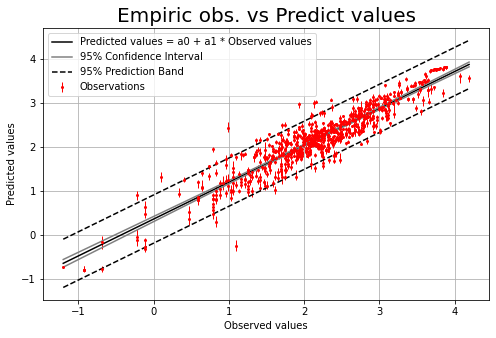

In [25]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1.2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [26]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [27]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.277, median - 0.276, CI - [0.263-0.289]

SHAP-values for: DBH_cm: mean - 0.03, median - 0.029, CI - [0.022-0.038]

SHAP-values for: H_m: mean - 0.265, median - 0.264, CI - [0.25-0.282]

SHAP-values for: Origin_ID: mean - 0.013, median - 0.012, CI - [0.009-0.016]

SHAP-values for: Species_ID: mean - 0.323, median - 0.323, CI - [0.315-0.329]



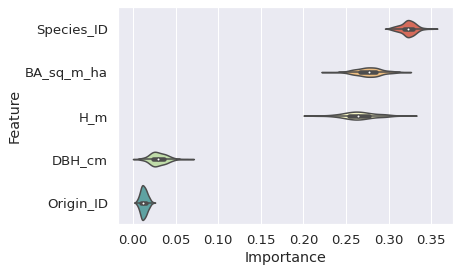

In [28]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Species_ID', 'BA_sq_m_ha', 'H_m', 'DBH_cm', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [29]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [30]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 84.225, median: 80.0,
 pred. interval (P(0.025)-P(0.975)): 35.0-153.175, 
 conf. interval (p-value=0.95): 57.451-108.822 
***
Aggregate bias statistic: 
 mean: -0.001, median: -0.001,
 pred. interval (P(0.025)-P(0.975)): -0.054-0.051, 
 conf. interval (p-value=0.95): -0.023-0.027 
***
Aggregate RMSE statistic: 
 mean: 0.307, median: 0.307, pred. interval (P(0.025)-P(0.975)): 0.259-0.352, 
 conf. interval (p-value=0.95): 0.283-0.33 
***
Aggregate MSE statistic: 
 mean: 0.095, median: 0.094, pred. interval (P(0.025)-P(0.975)): 0.067-0.124, 
 conf. interval (p-value=0.95): 0.08-0.109 
***
Aggregate R^2 statistic: 
 mean: 0.849, median: 0.851, pred. interval (P(0.025)-P(0.975)): 0.789-0.903, 
 conf. interval (p-value=0.95): 0.821-0.877 
***
Aggregate bias(%) statistic: 
 mean: -0.031, median: -0.048, pred. interval (P(0.025)-P(0.975)): -2.42-2.282, 
 conf. interval (p-value=0.95): -1.09

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

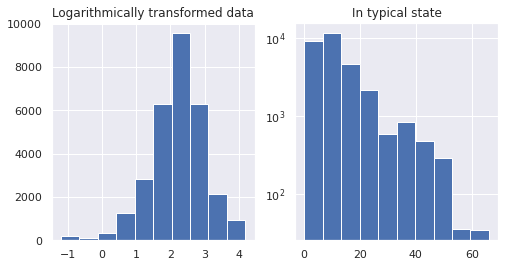

In [32]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [34]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [-1, 0, 1, 2, 3, 4])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 10, 20, 30, 40, 70])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

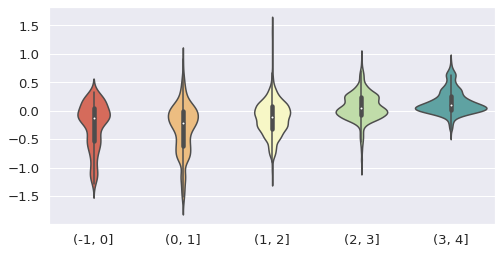

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

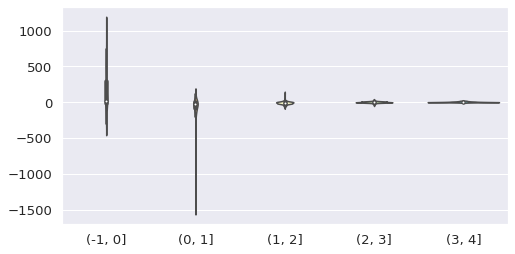

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

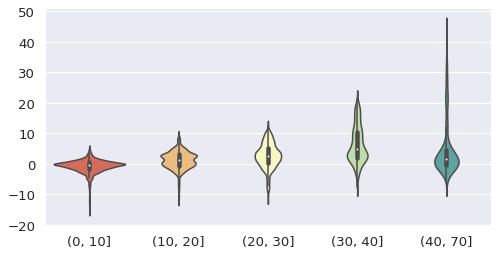

In [37]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

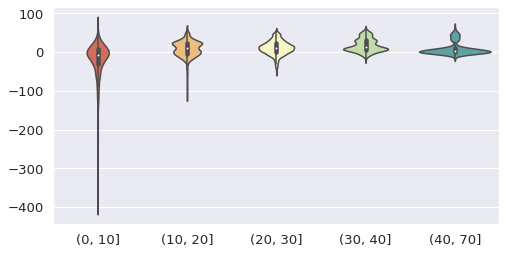

In [38]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [39]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [40]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [41]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])

# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.67509
[1]	validation_0-rmse:1.49177
[2]	validation_0-rmse:1.33156
[3]	validation_0-rmse:1.18787
[4]	validation_0-rmse:1.06277
[5]	validation_0-rmse:0.95527
[6]	validation_0-rmse:0.86096
[7]	validation_0-rmse:0.77472
[8]	validation_0-rmse:0.69958


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.63491
[10]	validation_0-rmse:0.58200
[11]	validation_0-rmse:0.53591
[12]	validation_0-rmse:0.49489
[13]	validation_0-rmse:0.45972
[14]	validation_0-rmse:0.43051
[15]	validation_0-rmse:0.40471
[16]	validation_0-rmse:0.38243
[17]	validation_0-rmse:0.36457
[18]	validation_0-rmse:0.35087
[19]	validation_0-rmse:0.33768
[20]	validation_0-rmse:0.32635
[21]	validation_0-rmse:0.31655
[22]	validation_0-rmse:0.30920
[23]	validation_0-rmse:0.30371
[24]	validation_0-rmse:0.29835
[25]	validation_0-rmse:0.29369
[26]	validation_0-rmse:0.28936
[27]	validation_0-rmse:0.28662
[28]	validation_0-rmse:0.28386
[29]	validation_0-rmse:0.28132
[30]	validation_0-rmse:0.28003
[31]	validation_0-rmse:0.27834
[32]	validation_0-rmse:0.27650
[33]	validation_0-rmse:0.27373
[34]	validation_0-rmse:0.27158
[35]	validation_0-rmse:0.27091
[36]	validation_0-rmse:0.26927
[37]	validation_0-rmse:0.26704
[38]	validation_0-rmse:0.26645
[39]	validation_0-rmse:0.26529
[40]	validation_0-rmse:0.26396
[41]	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [42]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 195


In [43]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

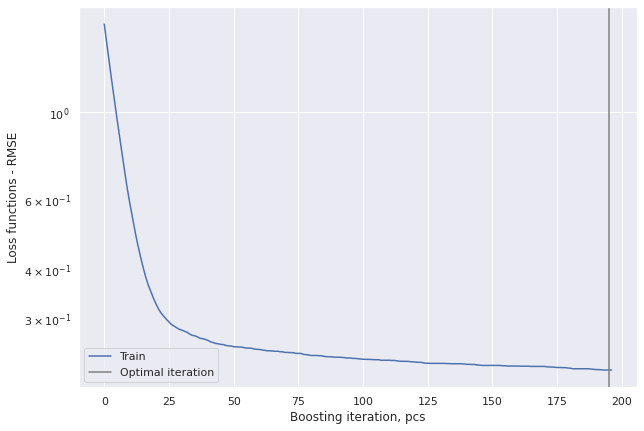

In [44]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [45]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.00
RMSE: 0.2
Relative RMSE(%):  10.078
MSE: 0.0
R square: 92.4%


In [46]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.925
Uncertainty
a0: 0.213+/-0.022
a1: 0.903+/-0.009


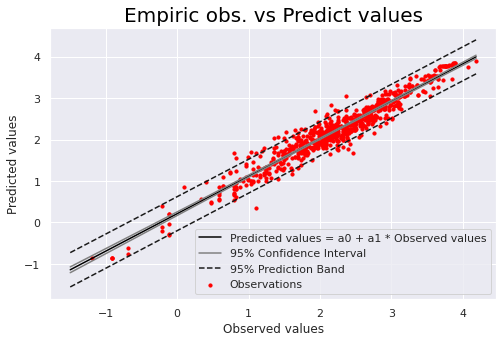

In [47]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1.5, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

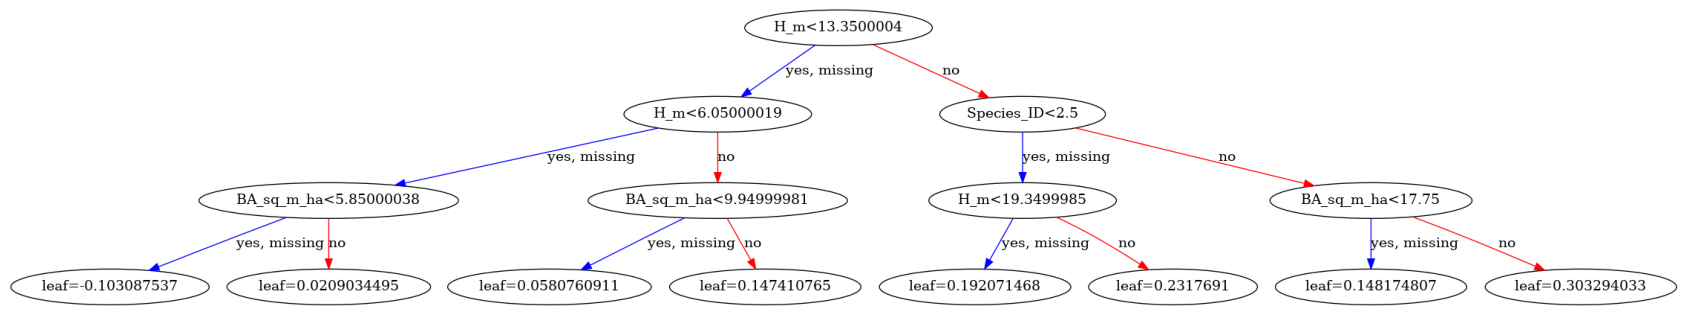

In [50]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

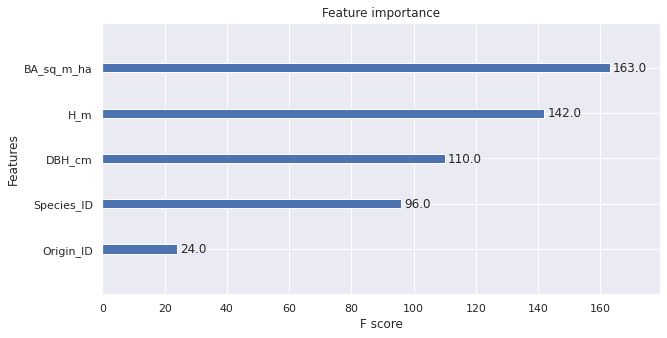

In [52]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

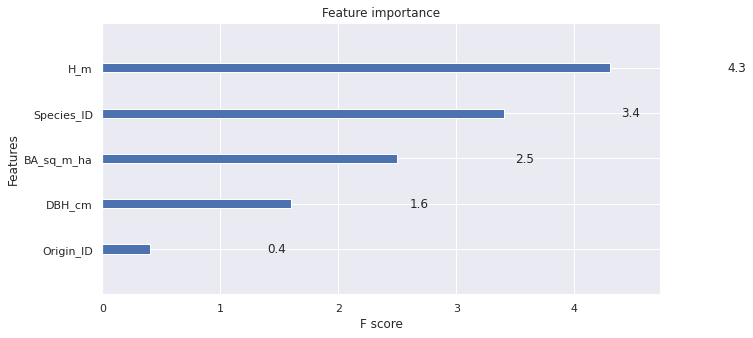

In [53]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

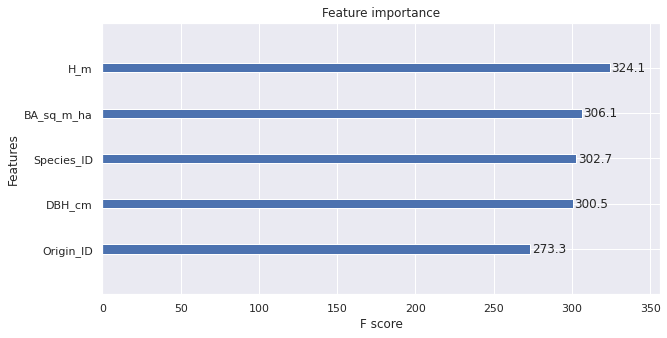

In [54]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [55]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


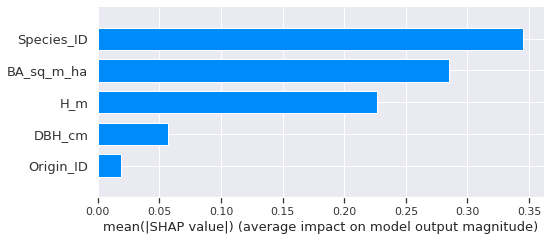

In [56]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

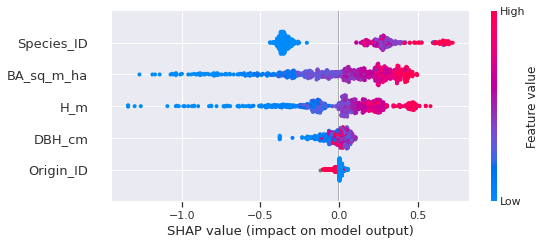

In [57]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

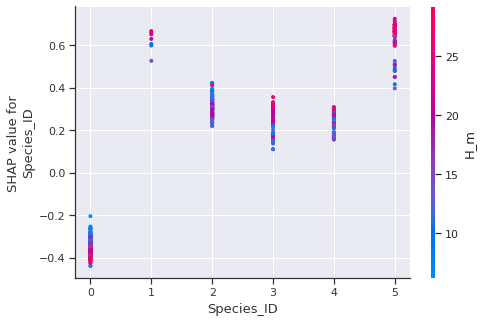

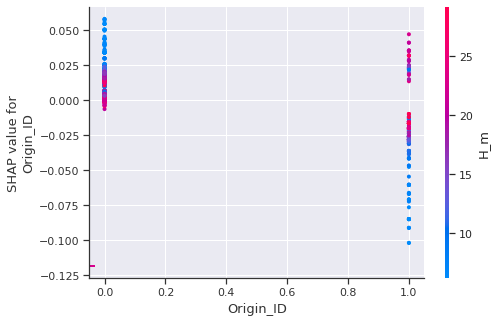

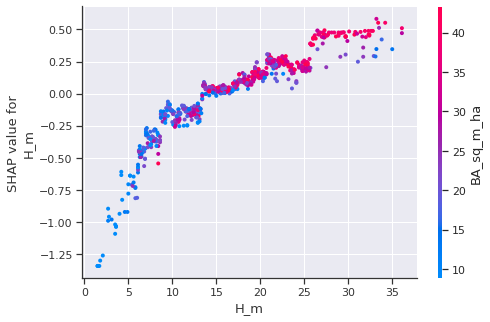

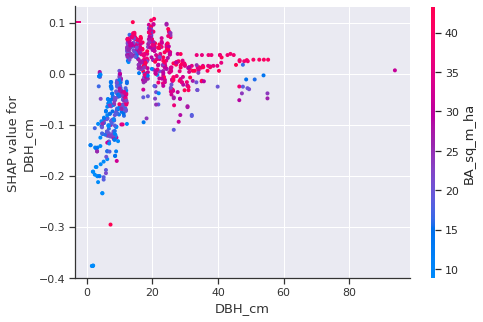

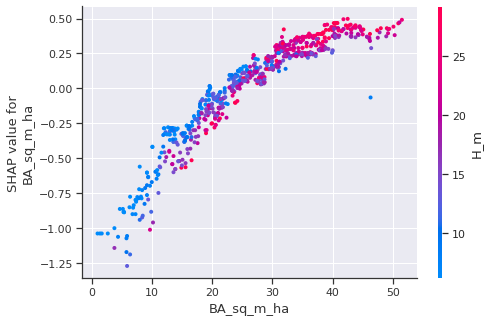

In [58]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [59]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_LN_M_stem_bark_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_LN_M_stem_bark_other_authors_XGB_model.txt")